In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import numpy as np
import polars as pl
from sweep.experiment import Experiment, ExperimentType
from model.data import DataModel, KFeaturesDefinition, k_features_factory
from erm.problems.problems import ProblemType
from state_evolution.constants import SEProblemType
import subprocess
from experiments.data_loading import read_result_dataframe
import os
import matplotlib.pyplot as plt
import datetime
from experiments.data_loading import KEYS
from matplotlib.lines import Line2D

Define a datamodel

In [24]:
d = 1000

In [25]:
vanilla_gaussian_kwargs = {
    "x_diagonal": KFeaturesDefinition(diagonal=[(1, d)]),
    "θ_diagonal": KFeaturesDefinition(diagonal=[(1, d)]),
    "ω_diagonal": KFeaturesDefinition(diagonal=[(1, d)]),
    "δ_diagonal": KFeaturesDefinition(diagonal=[(1, d)]),
    "ν_diagonal": KFeaturesDefinition(diagonal=[(1, d)]),
}

vanilla_datamodel = DataModel(
    d,
    normalize_matrices=True,
    data_model_factory=k_features_factory,
    factory_kwargs=vanilla_gaussian_kwargs,
    name="vanilla-gaussian"
)

Define an experiment

In [ ]:
experiment = Experiment(
    state_evolution_repetitions=1,
    erm_repetitions=5,
    alphas=np.logspace(-0.2,2,10),
    epsilons=np.array([0.0, 0.1, 0.2, 0.3]),
    lambdas=np.array([0.001]),
    taus=np.array([0.05]),
    d=d,
    experiment_type=ExperimentType.Sweep,
    data_models = [vanilla_datamodel],
    test_against_epsilons=np.array([0.2]),
    erm_problem_type=ProblemType.PerturbedLogistic,
    se_problem_type=SEProblemType.Logistic,
    gamma_fair_error=0.01,
    name="perturbed_logistic"
)
experiment_json = experiment.to_json()

In [27]:
with open("perturbed_logistic.json", "w") as f:
    f.write(experiment_json)

In [28]:
venv_python = ".venv/bin/python"
command = ["mpiexec", "-n", "5", venv_python, "sweep/run_sweep.py", "--json", experiment_json, "--log-level", "INFO"]
subprocess.run(command)

INFO:root:The MPI comm size is 5
INFO:root:This process has rank 0
INFO:root:Starting Master for experiment perturbed_logistic
INFO:root:Starting Experiment perturbed_logistic
INFO:root:The MPI comm size is 5
INFO:root:The MPI comm size is 5
INFO:root:This process has rank 3
INFO:root:This process has rank 4
INFO:root:The MPI comm size is 5
INFO:root:The MPI comm size is 5
INFO:root:This process has rank 2
INFO:root:This process has rank 1
  0%|          | 0/240 [00:00<?, ?it/s]INFO:root:Starting all processes
INFO:root:Sending task 0 to 1
INFO:root:Sending task 1 to 2
INFO:root:Sending task 2 to 3
INFO:root:Sending task 3 to 4
INFO:root:All processes started - receiving results and sending new tasks
INFO:root:Received the 0th task
INFO:root:Starting task 2
INFO:root:Starting task 3
INFO:root:Initializing data model
INFO:root:Initializing data model
INFO:root:Starting task 4
INFO:root:Starting task 1
INFO:root:Initializing data model
INFO:root:Initializing data model


2025-03-01 09:24:52,826 - Rank 0 - INFO - The MPI comm size is 5
2025-03-01 09:24:52,826 - Rank 0 - INFO - This process has rank 0
2025-03-01 09:24:52,826 - Rank 0 - INFO - Starting Master for experiment perturbed_logistic
2025-03-01 09:24:52,826 - Rank 0 - INFO - Starting Experiment perturbed_logistic
2025-03-01 09:24:52,840 - Rank 0 - INFO - Starting all processes
2025-03-01 09:24:52,840 - Rank 0 - INFO - Sending task 0 to 1
2025-03-01 09:24:52,841 - Rank 0 - INFO - Sending task 1 to 2
2025-03-01 09:24:52,841 - Rank 0 - INFO - Sending task 2 to 3
2025-03-01 09:24:52,841 - Rank 0 - INFO - Sending task 3 to 4
2025-03-01 09:24:52,841 - Rank 0 - INFO - All processes started - receiving results and sending new tasks
2025-03-01 09:24:52,842 - Rank 0 - INFO - Received the 0th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INF

2025-03-01 09:25:01,988 - Rank 0 - INFO - Received task 1 from 1
2025-03-01 09:25:01,989 - Rank 0 - INFO - Saved Task(id=1, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168da4450>)
2025-03-01 09:25:01,990 - Rank 0 - INFO - Received the 1th task


INFO:root:Finished State Evolution Task(id=3, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Finished State Evolution Task(id=2, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs=

2025-03-01 09:25:02,402 - Rank 0 - INFO - Received task 3 from 3
2025-03-01 09:25:02,402 - Rank 0 - INFO - Saved Task(id=3, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168da4c10>)
2025-03-01 09:25:02,404 - Rank 0 - INFO - Received the 2th task
2025-03-01 09:25:02,485 - Rank 0 - INFO - Received task 2 from 2
2025-03-01 09:25:02,486 - Rank 0 - IN

INFO:root:Starting task 6
INFO:root:Initializing data model
INFO:root:Received task 2 from 2
INFO:root:Saved Task(id=2, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168da5110>)
INFO:root:Received the 3th task
INFO:root:Starting task 7
INFO:root:Initializing data model
INFO:root:Received task 4 from 4
INFO:root:Saved Task(id=4, task_type=<TaskTyp

2025-03-01 09:25:11,630 - Rank 0 - INFO - Received task 5 from 1
2025-03-01 09:25:11,630 - Rank 0 - INFO - Saved Task(id=5, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168da5a90>)
2025-03-01 09:25:11,631 - Rank 0 - INFO - Received the 5th task


INFO:root:Starting task 9
INFO:root:Initializing data model
INFO:root:Finished State Evolution Task(id=6, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 6 from 3
INFO:root:Saved Task(id=6, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normali

2025-03-01 09:25:12,282 - Rank 0 - INFO - Received task 6 from 3
2025-03-01 09:25:12,283 - Rank 0 - INFO - Saved Task(id=6, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168da5d90>)
2025-03-01 09:25:12,286 - Rank 0 - INFO - Received the 6th task


INFO:root:Finished State Evolution Task(id=8, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Finished State Evolution Task(id=7, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'

2025-03-01 09:25:13,218 - Rank 0 - INFO - Received task 8 from 4
2025-03-01 09:25:13,218 - Rank 0 - INFO - Saved Task(id=8, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168da61d0>)
2025-03-01 09:25:13,219 - Rank 0 - INFO - Received the 7th task


INFO:root:Received task 7 from 2
INFO:root:Saved Task(id=7, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168da6550>)
  3%|▎         | 8/240 [00:20<06:25,  1.66s/it]INFO:root:Received the 8th task
INFO:root:Starting task 12
INFO:root:Initializing data model


2025-03-01 09:25:13,426 - Rank 0 - INFO - Received task 7 from 2
2025-03-01 09:25:13,427 - Rank 0 - INFO - Saved Task(id=7, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168da6550>)
2025-03-01 09:25:13,427 - Rank 0 - INFO - Received the 8th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 09:25:20,768 - Rank 0 - INFO - Received task 9 from 1
2025-03-01 09:25:20,768 - Rank 0 - INFO - Saved Task(id=9, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168da69d0>)
2025-03-01 09:25:20,769 - Rank 0 - INFO - Received the 9th task


INFO:root:Finished State Evolution Task(id=10, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 10 from 3
INFO:root:Saved Task(id=10, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory

2025-03-01 09:25:21,653 - Rank 0 - INFO - Received task 10 from 3
2025-03-01 09:25:21,653 - Rank 0 - INFO - Saved Task(id=10, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168da6f10>)
2025-03-01 09:25:21,654 - Rank 0 - INFO - Received the 10th task


INFO:root:Initializing data model
INFO:root:Finished State Evolution Task(id=11, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 11 from 4
INFO:root:Saved Task(id=11, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, dat

2025-03-01 09:25:23,148 - Rank 0 - INFO - Received task 11 from 4
2025-03-01 09:25:23,148 - Rank 0 - INFO - Saved Task(id=11, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168da7190>)
2025-03-01 09:25:23,149 - Rank 0 - INFO - Received the 11th task


INFO:root:Finished State Evolution Task(id=12, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 12 from 2
INFO:root:Saved Task(id=12, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory

2025-03-01 09:25:23,590 - Rank 0 - INFO - Received task 12 from 2
2025-03-01 09:25:23,590 - Rank 0 - INFO - Saved Task(id=12, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168da7710>)
2025-03-01 09:25:23,591 - Rank 0 - INFO - Received the 12th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 09:25:29,962 - Rank 0 - INFO - Received task 13 from 1
2025-03-01 09:25:29,963 - Rank 0 - INFO - Saved Task(id=13, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168d97c10>)
2025-03-01 09:25:29,964 - Rank 0 - INFO - Received the 13th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 09:25:31,160 - Rank 0 - INFO - Received task 14 from 3
2025-03-01 09:25:31,160 - Rank 0 - INFO - Saved Task(id=14, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168d97f50>)
2025-03-01 09:25:31,163 - Rank 0 - INFO - Received the 14th task


INFO:root:Finished State Evolution Task(id=15, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 15 from 4
INFO:root:Saved Task(id=15, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory

2025-03-01 09:25:32,807 - Rank 0 - INFO - Received task 15 from 4
2025-03-01 09:25:32,807 - Rank 0 - INFO - Saved Task(id=15, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168da6510>)
2025-03-01 09:25:32,809 - Rank 0 - INFO - Received the 15th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 09:25:35,967 - Rank 0 - INFO - Received task 16 from 2
2025-03-01 09:25:35,967 - Rank 0 - INFO - Saved Task(id=16, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168dbc950>)
2025-03-01 09:25:35,969 - Rank 0 - INFO - Received the 16th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 09:25:38,587 - Rank 0 - INFO - Received task 17 from 1
2025-03-01 09:25:38,587 - Rank 0 - INFO - Saved Task(id=17, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168dbca10>)
2025-03-01 09:25:38,588 - Rank 0 - INFO - Received the 17th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 09:25:42,493 - Rank 0 - INFO - Received task 18 from 3
2025-03-01 09:25:42,493 - Rank 0 - INFO - Saved Task(id=18, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168da4ed0>)
2025-03-01 09:25:42,494 - Rank 0 - INFO - Received the 18th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:iter_nb: 500, err: 3.5777943821813096e-05
INFO:root:error: 3.5777943821813096e-05
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.

2025-03-01 09:25:44,844 - Rank 0 - INFO - Received task 20 from 2
2025-03-01 09:25:44,845 - Rank 0 - INFO - Saved Task(id=20, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168dbd250>)
2025-03-01 09:25:44,863 - Rank 0 - INFO - Received the 19th task
2025-03-01 09:25:44,940 - Rank 0 - INFO - Received task 19 from 4
2025-03-01 09:25:44,940 - Rank 0 -

INFO:root:Received task 19 from 4
INFO:root:Saved Task(id=19, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168dbd650>)
INFO:root:Received the 20th task
INFO:root:Starting task 24
INFO:root:Initializing data model
INFO:root:Finished State Evolution Task(id=21, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.0

2025-03-01 09:25:47,741 - Rank 0 - INFO - Received task 21 from 1
2025-03-01 09:25:47,741 - Rank 0 - INFO - Saved Task(id=21, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168dbdc50>)
2025-03-01 09:25:47,742 - Rank 0 - INFO - Received the 21th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 09:25:52,946 - Rank 0 - INFO - Received task 24 from 4
2025-03-01 09:25:52,946 - Rank 0 - INFO - Saved Task(id=24, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168dbddd0>)
2025-03-01 09:25:52,960 - Rank 0 - INFO - Received the 22th task


INFO:root:Starting task 26
INFO:root:Initializing data model
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INF

2025-03-01 09:25:54,774 - Rank 0 - INFO - Received task 23 from 2
2025-03-01 09:25:54,774 - Rank 0 - INFO - Saved Task(id=23, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168da6390>)
2025-03-01 09:25:54,775 - Rank 0 - INFO - Received the 23th task


INFO:root:Received task 23 from 2
INFO:root:Saved Task(id=23, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168da6390>)
 10%|▉         | 23/240 [01:01<09:31,  2.63s/it]INFO:root:Received the 23th task
INFO:root:Starting task 27
INFO:root:Initializing data model
INFO:root:iter_nb: 500, err: 0.005718649063510384
INFO:root:error: 0.00571864906351038

2025-03-01 09:25:55,772 - Rank 0 - INFO - Received task 22 from 3
2025-03-01 09:25:55,773 - Rank 0 - INFO - Saved Task(id=22, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168dbe450>)
2025-03-01 09:25:55,775 - Rank 0 - INFO - Received the 24th task


INFO:root:iter_nb: 500, err: 0.007733652198652408
INFO:root:error: 0.007733652198652408
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Finished State Evolution Task(id=25, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 25 from 1
INFO:root:Saved Task(id=25, task_ty

2025-03-01 09:25:59,288 - Rank 0 - INFO - Received task 25 from 1
2025-03-01 09:25:59,288 - Rank 0 - INFO - Saved Task(id=25, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168dbe850>)
2025-03-01 09:25:59,289 - Rank 0 - INFO - Received the 25th task


INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_ω value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_δ value counts: (array([0., 1.]), array([999000,   100

2025-03-01 09:26:02,630 - Rank 0 - INFO - Received task 28 from 3
2025-03-01 09:26:02,630 - Rank 0 - INFO - Saved Task(id=28, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168dbedd0>)
2025-03-01 09:26:02,631 - Rank 0 - INFO - Received the 26th task


INFO:root:Finished State Evolution Task(id=26, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 26 from 4
INFO:root:Saved Task(id=26, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory

2025-03-01 09:26:03,222 - Rank 0 - INFO - Received task 26 from 4
2025-03-01 09:26:03,222 - Rank 0 - INFO - Saved Task(id=26, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168dbefd0>)
2025-03-01 09:26:03,223 - Rank 0 - INFO - Received the 27th task
2025-03-01 09:26:03,351 - Rank 0 - INFO - Received task 27 from 2
2025-03-01 09:26:03,351 - Rank 0 

INFO:root:Starting task 31
INFO:root:Initializing data model
INFO:root:Finished State Evolution Task(id=27, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 27 from 2
INFO:root:Saved Task(id=27, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, n

2025-03-01 09:26:10,398 - Rank 0 - INFO - Received task 32 from 2
2025-03-01 09:26:10,398 - Rank 0 - INFO - Saved Task(id=32, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168da7a50>)
2025-03-01 09:26:10,400 - Rank 0 - INFO - Received the 29th task


INFO:root:iter_nb: 500, err: 0.007379678915583554
INFO:root:error: 0.007379678915583554
INFO:root:Finished State Evolution Task(id=31, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 31 from 4
INFO:root:Saved Task(id=31, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, dat

2025-03-01 09:26:11,556 - Rank 0 - INFO - Received task 31 from 4
2025-03-01 09:26:11,556 - Rank 0 - INFO - Saved Task(id=31, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168d97d10>)
2025-03-01 09:26:11,558 - Rank 0 - INFO - Received the 30th task


INFO:root:Finished State Evolution Task(id=29, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 29 from 1
INFO:root:Saved Task(id=29, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory

2025-03-01 09:26:14,257 - Rank 0 - INFO - Received task 29 from 1
2025-03-01 09:26:14,257 - Rank 0 - INFO - Saved Task(id=29, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168da7e50>)
2025-03-01 09:26:14,259 - Rank 0 - INFO - Received the 31th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:iter_nb: 1000, err: 2.1901339664509578e-05
INFO:root:error: 2.1901339664509578e-05
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0

2025-03-01 09:26:17,585 - Rank 0 - INFO - Received task 30 from 3
2025-03-01 09:26:17,585 - Rank 0 - INFO - Saved Task(id=30, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168dbe410>)
2025-03-01 09:26:17,586 - Rank 0 - INFO - Received the 32th task


INFO:root:Received task 30 from 3
INFO:root:Saved Task(id=30, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168dbe410>)
 13%|█▎        | 32/240 [01:24<09:48,  2.83s/it]INFO:root:Received the 32th task
INFO:root:Starting task 36
INFO:root:Initializing data model
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrice

2025-03-01 09:26:21,223 - Rank 0 - INFO - Received task 35 from 1
2025-03-01 09:26:21,223 - Rank 0 - INFO - Saved Task(id=35, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168d97fd0>)
2025-03-01 09:26:21,224 - Rank 0 - INFO - Received the 33th task


INFO:root:Finished State Evolution Task(id=36, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 36 from 3
INFO:root:Saved Task(id=36, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory

2025-03-01 09:26:22,973 - Rank 0 - INFO - Received task 36 from 3
2025-03-01 09:26:22,973 - Rank 0 - INFO - Saved Task(id=36, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x136308a50>)
2025-03-01 09:26:22,974 - Rank 0 - INFO - Received the 34th task


INFO:root:iter_nb: 1500, err: 0.0019930775512193577
INFO:root:error: 0.0019930775512193577
INFO:root:Finished State Evolution Task(id=34, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 34 from 4
INFO:root:Saved Task(id=34, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, 

2025-03-01 09:26:25,138 - Rank 0 - INFO - Received task 34 from 4
2025-03-01 09:26:25,138 - Rank 0 - INFO - Saved Task(id=34, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168dbf550>)
2025-03-01 09:26:25,139 - Rank 0 - INFO - Received the 35th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 09:26:30,310 - Rank 0 - INFO - Received task 33 from 2
2025-03-01 09:26:30,310 - Rank 0 - INFO - Saved Task(id=33, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168dd0fd0>)
2025-03-01 09:26:30,311 - Rank 0 - INFO - Received the 36th task


INFO:root:Finished State Evolution Task(id=39, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 39 from 4
INFO:root:Saved Task(id=39, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diago

2025-03-01 09:26:31,199 - Rank 0 - INFO - Received task 39 from 4
2025-03-01 09:26:31,199 - Rank 0 - INFO - Saved Task(id=39, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168d97d50>)
2025-03-01 09:26:31,200 - Rank 0 - INFO - Received the 37th task


INFO:root:iter_nb: 1500, err: 0.013190370847610211
INFO:root:error: 0.013190370847610211
INFO:root:iter_nb: 1000, err: 2.0875644054285658e-05
INFO:root:error: 2.0875644054285658e-05
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ..

2025-03-01 09:26:35,168 - Rank 0 - INFO - Received task 38 from 3
2025-03-01 09:26:35,168 - Rank 0 - INFO - Saved Task(id=38, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168dd1590>)
2025-03-01 09:26:35,170 - Rank 0 - INFO - Received the 38th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 09:26:36,915 - Rank 0 - INFO - Received task 40 from 2
2025-03-01 09:26:36,915 - Rank 0 - INFO - Saved Task(id=40, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168dd19d0>)
2025-03-01 09:26:36,916 - Rank 0 - INFO - Received the 39th task


INFO:root:iter_nb: 2000, err: 0.0018544444883445976
INFO:root:error: 0.0018544444883445976
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]

2025-03-01 09:26:49,953 - Rank 0 - INFO - Received task 37 from 1
2025-03-01 09:26:49,953 - Rank 0 - INFO - Saved Task(id=37, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x168dd1d50>)
2025-03-01 09:26:49,955 - Rank 0 - INFO - Received the 40th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.7407015601550038, 'lambda_twiddle_2': 0.00043625000000000006}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.7064727055663858, 'lambda_twiddle_2': 0.0004212500000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.5684012291320881, 'lambda_twiddle_2': 0.0003550000000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0150034954599

2025-03-01 09:26:54,484 - Rank 0 - INFO - Received task 41 from 4
2025-03-01 09:26:54,484 - Rank 0 - INFO - Saved Task(id=41, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dd2010>)
2025-03-01 09:26:54,485 - Rank 0 - INFO - Received the 41th task


INFO:root:Received task 41 from 4
INFO:root:Saved Task(id=41, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dd2010>)
 17%|█▋        | 41/240 [02:01<17:51,  5.38s/it]INFO:root:Received the 41th task
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Starting task 45
INFO:root:Initializing data model
INFO:ro

2025-03-01 09:27:01,080 - Rank 0 - INFO - Received task 42 from 3
2025-03-01 09:27:01,080 - Rank 0 - INFO - Saved Task(id=42, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dd1b10>)
2025-03-01 09:27:01,081 - Rank 0 - INFO - Received the 42th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INF

2025-03-01 09:27:05,450 - Rank 0 - INFO - Received task 43 from 2
2025-03-01 09:27:05,450 - Rank 0 - INFO - Saved Task(id=43, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dd1950>)
2025-03-01 09:27:05,451 - Rank 0 - INFO - Received the 43th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 09:27:20,715 - Rank 0 - INFO - Received task 44 from 1
2025-03-01 09:27:20,715 - Rank 0 - INFO - Saved Task(id=44, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dd2710>)
2025-03-01 09:27:20,716 - Rank 0 - INFO - Received the 44th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.3865064988601639, 'lambda_twiddle_2': 0.0007912500000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.3422747583018237, 'lambda_twiddle_2': 0.0007750000000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.1562097063284078, 'lambda_twiddle_2': 0.0006975000000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.06976589944185249, 'lambda_twiddle_2': 5.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'l

2025-03-01 09:27:26,533 - Rank 0 - INFO - Received task 45 from 4
2025-03-01 09:27:26,533 - Rank 0 - INFO - Saved Task(id=45, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dd2950>)
2025-03-01 09:27:26,534 - Rank 0 - INFO - Received the 45th task


INFO:root:{'lambda_twiddle_1': 0.04463801636389983, 'lambda_twiddle_2': 7.500000000000001e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.003966773116351225, 'lambda_twiddle_2': 1.0000000000000003e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1.

2025-03-01 09:27:35,226 - Rank 0 - INFO - Received task 46 from 3
2025-03-01 09:27:35,226 - Rank 0 - INFO - Saved Task(id=46, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dd2650>)
2025-03-01 09:27:35,227 - Rank 0 - INFO - Received the 46th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=47, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal

2025-03-01 09:27:39,566 - Rank 0 - INFO - Received task 47 from 2
2025-03-01 09:27:39,566 - Rank 0 - INFO - Saved Task(id=47, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dd2dd0>)
2025-03-01 09:27:39,568 - Rank 0 - INFO - Received the 47th task


INFO:root:{'lambda_twiddle_1': 4.394616435212647, 'lambda_twiddle_2': 0.007965}
INFO:root:{'lambda_twiddle_1': 4.255808853960713, 'lambda_twiddle_2': 0.007796249999999999}
INFO:root:{'lambda_twiddle_1': 3.7553969717995455, 'lambda_twiddle_2': 0.00723375}
INFO:root:{'lambda_twiddle_1': 0.4346650423268087, 'lambda_twiddle_2': 0.0010574999999999998}
INFO:root:{'lambda_twiddle_1': 0.22196861002497936, 'lambda_twiddle_2': 0.0005737499999999999}
INFO:root:{'lambda_twiddle_1': 0.07881219165770087, 'lambda_twiddle_2': 0.00022499999999999997}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0

2025-03-01 09:27:54,776 - Rank 0 - INFO - Received task 48 from 1
2025-03-01 09:27:54,776 - Rank 0 - INFO - Saved Task(id=48, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dd3390>)
2025-03-01 09:27:54,777 - Rank 0 - INFO - Received the 48th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 2.2595236976975714, 'lambda_twiddle_2': 0.0013337500000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 2.188488925341338, 'lambda_twiddle_2': 0.0013037500000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.8959623892443482, 'lambda_twiddle_2': 0.00116875}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.23752330264992882, 'lambda_twiddle_2': 0.00017250000000000005}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.13745517798687248, 'lambda_twiddle_2': 0.00010250000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddl

2025-03-01 09:28:02,979 - Rank 0 - INFO - Received task 49 from 4
2025-03-01 09:28:02,979 - Rank 0 - INFO - Saved Task(id=49, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dd3650>)
2025-03-01 09:28:02,980 - Rank 0 - INFO - Received the 49th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-03-01 09:28:15,267 - Rank 0 - INFO - Received task 50 from 3
2025-03-01 09:28:15,267 - Rank 0 - INFO - Saved Task(id=50, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dd3450>)
2025-03-01 09:28:15,269 - Rank 0 - INFO - Received the 50th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 6.167077219399856, 'lambda_twiddle_2': 0.01184625}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.1825735270635385, 'lambda_twiddle_2': 0.002835}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.902888936407896, 'lambda_twiddle_2': 0.00226125}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.5408454612606526, 'lambda_twiddle_2': 0.0015975}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.30203392624521985, 'lambda_twiddle_2': 0.001215}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.10309292806308223, 'lambda_twiddle_2': 0.0007312499999999999}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.004204911363320088, 'lambda_twiddle

2025-03-01 09:28:18,441 - Rank 0 - INFO - Received task 51 from 2
2025-03-01 09:28:18,441 - Rank 0 - INFO - Saved Task(id=51, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dd3850>)
2025-03-01 09:28:18,442 - Rank 0 - INFO - Received the 51th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. .

2025-03-01 09:28:35,621 - Rank 0 - INFO - Received task 52 from 1
2025-03-01 09:28:35,622 - Rank 0 - INFO - Saved Task(id=52, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dd3a90>)
2025-03-01 09:28:35,627 - Rank 0 - INFO - Received the 52th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 4.000167722500903, 'lambda_twiddle_2': 0.0023287500000000005}
INFO:root:{'lambda_twiddle_1': 3.5535302427391287, 'lambda_twiddle_2': 0.0021437500000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.4810604546759601, 'lambda_twiddle_2': 0.0003500000000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.3298220046474112, 'lambda_twiddle_2': 0.00024125000000000004}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.23221000048520565, 'lambda_twiddle_2': 0.00017000000000000004}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.160546698254502, 'lambda_twiddle_2': 0.00013000000000000004}
INFO:ro

2025-03-01 09:28:42,849 - Rank 0 - INFO - Received task 53 from 4
2025-03-01 09:28:42,849 - Rank 0 - INFO - Saved Task(id=53, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dec350>)
2025-03-01 09:28:42,851 - Rank 0 - INFO - Received the 53th task


INFO:root:{'lambda_twiddle_1': -0.0512660850212249, 'lambda_twiddle_2': 0.00021500000000000005}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.03742983217133164, 'lambda_twiddle_2': 0.00017500000000000005}
INFO:root:{'lambda_twiddle_1': -0.03133432644805684, 'lambda_twiddle_2': 0.00015500000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.03340000189449108, 'lambda_twiddle_2': 0.00015500000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.04106305632573394, 'lambda_twiddle_2': 0.00017000000000000004}
INFO:root:{'lambda_twiddle_1': -0.04031454078126574, 'lambda_twiddle_2': 0.00016500000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.03764507702688427, 

2025-03-01 09:28:57,599 - Rank 0 - INFO - Received task 54 from 3
2025-03-01 09:28:57,599 - Rank 0 - INFO - Saved Task(id=54, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dec550>)
2025-03-01 09:28:57,600 - Rank 0 - INFO - Received the 54th task


INFO:root:{'lambda_twiddle_1': -0.03669300572643186, 'lambda_twiddle_2': 0.00015000000000000001}
INFO:root:{'lambda_twiddle_1': 1.548849932409337, 'lambda_twiddle_2': 0.0049837499999999995}
INFO:root:{'lambda_twiddle_1': -0.03669128727941556, 'lambda_twiddle_2': 0.00015000000000000001}
INFO:root:{'lambda_twiddle_1': 1.141492107984657, 'lambda_twiddle_2': 0.00442125}
INFO:root:{'lambda_twiddle_1': -0.03668750587451067, 'lambda_twiddle_2': 0.00015000000000000001}
INFO:root:{'lambda_twiddle_1': 0.8721786730261373, 'lambda_twiddle_2': 0.004083750000000001}
INFO:root:{'lambda_twiddle_1': -0.03668630828602848, 'lambda_twiddle_2': 0.00015000000000000001}
INFO:root:{'lambda_twiddle_1': 0.6111941568414416, 'lambda_twiddle_2': 0.004005}
INFO:root:{'lambda_twiddle_1': -0.036687085509653605, 'lambda_twiddle_2': 0.00015000000000000001}
INFO:root:{'lambda_twiddle_1': 0.23069873247709705, 'lambda_twiddle_2': 0.00428625}
INFO:root:{'lambda_twiddle_1': 0.4179832813447917, 'lambda_twiddle_2': 0.004095}


2025-03-01 09:29:00,562 - Rank 0 - INFO - Received task 55 from 2
2025-03-01 09:29:00,562 - Rank 0 - INFO - Saved Task(id=55, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x167e2cb50>)
2025-03-01 09:29:00,563 - Rank 0 - INFO - Received the 55th task


INFO:root:{'lambda_twiddle_1': -0.008332246681172162, 'lambda_twiddle_2': 0.0040275}
INFO:root:{'lambda_twiddle_1': 0.003931496253505085, 'lambda_twiddle_2': 0.00401625}
INFO:root:{'lambda_twiddle_1': 0.011252638779605473, 'lambda_twiddle_2': 0.00401625}
INFO:root:{'lambda_twiddle_1': 0.013001660390885794, 'lambda_twiddle_2': 0.0040275}
INFO:root:{'lambda_twiddle_1': 0.012288199103786646, 'lambda_twiddle_2': 0.00401625}
INFO:root:{'lambda_twiddle_1': 0.014811881147676953, 'lambda_twiddle_2': 0.00399375}
INFO:root:{'lambda_twiddle_1': 0.010633466410618464, 'lambda_twiddle_2': 0.004005}
INFO:root:{'lambda_twiddle_1': 0.010113289591046515, 'lambda_twiddle_2': 0.00399375}
INFO:root:{'lambda_twiddle_1': 0.006024897047221867, 'lambda_twiddle_2': 0.00401625}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.006610034680849752, 'lambda_twiddle_2': 0.00401625}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 

2025-03-01 09:29:10,813 - Rank 0 - INFO - Received task 56 from 1
2025-03-01 09:29:10,813 - Rank 0 - INFO - Saved Task(id=56, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dece10>)
2025-03-01 09:29:10,814 - Rank 0 - INFO - Received the 56th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-03-01 09:29:26,850 - Rank 0 - INFO - Received task 57 from 4
2025-03-01 09:29:26,850 - Rank 0 - INFO - Saved Task(id=57, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168da5210>)
2025-03-01 09:29:26,851 - Rank 0 - INFO - Received the 57th task


INFO:root:Starting task 61
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 0.4744392507324915, 'lambda_twiddle_2': 0.0024000000000000002}
INFO:root:{'lambda_twiddle_1': 0.0052032213206581295, 'lambda_twiddle_2': 1.6250000000000005e-05}
INFO:root:{'lambda_twiddle_1': 0.005202679689263679, 'lambda_twiddle_2': 1.6250000000000005e-05}
INFO:root:{'lambda_twiddle_1': 0.4434292879865618, 'lambda_twiddle_2': 0.0024150000000000005}
INFO:root:{'lambda_twiddle_1': 0.0052108901982765715, 'lambda_twiddle_2': 1.6250000000000005e-05}
INFO:root:{'lambda_twiddle_1': 0.4465659845685066, 'lambda_twiddle_2': 0.0023950000000000004}
INFO:root:{'lambda_twiddle_1': 0.005079434433090906, 'lambda_twiddle_2': 1.6250000000000005e-05}
INFO:root:{'lambda_twiddle_1': 0.4528348982363595, 'lambda_twiddle_2': 0.002385000000000001}
INFO:root:{'lambda_twiddle_1': 0.005354169927231485, 'lambda_twiddle_2': 1.7500000000000002e-05}
INFO:root:{'lambda_twiddle_1': 0.4558173041087783, 'lambda_twiddle_2': 0.0023

2025-03-01 09:29:36,093 - Rank 0 - INFO - Received task 59 from 2
2025-03-01 09:29:36,094 - Rank 0 - INFO - Saved Task(id=59, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168deca90>)
2025-03-01 09:29:36,095 - Rank 0 - INFO - Received the 58th task


INFO:root:{'lambda_twiddle_1': 0.005305093894495679, 'lambda_twiddle_2': 1.7500000000000002e-05}
INFO:root:{'lambda_twiddle_1': 2.172486729945135, 'lambda_twiddle_2': 0.01015875}
INFO:root:{'lambda_twiddle_1': 0.005305556256340618, 'lambda_twiddle_2': 1.7500000000000002e-05}
INFO:root:{'lambda_twiddle_1': 2.1658048835702566, 'lambda_twiddle_2': 0.01017}
INFO:root:{'lambda_twiddle_1': 0.005305730941662652, 'lambda_twiddle_2': 1.7500000000000002e-05}
INFO:root:{'lambda_twiddle_1': 2.1714288245846314, 'lambda_twiddle_2': 0.010181250000000001}
INFO:root:{'lambda_twiddle_1': 0.005305345736985205, 'lambda_twiddle_2': 1.7500000000000002e-05}
INFO:root:{'lambda_twiddle_1': 2.172887476439467, 'lambda_twiddle_2': 0.01017}
INFO:root:{'lambda_twiddle_1': 0.005304785064389868, 'lambda_twiddle_2': 1.7500000000000002e-05}
INFO:root:{'lambda_twiddle_1': 0.0053035462557266405, 'lambda_twiddle_2': 1.7500000000000002e-05}
INFO:root:{'lambda_twiddle_1': 2.173160209548969, 'lambda_twiddle_2': 0.01015875}
I

2025-03-01 09:29:42,028 - Rank 0 - INFO - Received task 58 from 3
2025-03-01 09:29:42,029 - Rank 0 - INFO - Saved Task(id=58, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168ded890>)
2025-03-01 09:29:42,030 - Rank 0 - INFO - Received the 59th task


INFO:root:Starting task 63
INFO:root:Initializing data model
INFO:root:Finished ERM Task(id=60, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 60 from 1
INFO:root:Saved Task(id=60, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, ta

2025-03-01 09:29:42,489 - Rank 0 - INFO - Received task 60 from 1
2025-03-01 09:29:42,489 - Rank 0 - INFO - Saved Task(id=60, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168deda10>)
2025-03-01 09:29:42,508 - Rank 0 - INFO - Received the 60th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 09:30:10,451 - Rank 0 - INFO - Received task 61 from 4
2025-03-01 09:30:10,451 - Rank 0 - INFO - Saved Task(id=61, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dbced0>)
2025-03-01 09:30:10,452 - Rank 0 - INFO - Received the 61th task


INFO:root:{'lambda_twiddle_1': 1.9054693952620132, 'lambda_twiddle_2': 0.0056900000000000015}
INFO:root:{'lambda_twiddle_1': 5.693902314207319, 'lambda_twiddle_2': 0.021779999999999997}
INFO:root:{'lambda_twiddle_1': 0.38458234627403776, 'lambda_twiddle_2': 0.0005300000000000001}
INFO:root:{'lambda_twiddle_1': 1.905224667213704, 'lambda_twiddle_2': 0.0056900000000000015}
INFO:root:{'lambda_twiddle_1': 0.38457668515690385, 'lambda_twiddle_2': 0.0005300000000000001}
INFO:root:{'lambda_twiddle_1': 5.675186957845936, 'lambda_twiddle_2': 0.02176875}
INFO:root:{'lambda_twiddle_1': 1.9064807307176992, 'lambda_twiddle_2': 0.005700000000000001}
INFO:root:{'lambda_twiddle_1': 0.3845745902912885, 'lambda_twiddle_2': 0.0005300000000000001}
INFO:root:{'lambda_twiddle_1': 5.677301163060243, 'lambda_twiddle_2': 0.021779999999999997}
INFO:root:{'lambda_twiddle_1': 1.9065596815079566, 'lambda_twiddle_2': 0.005700000000000001}
INFO:root:{'lambda_twiddle_1': 0.3845727955049155, 'lambda_twiddle_2': 0.0005

2025-03-01 09:30:15,464 - Rank 0 - INFO - Received task 62 from 2
2025-03-01 09:30:15,464 - Rank 0 - INFO - Saved Task(id=62, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dee0d0>)
2025-03-01 09:30:15,465 - Rank 0 - INFO - Received the 62th task


INFO:root:Received task 64 from 1
INFO:root:Saved Task(id=64, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dbe450>)
 26%|██▋       | 63/240 [05:23<22:18,  7.56s/it]INFO:root:Received the 63th task
INFO:root:Starting task 67
INFO:root:Initializing data model


2025-03-01 09:30:15,912 - Rank 0 - INFO - Received task 64 from 1
2025-03-01 09:30:15,912 - Rank 0 - INFO - Saved Task(id=64, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dbe450>)
2025-03-01 09:30:15,913 - Rank 0 - INFO - Received the 63th task


INFO:root:Finished ERM Task(id=63, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 63 from 3
INFO:root:Saved Task(id=63, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matr

2025-03-01 09:30:16,455 - Rank 0 - INFO - Received task 63 from 3
2025-03-01 09:30:16,455 - Rank 0 - INFO - Saved Task(id=63, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dbe650>)
2025-03-01 09:30:16,456 - Rank 0 - INFO - Received the 64th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 09:30:50,631 - Rank 0 - INFO - Received task 68 from 3
2025-03-01 09:30:50,632 - Rank 0 - INFO - Saved Task(id=68, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168a86910>)
2025-03-01 09:30:50,633 - Rank 0 - INFO - Received the 65th task


INFO:root:{'lambda_twiddle_1': 1.0790006229622906, 'lambda_twiddle_2': 0.0012400000000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=67, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.079308475504996, 'lambda_twiddle_2'

2025-03-01 09:30:51,548 - Rank 0 - INFO - Received task 67 from 1
2025-03-01 09:30:51,548 - Rank 0 - INFO - Saved Task(id=67, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dbedd0>)
2025-03-01 09:30:51,550 - Rank 0 - INFO - Received the 66th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.0791854512344352, 'lambda_twiddle_2': 0.0012412500000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.079194660072525, 'lambda_twiddle_2': 0.0012412500000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.0792010962944976, 'lambda_twiddle_2': 0.0012412500000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.079203676042106, 'lambda_twiddle_2': 0.0012412500000000002}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=66, task_type=<TaskType.ERM: 0>, erm_problem_t

2025-03-01 09:30:56,108 - Rank 0 - INFO - Received task 66 from 2
2025-03-01 09:30:56,108 - Rank 0 - INFO - Saved Task(id=66, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dbf010>)
2025-03-01 09:30:56,109 - Rank 0 - INFO - Received the 67th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INF

2025-03-01 09:30:58,023 - Rank 0 - INFO - Received task 65 from 4
2025-03-01 09:30:58,023 - Rank 0 - INFO - Saved Task(id=65, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168def2d0>)
2025-03-01 09:30:58,024 - Rank 0 - INFO - Received the 68th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 09:31:32,452 - Rank 0 - INFO - Received task 72 from 4
2025-03-01 09:31:32,453 - Rank 0 - INFO - Saved Task(id=72, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168d24550>)
2025-03-01 09:31:32,455 - Rank 0 - INFO - Received the 69th task


INFO:root:Finished ERM Task(id=70, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Received task 70 from 1
INFO:root:Saved Task(id=70, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, 

2025-03-01 09:31:32,923 - Rank 0 - INFO - Received task 70 from 1
2025-03-01 09:31:32,923 - Rank 0 - INFO - Saved Task(id=70, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168d97790>)
2025-03-01 09:31:32,925 - Rank 0 - INFO - Received the 70th task


INFO:root:{'lambda_twiddle_1': 9.81943623906092, 'lambda_twiddle_2': 0.023305000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 9.819773140698253, 'lambda_twiddle_2': 0.023305000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 9.819766642030675, 'lambda_twiddle_2': 0.023305000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=71, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(di

2025-03-01 09:31:36,294 - Rank 0 - INFO - Received task 71 from 2
2025-03-01 09:31:36,294 - Rank 0 - INFO - Saved Task(id=71, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x167e2cb50>)
2025-03-01 09:31:36,295 - Rank 0 - INFO - Received the 71th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 

2025-03-01 09:31:39,790 - Rank 0 - INFO - Received task 69 from 3
2025-03-01 09:31:39,791 - Rank 0 - INFO - Saved Task(id=69, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168defd50>)
2025-03-01 09:31:39,794 - Rank 0 - INFO - Received the 72th task


INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_ω value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_δ value counts: (array([0., 1.]), array([999000,   100

2025-03-01 09:32:21,443 - Rank 0 - INFO - Received task 76 from 3
2025-03-01 09:32:21,444 - Rank 0 - INFO - Saved Task(id=76, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168d97b90>)
2025-03-01 09:32:21,462 - Rank 0 - INFO - Received the 73th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 4.707212620699213, 'lambda_twiddle_2': 0.005036250000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 4.7075489806706425, 'lambda_twiddle_2': 0.005036250000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=75, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian'

2025-03-01 09:32:23,434 - Rank 0 - INFO - Received task 75 from 2
2025-03-01 09:32:23,434 - Rank 0 - INFO - Saved Task(id=75, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168d97dd0>)
2025-03-01 09:32:23,436 - Rank 0 - INFO - Received the 74th task


INFO:root:{'lambda_twiddle_1': 4.707105952813992, 'lambda_twiddle_2': 0.005035000000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 4.7076431227345665, 'lambda_twiddle_2': 0.005036250000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=74, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian'

2025-03-01 09:32:26,834 - Rank 0 - INFO - Received task 74 from 1
2025-03-01 09:32:26,834 - Rank 0 - INFO - Saved Task(id=74, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169108750>)
2025-03-01 09:32:26,836 - Rank 0 - INFO - Received the 75th task


INFO:root:Finished ERM Task(id=73, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0.

2025-03-01 09:32:27,976 - Rank 0 - INFO - Received task 73 from 4
2025-03-01 09:32:27,977 - Rank 0 - INFO - Saved Task(id=73, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169108490>)
2025-03-01 09:32:27,977 - Rank 0 - INFO - Received the 76th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 09:33:29,847 - Rank 0 - INFO - Received task 79 from 1
2025-03-01 09:33:29,848 - Rank 0 - INFO - Saved Task(id=79, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169108e90>)
2025-03-01 09:33:29,874 - Rank 0 - INFO - Received the 77th task


INFO:root:{'lambda_twiddle_1': 8.8832688967927, 'lambda_twiddle_2': 0.009342500000000002}
INFO:root:{'lambda_twiddle_1': 74.59260218456089, 'lambda_twiddle_2': 0.25699500000000003}
INFO:root:Finished ERM Task(id=77, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 77 from 3
INFO:root:Saved Task(id=77, task_type=<TaskType.ERM: 0>, erm_problem_type=<Problem

2025-03-01 09:33:31,195 - Rank 0 - INFO - Received task 77 from 3
2025-03-01 09:33:31,196 - Rank 0 - INFO - Saved Task(id=77, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169109150>)
2025-03-01 09:33:31,198 - Rank 0 - INFO - Received the 78th task


INFO:root:Finished ERM Task(id=80, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Finished ERM Task(id=78, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, fac

2025-03-01 09:33:32,972 - Rank 0 - INFO - Received task 80 from 4
2025-03-01 09:33:32,972 - Rank 0 - INFO - Saved Task(id=80, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1691092d0>)
2025-03-01 09:33:32,977 - Rank 0 - INFO - Received the 79th task
2025-03-01 09:33:33,109 - Rank 0 - INFO - Received task 78 from 2
2025-03-01 09:33:33,109 - Ra

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 09:33:59,829 - Rank 0 - INFO - Received task 81 from 1
2025-03-01 09:33:59,829 - Rank 0 - INFO - Saved Task(id=81, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dd0a50>)
2025-03-01 09:33:59,830 - Rank 0 - INFO - Received the 81th task


INFO:root:Received the 81th task
INFO:root:Starting task 85
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_

2025-03-01 09:34:01,579 - Rank 0 - INFO - Received task 82 from 3
2025-03-01 09:34:01,579 - Rank 0 - INFO - Saved Task(id=82, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169109d50>)
2025-03-01 09:34:01,617 - Rank 0 - INFO - Received the 82th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=83, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, eps

2025-03-01 09:34:04,106 - Rank 0 - INFO - Received task 83 from 4
2025-03-01 09:34:04,106 - Rank 0 - INFO - Saved Task(id=83, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169109f50>)
2025-03-01 09:34:04,112 - Rank 0 - INFO - Received the 83th task


INFO:root:Finished ERM Task(id=84, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 84 from 2
INFO:root:Saved Task(id=84, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matr

2025-03-01 09:34:05,320 - Rank 0 - INFO - Received task 84 from 2
2025-03-01 09:34:05,320 - Rank 0 - INFO - Saved Task(id=84, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16910a350>)
2025-03-01 09:34:05,323 - Rank 0 - INFO - Received the 84th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 09:34:34,192 - Rank 0 - INFO - Received task 85 from 1
2025-03-01 09:34:34,192 - Rank 0 - INFO - Saved Task(id=85, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169109c90>)
2025-03-01 09:34:34,195 - Rank 0 - INFO - Received the 85th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=86, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Received task 86 from 3
INFO:root:Saved Task(id=86, task_type=<TaskType.ERM: 0>, erm_problem

2025-03-01 09:34:34,887 - Rank 0 - INFO - Received task 86 from 3
2025-03-01 09:34:34,887 - Rank 0 - INFO - Saved Task(id=86, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16910a910>)
2025-03-01 09:34:34,888 - Rank 0 - INFO - Received the 86th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-03-01 09:34:38,718 - Rank 0 - INFO - Received task 87 from 4
2025-03-01 09:34:38,718 - Rank 0 - INFO - Saved Task(id=87, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16910ac90>)
2025-03-01 09:34:38,722 - Rank 0 - INFO - Received the 87th task


INFO:root:Received the 87th task
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Starting task 91
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0

2025-03-01 09:34:41,836 - Rank 0 - INFO - Received task 88 from 2
2025-03-01 09:34:41,836 - Rank 0 - INFO - Saved Task(id=88, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dd2010>)
2025-03-01 09:34:41,841 - Rank 0 - INFO - Received the 88th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 09:35:12,443 - Rank 0 - INFO - Received task 89 from 1
2025-03-01 09:35:12,444 - Rank 0 - INFO - Saved Task(id=89, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16910a710>)
2025-03-01 09:35:12,446 - Rank 0 - INFO - Received the 89th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=90, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_dia

2025-03-01 09:35:14,409 - Rank 0 - INFO - Received task 90 from 3
2025-03-01 09:35:14,409 - Rank 0 - INFO - Saved Task(id=90, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16910b590>)
2025-03-01 09:35:14,410 - Rank 0 - INFO - Received the 90th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-03-01 09:35:20,265 - Rank 0 - INFO - Received task 91 from 4
2025-03-01 09:35:20,265 - Rank 0 - INFO - Saved Task(id=91, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16910b390>)
2025-03-01 09:35:20,267 - Rank 0 - INFO - Received the 91th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0.

2025-03-01 09:35:24,557 - Rank 0 - INFO - Received task 92 from 2
2025-03-01 09:35:24,558 - Rank 0 - INFO - Saved Task(id=92, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16910bd10>)
2025-03-01 09:35:24,559 - Rank 0 - INFO - Received the 92th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 09:38:08,732 - Rank 0 - INFO - Received task 93 from 1
2025-03-01 09:38:08,732 - Rank 0 - INFO - Saved Task(id=93, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dd3e50>)
2025-03-01 09:38:08,733 - Rank 0 - INFO - Received the 93th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.017772861546463375, 'lambda_twiddle_2': 6.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': -0.26518977647974373, 'lambda_twiddle_2': 0.003735}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.017810617912789595, 'lambda_twiddle_2': 6.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.2617344960786041, 'lambda_twiddle_2': 0.0037575}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.017837065137794067, 'lambda_twiddle_2': 6.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': -0.2490975415215404, 'lambda_twiddle_2': 0.00370125}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.017889359252481765, 'lambda_twiddle_2': 6.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0

2025-03-01 09:38:16,408 - Rank 0 - INFO - Received task 94 from 3
2025-03-01 09:38:16,408 - Rank 0 - INFO - Saved Task(id=94, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168da4410>)
2025-03-01 09:38:16,418 - Rank 0 - INFO - Received the 94th task


INFO:root:Saved Task(id=94, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168da4410>)
 39%|███▉      | 94/240 [13:23<1:38:23, 40.43s/it]INFO:root:Received the 94th task
INFO:root:Starting task 98
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': -0.2567287728891916, 'lambda_twiddle_2': 0.00370125}
INFO:root:{'lamb

2025-03-01 09:38:21,127 - Rank 0 - INFO - Received task 96 from 2
2025-03-01 09:38:21,127 - Rank 0 - INFO - Saved Task(id=96, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168d94690>)
2025-03-01 09:38:21,129 - Rank 0 - INFO - Received the 95th task


INFO:root:Starting task 99
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': -0.017826732745186293, 'lambda_twiddle_2': 6.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': -0.01782688948793673, 'lambda_twiddle_2': 6.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': -0.017826875296342887, 'lambda_twiddle_2': 6.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': -0.017826309717660915, 'lambda_twiddle_2': 6.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': -0.01782585100224867, 'lambda_twiddle_2': 6.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': -0.017825436693558808, 'lambda_twiddle_2': 6.000000000000001e-05}
INFO:root:Finished ERM Task(id=95, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(di

2025-03-01 09:38:26,106 - Rank 0 - INFO - Received task 95 from 4
2025-03-01 09:38:26,106 - Rank 0 - INFO - Saved Task(id=95, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169124950>)
2025-03-01 09:38:26,107 - Rank 0 - INFO - Received the 96th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 09:54:03,045 - Rank 0 - INFO - Received task 97 from 1
2025-03-01 09:54:03,045 - Rank 0 - INFO - Saved Task(id=97, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168da4c90>)
2025-03-01 09:54:03,047 - Rank 0 - INFO - Received the 97th task


INFO:root:{'lambda_twiddle_1': 0.23245309205203757, 'lambda_twiddle_2': 0.0021550000000000002}
INFO:root:{'lambda_twiddle_1': 2.0938495515254782, 'lambda_twiddle_2': 0.00952875}
INFO:root:{'lambda_twiddle_1': 1.9405141230226084, 'lambda_twiddle_2': 0.009765}
INFO:root:{'lambda_twiddle_1': 0.018129851488940918, 'lambda_twiddle_2': 5.250000000000001e-05}
INFO:root:{'lambda_twiddle_1': 0.2398944497577653, 'lambda_twiddle_2': 0.0021550000000000002}
INFO:root:{'lambda_twiddle_1': 0.017803951553015368, 'lambda_twiddle_2': 5.125000000000001e-05}
INFO:root:{'lambda_twiddle_1': 1.8916451578495508, 'lambda_twiddle_2': 0.00972}
INFO:root:{'lambda_twiddle_1': 0.2406108702782841, 'lambda_twiddle_2': 0.0021650000000000007}
INFO:root:{'lambda_twiddle_1': 0.018080467271417502, 'lambda_twiddle_2': 5.250000000000001e-05}
INFO:root:{'lambda_twiddle_1': 1.882909719690565, 'lambda_twiddle_2': 0.009776249999999998}
INFO:root:{'lambda_twiddle_1': 0.23797410925081386, 'lambda_twiddle_2': 0.0021700000000000005

2025-03-01 09:54:09,274 - Rank 0 - INFO - Received task 100 from 4
2025-03-01 09:54:09,274 - Rank 0 - INFO - Saved Task(id=100, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169124710>)
2025-03-01 09:54:09,275 - Rank 0 - INFO - Received the 98th task


INFO:root:{'lambda_twiddle_1': 0.2372740109914191, 'lambda_twiddle_2': 0.0021600000000000005}
INFO:root:{'lambda_twiddle_1': 0.018142247115978283, 'lambda_twiddle_2': 5.250000000000001e-05}
INFO:root:{'lambda_twiddle_1': 0.018139295283272412, 'lambda_twiddle_2': 5.250000000000001e-05}
INFO:root:{'lambda_twiddle_1': 0.23727785966592885, 'lambda_twiddle_2': 0.0021600000000000005}
INFO:root:{'lambda_twiddle_1': 0.018138223192716733, 'lambda_twiddle_2': 5.250000000000001e-05}
INFO:root:{'lambda_twiddle_1': 0.018137841102793158, 'lambda_twiddle_2': 5.250000000000001e-05}
INFO:root:{'lambda_twiddle_1': 0.018137022348217194, 'lambda_twiddle_2': 5.250000000000001e-05}
INFO:root:Finished ERM Task(id=99, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagon

2025-03-01 09:54:11,126 - Rank 0 - INFO - Received task 99 from 2
2025-03-01 09:54:11,126 - Rank 0 - INFO - Saved Task(id=99, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169125290>)
2025-03-01 09:54:11,128 - Rank 0 - INFO - Received the 99th task


INFO:root:{'lambda_twiddle_1': 0.01813765471465765, 'lambda_twiddle_2': 5.250000000000001e-05}
INFO:root:Finished ERM Task(id=98, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 98 from 3
INFO:root:Saved Task(id=98, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.1, test_aga

2025-03-01 09:54:13,171 - Rank 0 - INFO - Received task 98 from 3
2025-03-01 09:54:13,171 - Rank 0 - INFO - Saved Task(id=98, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168da5590>)
2025-03-01 09:54:13,172 - Rank 0 - INFO - Received the 100th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 09:54:41,504 - Rank 0 - INFO - Received task 103 from 2
2025-03-01 09:54:41,504 - Rank 0 - INFO - Saved Task(id=103, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169125910>)
2025-03-01 09:54:41,505 - Rank 0 - INFO - Received the 101th task


INFO:root:{'lambda_twiddle_1': 5.480774262205825, 'lambda_twiddle_2': 0.021285000000000002}
INFO:root:{'lambda_twiddle_1': 0.28468847523209473, 'lambda_twiddle_2': 0.0004612500000000001}
INFO:root:{'lambda_twiddle_1': 5.48082009524756, 'lambda_twiddle_2': 0.021285000000000002}
INFO:root:{'lambda_twiddle_1': 0.28468818665016005, 'lambda_twiddle_2': 0.0004612500000000001}
INFO:root:{'lambda_twiddle_1': 5.480765499615735, 'lambda_twiddle_2': 0.021285000000000002}
INFO:root:Finished ERM Task(id=101, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagon

2025-03-01 09:54:42,911 - Rank 0 - INFO - Received task 101 from 1
2025-03-01 09:54:42,911 - Rank 0 - INFO - Saved Task(id=101, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169125b50>)
2025-03-01 09:54:42,912 - Rank 0 - INFO - Received the 102th task


INFO:root:{'lambda_twiddle_1': 5.480794881618042, 'lambda_twiddle_2': 0.021285000000000002}
INFO:root:{'lambda_twiddle_1': 0.28468885255250154, 'lambda_twiddle_2': 0.0004612500000000001}
INFO:root:Finished ERM Task(id=104, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 104 from 3
INFO:root:Saved Task(id=104, task_type=<TaskType.ERM: 0>, erm

2025-03-01 09:54:45,025 - Rank 0 - INFO - Received task 104 from 3
2025-03-01 09:54:45,025 - Rank 0 - INFO - Saved Task(id=104, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169125e50>)
2025-03-01 09:54:45,026 - Rank 0 - INFO - Received the 103th task


INFO:root:Received task 102 from 4
INFO:root:Saved Task(id=102, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168da61d0>)
 43%|████▎     | 104/240 [29:52<1:04:46, 28.58s/it]INFO:root:Received the 104th task
INFO:root:Starting task 108
INFO:root:Initializing data model


2025-03-01 09:54:45,417 - Rank 0 - INFO - Received task 102 from 4
2025-03-01 09:54:45,417 - Rank 0 - INFO - Saved Task(id=102, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168da61d0>)
2025-03-01 09:54:45,419 - Rank 0 - INFO - Received the 104th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 09:55:21,816 - Rank 0 - INFO - Received task 108 from 4
2025-03-01 09:55:21,816 - Rank 0 - INFO - Saved Task(id=108, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169126490>)
2025-03-01 09:55:21,818 - Rank 0 - INFO - Received the 105th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=107, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)


2025-03-01 09:55:22,413 - Rank 0 - INFO - Received task 107 from 3
2025-03-01 09:55:22,413 - Rank 0 - INFO - Saved Task(id=107, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1691266d0>)
2025-03-01 09:55:22,414 - Rank 0 - INFO - Received the 106th task


INFO:root:Received task 107 from 3
INFO:root:Saved Task(id=107, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1691266d0>)
 44%|████▍     | 106/240 [30:29<48:44, 21.83s/it]  INFO:root:Received the 106th task
INFO:root:Starting task 110
INFO:root:Initializing data model
INFO:root:Finished ERM Task(id=106, task_type=<TaskType.ERM: 

2025-03-01 09:55:22,750 - Rank 0 - INFO - Received task 106 from 1
2025-03-01 09:55:22,750 - Rank 0 - INFO - Saved Task(id=106, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x166fd6a50>)
2025-03-01 09:55:22,750 - Rank 0 - INFO - Received the 107th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=105, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, 

2025-03-01 09:55:27,580 - Rank 0 - INFO - Received task 105 from 2
2025-03-01 09:55:27,580 - Rank 0 - INFO - Saved Task(id=105, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169126c90>)
2025-03-01 09:55:27,581 - Rank 0 - INFO - Received the 108th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 

2025-03-01 09:56:01,543 - Rank 0 - INFO - Received task 111 from 1
2025-03-01 09:56:01,543 - Rank 0 - INFO - Saved Task(id=111, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169126ed0>)
2025-03-01 09:56:01,545 - Rank 0 - INFO - Received the 109th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 22.728786458583468, 'lambda_twiddle_2': 0.07977374999999999}
INFO:root:Finished ERM Task(id=110, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 110 from 3
INFO:root:Saved Task(id=110, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Perturb

2025-03-01 09:56:02,110 - Rank 0 - INFO - Received task 110 from 3
2025-03-01 09:56:02,110 - Rank 0 - INFO - Saved Task(id=110, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169127250>)
2025-03-01 09:56:02,111 - Rank 0 - INFO - Received the 110th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=112, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 112 from 2
INFO:root:Saved Task(id=112, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260

2025-03-01 09:56:03,576 - Rank 0 - INFO - Received task 112 from 2
2025-03-01 09:56:03,576 - Rank 0 - INFO - Saved Task(id=112, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168da7710>)
2025-03-01 09:56:03,577 - Rank 0 - INFO - Received the 111th task


INFO:root:Starting task 115
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.

2025-03-01 09:56:11,893 - Rank 0 - INFO - Received task 109 from 4
2025-03-01 09:56:11,893 - Rank 0 - INFO - Saved Task(id=109, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169127910>)
2025-03-01 09:56:11,894 - Rank 0 - INFO - Received the 112th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 09:56:48,735 - Rank 0 - INFO - Received task 115 from 2
2025-03-01 09:56:48,735 - Rank 0 - INFO - Saved Task(id=115, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169127d10>)
2025-03-01 09:56:48,736 - Rank 0 - INFO - Received the 113th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=114, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 114 from 3
INFO:root:Saved Task(id=114, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.00

2025-03-01 09:56:49,488 - Rank 0 - INFO - Received task 114 from 3
2025-03-01 09:56:49,488 - Rank 0 - INFO - Saved Task(id=114, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dbf010>)
2025-03-01 09:56:49,490 - Rank 0 - INFO - Received the 114th task


INFO:root:{'lambda_twiddle_1': 41.28443219063756, 'lambda_twiddle_2': 0.14318999999999998}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 41.28840894972973, 'lambda_twiddle_2': 0.14311125}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 41.291289727976, 'lambda_twiddle_2': 0.14313375}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 41.289308213549596, 'lambda_twiddle_2': 0.1431225}
INFO:root:Finished ERM Task(id=113, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[

2025-03-01 09:56:54,427 - Rank 0 - INFO - Received task 113 from 1
2025-03-01 09:56:54,427 - Rank 0 - INFO - Saved Task(id=113, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x167e2dd50>)
2025-03-01 09:56:54,428 - Rank 0 - INFO - Received the 115th task


INFO:root:Finished ERM Task(id=116, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 116 from 4
INFO:root:Saved Task(id=116, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_m

2025-03-01 09:56:55,462 - Rank 0 - INFO - Received task 116 from 4
2025-03-01 09:56:55,462 - Rank 0 - INFO - Saved Task(id=116, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168d24550>)
2025-03-01 09:56:55,463 - Rank 0 - INFO - Received the 116th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:N

2025-03-01 09:57:56,039 - Rank 0 - INFO - Received task 120 from 4
2025-03-01 09:57:56,040 - Rank 0 - INFO - Saved Task(id=120, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16913c750>)
2025-03-01 09:57:56,042 - Rank 0 - INFO - Received the 117th task


INFO:root:Finished ERM Task(id=118, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 118 from 3
INFO:root:Saved Task(id=118, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_f

2025-03-01 09:57:57,401 - Rank 0 - INFO - Received task 118 from 3
2025-03-01 09:57:57,401 - Rank 0 - INFO - Saved Task(id=118, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168da5790>)
2025-03-01 09:57:57,403 - Rank 0 - INFO - Received the 118th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=119, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 119 from 1
INFO:root:Saved Task(id=119, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.2, te

2025-03-01 09:57:58,850 - Rank 0 - INFO - Received task 119 from 1
2025-03-01 09:57:58,851 - Rank 0 - INFO - Saved Task(id=119, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168da4c90>)
2025-03-01 09:57:58,853 - Rank 0 - INFO - Received the 119th task


INFO:root:Finished ERM Task(id=117, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 117 from 2
INFO:root:Saved Task(id=117, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_f

2025-03-01 09:58:01,109 - Rank 0 - INFO - Received task 117 from 2
2025-03-01 09:58:01,110 - Rank 0 - INFO - Saved Task(id=117, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16913cf50>)
2025-03-01 09:58:01,111 - Rank 0 - INFO - Received the 120th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 09:58:27,360 - Rank 0 - INFO - Received task 121 from 4
2025-03-01 09:58:27,360 - Rank 0 - INFO - Saved Task(id=121, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dbd010>)
2025-03-01 09:58:27,361 - Rank 0 - INFO - Received the 121th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-03-01 09:58:30,163 - Rank 0 - INFO - Received task 122 from 3
2025-03-01 09:58:30,163 - Rank 0 - INFO - Saved Task(id=122, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dbd490>)
2025-03-01 09:58:30,164 - Rank 0 - INFO - Received the 122th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=123, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Received task 123 from 1
INFO:root:Saved Task(id=123, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573

2025-03-01 09:58:30,563 - Rank 0 - INFO - Received task 123 from 1
2025-03-01 09:58:30,563 - Rank 0 - INFO - Saved Task(id=123, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16913d750>)
2025-03-01 09:58:30,565 - Rank 0 - INFO - Received the 123th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=124, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian',

2025-03-01 09:58:33,765 - Rank 0 - INFO - Received task 124 from 2
2025-03-01 09:58:33,765 - Rank 0 - INFO - Saved Task(id=124, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16913dc10>)
2025-03-01 09:58:33,767 - Rank 0 - INFO - Received the 124th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 09:59:00,874 - Rank 0 - INFO - Received task 125 from 4
2025-03-01 09:59:00,874 - Rank 0 - INFO - Saved Task(id=125, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169124c90>)
2025-03-01 09:59:00,875 - Rank 0 - INFO - Received the 125th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-03-01 09:59:04,088 - Rank 0 - INFO - Received task 126 from 3
2025-03-01 09:59:04,088 - Rank 0 - INFO - Saved Task(id=126, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dbd890>)
2025-03-01 09:59:04,089 - Rank 0 - INFO - Received the 126th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=127, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 127 from 1
INFO:root:Saved Task(id=127, task_type=<TaskType.ERM: 0>, erm_prob

2025-03-01 09:59:05,200 - Rank 0 - INFO - Received task 127 from 1
2025-03-01 09:59:05,201 - Rank 0 - INFO - Saved Task(id=127, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16913e290>)
2025-03-01 09:59:05,202 - Rank 0 - INFO - Received the 127th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]

2025-03-01 09:59:12,109 - Rank 0 - INFO - Received task 128 from 2
2025-03-01 09:59:12,109 - Rank 0 - INFO - Saved Task(id=128, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169126750>)
2025-03-01 09:59:12,110 - Rank 0 - INFO - Received the 128th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 09:59:37,490 - Rank 0 - INFO - Received task 129 from 4
2025-03-01 09:59:37,490 - Rank 0 - INFO - Saved Task(id=129, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168da6a10>)
2025-03-01 09:59:37,491 - Rank 0 - INFO - Received the 129th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-03-01 09:59:43,386 - Rank 0 - INFO - Received task 130 from 3
2025-03-01 09:59:43,386 - Rank 0 - INFO - Saved Task(id=130, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16913e490>)
2025-03-01 09:59:43,387 - Rank 0 - INFO - Received the 130th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]

2025-03-01 09:59:47,398 - Rank 0 - INFO - Received task 131 from 1
2025-03-01 09:59:47,401 - Rank 0 - INFO - Saved Task(id=131, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168def090>)
2025-03-01 09:59:47,402 - Rank 0 - INFO - Received the 131th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [

2025-03-01 09:59:53,497 - Rank 0 - INFO - Received task 132 from 2
2025-03-01 09:59:53,497 - Rank 0 - INFO - Saved Task(id=132, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16913f2d0>)
2025-03-01 09:59:53,499 - Rank 0 - INFO - Received the 132th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:00:18,275 - Rank 0 - INFO - Received task 133 from 4
2025-03-01 10:00:18,275 - Rank 0 - INFO - Saved Task(id=133, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169126490>)
2025-03-01 10:00:18,287 - Rank 0 - INFO - Received the 133th task


INFO:root:Starting task 137
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 0.013339579233672128, 'lambda_twiddle_2': 0.0038025}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.013627920175140432, 'lambda_twiddle_2': 4.500000000000001e-05}
INFO:root:{'lambda_twiddle_1': 0.18982214078056314, 'lambda_twiddle_2': 0.00381375}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.011813498500239345, 'lambda_twiddle_2': 4.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.03302571582033065, 'lambda_twiddle_2': 0.00376875}
INFO:root:{'lambda_twiddle_1': -0.011819341465892867, 'lambda_twiddle_2': 4.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.18753648751893048, 'lambda_twiddle_2': 0.0037125}
INFO:root:{'lambda_twiddle_1': -0.01183676099998177, 'lambda_twidd

2025-03-01 10:00:26,912 - Rank 0 - INFO - Received task 134 from 3
2025-03-01 10:00:26,912 - Rank 0 - INFO - Saved Task(id=134, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168def790>)
2025-03-01 10:00:26,923 - Rank 0 - INFO - Received the 134th task


INFO:root:{'lambda_twiddle_1': -0.011822969190971772, 'lambda_twiddle_2': 4.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': -0.28021286774571075, 'lambda_twiddle_2': 0.00361125}
INFO:root:{'lambda_twiddle_1': -0.011822920708600419, 'lambda_twiddle_2': 4.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': -0.011823049881753863, 'lambda_twiddle_2': 4.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': -0.2802190061463523, 'lambda_twiddle_2': 0.00361125}
INFO:root:{'lambda_twiddle_1': -0.011823245475878052, 'lambda_twiddle_2': 4.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': -0.2802270297102436, 'lambda_twiddle_2': 0.00361125}
INFO:root:{'lambda_twiddle_1': -0.011823348550942577, 'lambda_twiddle_2': 4.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': -0.2802270834881371, 'lambda_twiddle_2': 0.00361125}
INFO:root:{'lambda_twiddle_1': -0.011823733897226674, 'lambda_twiddle_2': 4.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': -0.011823681650313705, 'lambda_twiddle_2': 4.00000

2025-03-01 10:00:30,008 - Rank 0 - INFO - Received task 136 from 2
2025-03-01 10:00:30,009 - Rank 0 - INFO - Saved Task(id=136, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168d97b90>)
2025-03-01 10:00:30,011 - Rank 0 - INFO - Received the 135th task


INFO:root:Finished ERM Task(id=135, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 135 from 1
INFO:root:Saved Task(id=135, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_m

2025-03-01 10:00:31,057 - Rank 0 - INFO - Received task 135 from 1
2025-03-01 10:00:31,058 - Rank 0 - INFO - Saved Task(id=135, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168da7f90>)
2025-03-01 10:00:31,060 - Rank 0 - INFO - Received the 136th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:01:03,387 - Rank 0 - INFO - Received task 137 from 4
2025-03-01 10:01:03,405 - Rank 0 - INFO - Saved Task(id=137, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x167b87510>)
2025-03-01 10:01:03,408 - Rank 0 - INFO - Received the 137th task


INFO:root:{'lambda_twiddle_1': 0.5694366950799676, 'lambda_twiddle_2': 0.0025150000000000007}
INFO:root:{'lambda_twiddle_1': 0.009748263247185234, 'lambda_twiddle_2': 2.8750000000000004e-05}
INFO:root:Finished ERM Task(id=140, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.009555636501467075, 'lambda_twiddle_2': 2.7500000000000004e-

2025-03-01 10:01:04,321 - Rank 0 - INFO - Received task 140 from 1
2025-03-01 10:01:04,321 - Rank 0 - INFO - Saved Task(id=140, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16915c4d0>)
2025-03-01 10:01:04,322 - Rank 0 - INFO - Received the 138th task


 57%|█████▊    | 138/240 [36:11<17:34, 10.34s/it]INFO:root:Received the 138th task
INFO:root:Starting task 142
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 0.00955623357766357, 'lambda_twiddle_2': 2.7500000000000004e-05}
INFO:root:{'lambda_twiddle_1': 0.009554623764622898, 'lambda_twiddle_2': 2.7500000000000004e-05}
INFO:root:{'lambda_twiddle_1': 0.009553873038675234, 'lambda_twiddle_2': 2.7500000000000004e-05}
INFO:root:{'lambda_twiddle_1': 0.009555950563834011, 'lambda_twiddle_2': 2.7500000000000004e-05}
INFO:root:Finished ERM Task(id=139, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefiniti

2025-03-01 10:01:06,063 - Rank 0 - INFO - Received task 139 from 2
2025-03-01 10:01:06,063 - Rank 0 - INFO - Saved Task(id=139, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169124c90>)
2025-03-01 10:01:06,064 - Rank 0 - INFO - Received the 139th task


INFO:root:{'lambda_twiddle_1': 0.009556246115696488, 'lambda_twiddle_2': 2.7500000000000004e-05}
INFO:root:{'lambda_twiddle_1': 0.00955653181714097, 'lambda_twiddle_2': 2.7500000000000004e-05}
INFO:root:{'lambda_twiddle_1': 0.009556610109213083, 'lambda_twiddle_2': 2.7500000000000004e-05}
INFO:root:{'lambda_twiddle_1': 0.009557055566594166, 'lambda_twiddle_2': 2.7500000000000004e-05}
INFO:root:{'lambda_twiddle_1': 0.009556811501196479, 'lambda_twiddle_2': 2.7500000000000004e-05}
INFO:root:{'lambda_twiddle_1': 0.009556822809615746, 'lambda_twiddle_2': 2.7500000000000004e-05}
INFO:root:{'lambda_twiddle_1': 0.009556984525789538, 'lambda_twiddle_2': 2.7500000000000004e-05}
INFO:root:{'lambda_twiddle_1': 0.009557784358623412, 'lambda_twiddle_2': 2.7500000000000004e-05}
INFO:root:{'lambda_twiddle_1': 0.00955839933054322, 'lambda_twiddle_2': 2.7500000000000004e-05}
INFO:root:{'lambda_twiddle_1': 0.009558899489289292, 'lambda_twiddle_2': 2.7500000000000004e-05}
INFO:root:d: 1000
INFO:root:norm

2025-03-01 10:01:12,881 - Rank 0 - INFO - Received task 138 from 3
2025-03-01 10:01:12,882 - Rank 0 - INFO - Saved Task(id=138, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169124950>)
2025-03-01 10:01:12,900 - Rank 0 - INFO - Received the 140th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:01:40,139 - Rank 0 - INFO - Received task 143 from 2
2025-03-01 10:01:40,139 - Rank 0 - INFO - Saved Task(id=143, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16915cd50>)
2025-03-01 10:01:40,141 - Rank 0 - INFO - Received the 141th task


INFO:root:{'lambda_twiddle_1': 5.843885900475806, 'lambda_twiddle_2': 0.022545}
INFO:root:{'lambda_twiddle_1': 0.27116369157232967, 'lambda_twiddle_2': 0.00046375000000000013}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.2711611505061137, 'lambda_twiddle_2': 0.00046375000000000013}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.27116204871183835, 'lambda_twiddle_2': 0.00046375000000000013}
INFO:root:{'lambda_twiddle_1': 5.949690668537617, 'lambda_twiddle_2': 0.02228625}
INFO:root:{'lambda_twiddle_1': 0.27116350508007614, 'lambda_twiddle_2': 0.00046375000000000013}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 5.869563884914207, 'lambda_twiddle_2': 0.022455}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 5.862499905200549, 'lambda_twiddle_2': 

2025-03-01 10:01:43,457 - Rank 0 - INFO - Received task 142 from 1
2025-03-01 10:01:43,458 - Rank 0 - INFO - Saved Task(id=142, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168deced0>)
2025-03-01 10:01:43,459 - Rank 0 - INFO - Received the 142th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 5.86341485231052, 'lambda_twiddle_2': 0.022533749999999998}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 5.863456131395396, 'lambda_twiddle_2': 0.022533749999999998}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 5.863413861945471, 'lambda_twiddle_2': 0.022533749999999998}
INFO:root:{'lambda_twiddle_1': 5.863438310023344, 'lambda_twiddle_2': 0.022533749999999998}
INFO:root:Finished ERM Task(id=141, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal'

2025-03-01 10:01:46,524 - Rank 0 - INFO - Received task 141 from 4
2025-03-01 10:01:46,558 - Rank 0 - INFO - Saved Task(id=141, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16913cf50>)
2025-03-01 10:01:46,559 - Rank 0 - INFO - Received the 143th task


INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_ω value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_δ value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_ν value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:ρ: 1.0
INFO:root:Σ_δ eigenvalues: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.

2025-03-01 10:01:47,593 - Rank 0 - INFO - Received task 144 from 3
2025-03-01 10:01:47,594 - Rank 0 - INFO - Saved Task(id=144, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169124990>)
2025-03-01 10:01:47,595 - Rank 0 - INFO - Received the 144th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:02:22,178 - Rank 0 - INFO - Received task 148 from 3
2025-03-01 10:02:22,178 - Rank 0 - INFO - Saved Task(id=148, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16913d750>)
2025-03-01 10:02:22,180 - Rank 0 - INFO - Received the 145th task
2025-03-01 10:02:22,325 - Rank 0 - INFO - Received task 147 from 4
2025-03-01 

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=146, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 146 from 1
INFO:root:Saved Task(id=146, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497

2025-03-01 10:02:23,833 - Rank 0 - INFO - Received task 146 from 1
2025-03-01 10:02:23,833 - Rank 0 - INFO - Saved Task(id=146, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16915dd90>)
2025-03-01 10:02:23,835 - Rank 0 - INFO - Received the 147th task


INFO:root:Finished ERM Task(id=145, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 145 from 2
INFO:root:Saved Task(id=145, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_m

2025-03-01 10:02:25,978 - Rank 0 - INFO - Received task 145 from 2
2025-03-01 10:02:25,978 - Rank 0 - INFO - Saved Task(id=145, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16915ced0>)
2025-03-01 10:02:25,980 - Rank 0 - INFO - Received the 148th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:03:00,915 - Rank 0 - INFO - Received task 151 from 1
2025-03-01 10:03:00,915 - Rank 0 - INFO - Saved Task(id=151, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dbe390>)
2025-03-01 10:03:00,917 - Rank 0 - INFO - Received the 149th task


INFO:root:{'lambda_twiddle_1': 22.592894801336158, 'lambda_twiddle_2': 0.0794925}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=150, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 150 from 4
INFO:root:Saved Task(id=150, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic

2025-03-01 10:03:02,315 - Rank 0 - INFO - Received task 150 from 4
2025-03-01 10:03:02,315 - Rank 0 - INFO - Saved Task(id=150, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dbe5d0>)
2025-03-01 10:03:02,317 - Rank 0 - INFO - Received the 150th task


INFO:root:Finished ERM Task(id=152, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 152 from 2
INFO:root:Saved Task(id=152, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_m

2025-03-01 10:03:03,052 - Rank 0 - INFO - Received task 152 from 2
2025-03-01 10:03:03,052 - Rank 0 - INFO - Saved Task(id=152, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168deced0>)
2025-03-01 10:03:03,054 - Rank 0 - INFO - Received the 151th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0

2025-03-01 10:03:10,492 - Rank 0 - INFO - Received task 149 from 3
2025-03-01 10:03:10,492 - Rank 0 - INFO - Saved Task(id=149, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16915eb10>)
2025-03-01 10:03:10,493 - Rank 0 - INFO - Received the 152th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:03:44,551 - Rank 0 - INFO - Received task 155 from 2
2025-03-01 10:03:44,551 - Rank 0 - INFO - Saved Task(id=155, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dbee50>)
2025-03-01 10:03:44,553 - Rank 0 - INFO - Received the 153th task


INFO:root:Received task 155 from 2
INFO:root:Saved Task(id=155, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dbee50>)
 64%|██████▍   | 153/240 [38:51<22:33, 15.56s/it]INFO:root:Received the 153th task
INFO:root:Starting task 157
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 4.791654129921747, 'lambda_twidd

2025-03-01 10:03:47,680 - Rank 0 - INFO - Received task 154 from 4
2025-03-01 10:03:47,681 - Rank 0 - INFO - Saved Task(id=154, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168da6bd0>)
2025-03-01 10:03:47,681 - Rank 0 - INFO - Received the 154th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 41.73845548539508, 'lambda_twiddle_2': 0.14500125}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 41.74155300951182, 'lambda_twiddle_2': 0.14502375}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]


2025-03-01 10:03:52,328 - Rank 0 - INFO - Received task 153 from 1
2025-03-01 10:03:52,328 - Rank 0 - INFO - Saved Task(id=153, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168da74d0>)
2025-03-01 10:03:52,329 - Rank 0 - INFO - Received the 155th task
2025-03-01 10:03:52,506 - Rank 0 - INFO - Received task 156 from 3
2025-03-01 

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:04:55,773 - Rank 0 - INFO - Received task 160 from 3
2025-03-01 10:04:55,773 - Rank 0 - INFO - Saved Task(id=160, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16915f990>)
2025-03-01 10:04:55,776 - Rank 0 - INFO - Received the 157th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 8.851666188629082, 'lambda_twiddle_2': 0.009395}
INFO:root:{'lambda_twiddle_1': 32.622559327410336, 'lambda_twiddle_2': 0.075895}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 32.62529598082749, 'lambda_twiddle_2': 0.075895}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 32.625976722254656, 'lambda_twiddle_2': 0.075895}
INFO:root:{'lambda_twiddle_1': 8.851663311830015, 'lambda_twiddle_2': 0.009395}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 32.625960191086065, 'lambda_twiddle_2': 0.075895}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0

2025-03-01 10:05:01,961 - Rank 0 - INFO - Received task 157 from 2
2025-03-01 10:05:01,961 - Rank 0 - INFO - Saved Task(id=157, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169127d10>)
2025-03-01 10:05:01,963 - Rank 0 - INFO - Received the 158th task


INFO:root:Finished ERM Task(id=159, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 159 from 1
INFO:root:Saved Task(id=159, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_f

2025-03-01 10:05:02,362 - Rank 0 - INFO - Received task 159 from 1
2025-03-01 10:05:02,362 - Rank 0 - INFO - Saved Task(id=159, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168d97fd0>)
2025-03-01 10:05:02,363 - Rank 0 - INFO - Received the 159th task


INFO:root:Received task 158 from 4
INFO:root:Saved Task(id=158, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dd3850>)
 67%|██████▋   | 160/240 [40:10<12:22,  9.29s/it]INFO:root:Received the 160th task
INFO:root:Starting task 164
INFO:root:Initializing data model


2025-03-01 10:05:02,841 - Rank 0 - INFO - Received task 158 from 4
2025-03-01 10:05:02,841 - Rank 0 - INFO - Saved Task(id=158, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dd3850>)
2025-03-01 10:05:02,842 - Rank 0 - INFO - Received the 160th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:05:17,554 - Rank 0 - INFO - Received task 161 from 3
2025-03-01 10:05:17,554 - Rank 0 - INFO - Saved Task(id=161, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169178510>)
2025-03-01 10:05:17,556 - Rank 0 - INFO - Received the 161th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.4779786404505895, 'lambda_twiddle_2': 0.0017550000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.4122264430188398, 'lambda_twiddle_2': 0.0016950000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.1558642115251552, 'lambda_twiddle_2': 0.0014500000000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.015263869261202854, 'lambda_twiddle_2': 2.5000000000000005e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{

2025-03-01 10:05:26,895 - Rank 0 - INFO - Received task 162 from 2
2025-03-01 10:05:26,895 - Rank 0 - INFO - Saved Task(id=162, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169178810>)
2025-03-01 10:05:26,896 - Rank 0 - INFO - Received the 162th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=163, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.0, 'la

2025-03-01 10:05:28,412 - Rank 0 - INFO - Received task 163 from 1
2025-03-01 10:05:28,412 - Rank 0 - INFO - Saved Task(id=163, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16915ff10>)
2025-03-01 10:05:28,418 - Rank 0 - INFO - Received the 163th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=164, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 164 from 4
INFO:root:Saved Task(id=164, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573

2025-03-01 10:05:30,403 - Rank 0 - INFO - Received task 164 from 4
2025-03-01 10:05:30,403 - Rank 0 - INFO - Saved Task(id=164, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169178510>)
2025-03-01 10:05:30,405 - Rank 0 - INFO - Received the 164th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:05:49,974 - Rank 0 - INFO - Received task 165 from 3
2025-03-01 10:05:49,974 - Rank 0 - INFO - Saved Task(id=165, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169109150>)
2025-03-01 10:05:49,976 - Rank 0 - INFO - Received the 165th task


INFO:root:{'lambda_twiddle_1': 2.720088124593135, 'lambda_twiddle_2': 0.0032000000000000006}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 2.623902094174234, 'lambda_twiddle_2': 0.0031150000000000006}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 2.2662739125959295, 'lambda_twiddle_2': 0.0028050000000000006}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.21284934747976175, 'lambda_twiddle_2': 0.00033000000000000005}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 4.117622748728625, 'lambda_twiddle_2': 0.0074475}
INFO:root:{'lambda_twiddle_1': 0.07813012348754231, 'lambda_twiddle_2': 0.00012500000000000003}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 3.969053154266029, 'lambda_twiddle_2': 0.00723375}
INFO:root:{'lambda_twiddle_1': 0.029587322047627197, 'lambda

2025-03-01 10:06:02,047 - Rank 0 - INFO - Received task 166 from 2
2025-03-01 10:06:02,047 - Rank 0 - INFO - Saved Task(id=166, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169178cd0>)
2025-03-01 10:06:02,049 - Rank 0 - INFO - Received the 166th task


INFO:root:Starting task 170
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=167, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True,

2025-03-01 10:06:04,510 - Rank 0 - INFO - Received task 167 from 1
2025-03-01 10:06:04,510 - Rank 0 - INFO - Saved Task(id=167, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169179390>)
2025-03-01 10:06:04,511 - Rank 0 - INFO - Received the 167th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=168, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 168 from 4
INFO:root:Saved Task(id=168, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.10775685

2025-03-01 10:06:06,363 - Rank 0 - INFO - Received task 168 from 4
2025-03-01 10:06:06,363 - Rank 0 - INFO - Saved Task(id=168, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169179810>)
2025-03-01 10:06:06,364 - Rank 0 - INFO - Received the 168th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:06:26,245 - Rank 0 - INFO - Received task 169 from 3
2025-03-01 10:06:26,245 - Rank 0 - INFO - Saved Task(id=169, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168559e90>)
2025-03-01 10:06:26,246 - Rank 0 - INFO - Received the 169th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.13945656322786798, 'lambda_twiddle_2': 0.00027500000000000007}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 7.553945340555504, 'lambda_twiddle_2': 0.01369125}
INFO:root:{'lambda_twiddle_1': 0.014450069541614393, 'lambda_twiddle_2': 4.500000000000001e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 7.356966627244118, 'lambda_twiddle_2': 0.013466249999999999}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 6.61146891335725, 'lambda_twiddle_2': 0.012645}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.180425783734585, 'lambda_twiddle_2': 0.00282375}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_tw

2025-03-01 10:06:40,852 - Rank 0 - INFO - Received task 170 from 2
2025-03-01 10:06:40,852 - Rank 0 - INFO - Saved Task(id=170, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16917a010>)
2025-03-01 10:06:40,853 - Rank 0 - INFO - Received the 170th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=171, task_type=<TaskType.ERM: 0>, erm_problem_type=<Pr

2025-03-01 10:06:44,055 - Rank 0 - INFO - Received task 171 from 1
2025-03-01 10:06:44,055 - Rank 0 - INFO - Saved Task(id=171, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16910a4d0>)
2025-03-01 10:06:44,057 - Rank 0 - INFO - Received the 171th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [

2025-03-01 10:06:48,554 - Rank 0 - INFO - Received task 172 from 4
2025-03-01 10:06:48,554 - Rank 0 - INFO - Saved Task(id=172, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dd2710>)
2025-03-01 10:06:48,556 - Rank 0 - INFO - Received the 172th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 

2025-03-01 10:07:07,737 - Rank 0 - INFO - Received task 173 from 3
2025-03-01 10:07:07,737 - Rank 0 - INFO - Saved Task(id=173, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dd29d0>)
2025-03-01 10:07:07,742 - Rank 0 - INFO - Received the 173th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.2153271393373367, 'lambda_twiddle_2': 0.0006600000000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0871140902016721, 'lambda_twiddle_2': 0.0006000000000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.014459277351465266, 'lambda_twiddle_2': 0.0003450000000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.03131630376034655, 'lambda_twiddle_2': 0.00023500000000000005}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.042003478840363234, 'lambda_twiddle_2': 0.00017500000000000005}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.027059546851895933, 'lambda_twiddle_2': 9.500000000000002e-

2025-03-01 10:07:22,583 - Rank 0 - INFO - Received task 174 from 2
2025-03-01 10:07:22,583 - Rank 0 - INFO - Saved Task(id=174, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dd2dd0>)
2025-03-01 10:07:22,585 - Rank 0 - INFO - Received the 174th task


INFO:root:{'lambda_twiddle_1': -0.3633523944832946, 'lambda_twiddle_2': 0.0034874999999999997}
INFO:root:{'lambda_twiddle_1': -0.3633894675598399, 'lambda_twiddle_2': 0.0034874999999999997}
INFO:root:{'lambda_twiddle_1': -0.012921422717850059, 'lambda_twiddle_2': 4.500000000000001e-05}
INFO:root:{'lambda_twiddle_1': -0.363374560170844, 'lambda_twiddle_2': 0.0034874999999999997}
INFO:root:{'lambda_twiddle_1': -0.012912433634470047, 'lambda_twiddle_2': 4.500000000000001e-05}
INFO:root:{'lambda_twiddle_1': -0.3633517125875272, 'lambda_twiddle_2': 0.0034874999999999997}
INFO:root:{'lambda_twiddle_1': -0.012911899245898507, 'lambda_twiddle_2': 4.500000000000001e-05}
INFO:root:{'lambda_twiddle_1': -0.012911808462058805, 'lambda_twiddle_2': 4.500000000000001e-05}
INFO:root:{'lambda_twiddle_1': -0.36334116832235774, 'lambda_twiddle_2': 0.0034874999999999997}
INFO:root:{'lambda_twiddle_1': -0.36335444510673764, 'lambda_twiddle_2': 0.0034874999999999997}
INFO:root:{'lambda_twiddle_1': -0.0129110

2025-03-01 10:07:26,907 - Rank 0 - INFO - Received task 176 from 4
2025-03-01 10:07:26,907 - Rank 0 - INFO - Saved Task(id=176, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16917afd0>)
2025-03-01 10:07:26,909 - Rank 0 - INFO - Received the 175th task


INFO:root:{'lambda_twiddle_1': -0.012909309955592849, 'lambda_twiddle_2': 4.500000000000001e-05}
INFO:root:{'lambda_twiddle_1': -0.012909618083135503, 'lambda_twiddle_2': 4.500000000000001e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.0129088938717479, 'lambda_twiddle_2': 4.500000000000001e-05}
INFO:root:{'lambda_twiddle_1': -0.012908872831593352, 'lambda_twiddle_2': 4.500000000000001e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=175, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1

2025-03-01 10:07:29,552 - Rank 0 - INFO - Received task 175 from 1
2025-03-01 10:07:29,552 - Rank 0 - INFO - Saved Task(id=175, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dd1a10>)
2025-03-01 10:07:29,554 - Rank 0 - INFO - Received the 176th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:07:46,888 - Rank 0 - INFO - Received task 177 from 3
2025-03-01 10:07:46,888 - Rank 0 - INFO - Saved Task(id=177, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16917b5d0>)
2025-03-01 10:07:46,890 - Rank 0 - INFO - Received the 177th task


INFO:root:{'lambda_twiddle_1': 0.46108965754567016, 'lambda_twiddle_2': 0.0003587500000000001}
INFO:root:{'lambda_twiddle_1': 0.3028386001597437, 'lambda_twiddle_2': 0.0002625000000000001}
INFO:root:{'lambda_twiddle_1': 0.1886502446829543, 'lambda_twiddle_2': 0.00018000000000000004}
INFO:root:{'lambda_twiddle_1': 14.2600837176726, 'lambda_twiddle_2': 0.016965000000000004}
INFO:root:{'lambda_twiddle_1': 0.13438407594626245, 'lambda_twiddle_2': 0.00015250000000000002}
INFO:root:{'lambda_twiddle_1': 13.93128946755208, 'lambda_twiddle_2': 0.016725000000000004}
INFO:root:{'lambda_twiddle_1': 0.06312266591302096, 'lambda_twiddle_2': 9.750000000000001e-05}
INFO:root:{'lambda_twiddle_1': 12.49717439728413, 'lambda_twiddle_2': 0.015500000000000003}
INFO:root:{'lambda_twiddle_1': 0.034298205320869066, 'lambda_twiddle_2': 6.250000000000001e-05}
INFO:root:{'lambda_twiddle_1': 2.4558073832398875, 'lambda_twiddle_2': 0.0038500000000000006}
INFO:root:{'lambda_twiddle_1': 0.017488888191197947, 'lambda

2025-03-01 10:08:02,994 - Rank 0 - INFO - Received task 180 from 1
2025-03-01 10:08:02,995 - Rank 0 - INFO - Saved Task(id=180, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dd29d0>)
2025-03-01 10:08:02,997 - Rank 0 - INFO - Received the 178th task
2025-03-01 10:08:03,137 - Rank 0 - INFO - Received task 179 from 4
2025-03-01 1

INFO:root:{'lambda_twiddle_1': 0.007273906257246551, 'lambda_twiddle_2': 2.1250000000000005e-05}
INFO:root:{'lambda_twiddle_1': 0.007274927008671345, 'lambda_twiddle_2': 2.1250000000000005e-05}
INFO:root:{'lambda_twiddle_1': 0.007273311314504975, 'lambda_twiddle_2': 2.1250000000000005e-05}
INFO:root:{'lambda_twiddle_1': 0.007274111904350573, 'lambda_twiddle_2': 2.1250000000000005e-05}
INFO:root:{'lambda_twiddle_1': 0.007274471239935697, 'lambda_twiddle_2': 2.1250000000000005e-05}
INFO:root:{'lambda_twiddle_1': 0.007274391495937189, 'lambda_twiddle_2': 2.1250000000000005e-05}
INFO:root:Finished ERM Task(id=178, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diag

2025-03-01 10:08:07,264 - Rank 0 - INFO - Received task 178 from 2
2025-03-01 10:08:07,264 - Rank 0 - INFO - Saved Task(id=178, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16917be90>)
2025-03-01 10:08:07,266 - Rank 0 - INFO - Received the 180th task


INFO:root:Starting task 184
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0.

2025-03-01 10:08:32,552 - Rank 0 - INFO - Received task 181 from 3
2025-03-01 10:08:32,552 - Rank 0 - INFO - Saved Task(id=181, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16910bdd0>)
2025-03-01 10:08:32,553 - Rank 0 - INFO - Received the 181th task


INFO:root:{'lambda_twiddle_1': 7.752586121771433, 'lambda_twiddle_2': 0.02264625}
INFO:root:{'lambda_twiddle_1': 2.0128837906790116, 'lambda_twiddle_2': 0.005710000000000001}
INFO:root:{'lambda_twiddle_1': 0.2745418645015987, 'lambda_twiddle_2': 0.0004475000000000001}
INFO:root:{'lambda_twiddle_1': 6.713421925929557, 'lambda_twiddle_2': 0.0218475}
INFO:root:{'lambda_twiddle_1': 2.0132385090656295, 'lambda_twiddle_2': 0.005710000000000001}
INFO:root:{'lambda_twiddle_1': 0.27460042698154924, 'lambda_twiddle_2': 0.0004475000000000001}
INFO:root:{'lambda_twiddle_1': 6.350818968536561, 'lambda_twiddle_2': 0.021791249999999998}
INFO:root:{'lambda_twiddle_1': 2.013321687911742, 'lambda_twiddle_2': 0.005710000000000001}
INFO:root:{'lambda_twiddle_1': 0.2747068097880452, 'lambda_twiddle_2': 0.0004475000000000001}
INFO:root:{'lambda_twiddle_1': 6.098252420865375, 'lambda_twiddle_2': 0.0219375}
INFO:root:{'lambda_twiddle_1': 2.0133184980165026, 'lambda_twiddle_2': 0.005710000000000001}
INFO:root:

2025-03-01 10:08:37,306 - Rank 0 - INFO - Received task 183 from 4
2025-03-01 10:08:37,306 - Rank 0 - INFO - Saved Task(id=183, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169108490>)
2025-03-01 10:08:37,307 - Rank 0 - INFO - Received the 182th task


INFO:root:{'lambda_twiddle_1': 5.958445324318542, 'lambda_twiddle_2': 0.022095}
INFO:root:{'lambda_twiddle_1': 0.2747881773440565, 'lambda_twiddle_2': 0.0004475000000000001}
INFO:root:{'lambda_twiddle_1': 5.95728677869444, 'lambda_twiddle_2': 0.02208375}
INFO:root:{'lambda_twiddle_1': 0.2747923146884493, 'lambda_twiddle_2': 0.0004475000000000001}
INFO:root:{'lambda_twiddle_1': 0.2747953159714124, 'lambda_twiddle_2': 0.0004475000000000001}
INFO:root:{'lambda_twiddle_1': 5.957308165213124, 'lambda_twiddle_2': 0.02208375}
INFO:root:{'lambda_twiddle_1': 0.2747947156140945, 'lambda_twiddle_2': 0.0004475000000000001}
INFO:root:{'lambda_twiddle_1': 5.957277318856687, 'lambda_twiddle_2': 0.02208375}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1.

2025-03-01 10:08:41,433 - Rank 0 - INFO - Received task 184 from 2
2025-03-01 10:08:41,433 - Rank 0 - INFO - Saved Task(id=184, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169190890>)
2025-03-01 10:08:41,434 - Rank 0 - INFO - Received the 183th task


INFO:root:Received task 182 from 1
INFO:root:Saved Task(id=182, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169190a10>)
 77%|███████▋  | 184/240 [43:48<05:37,  6.02s/it]INFO:root:Received the 184th task
INFO:root:Starting task 188
INFO:root:Initializing data model


2025-03-01 10:08:41,789 - Rank 0 - INFO - Received task 182 from 1
2025-03-01 10:08:41,789 - Rank 0 - INFO - Saved Task(id=182, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169190a10>)
2025-03-01 10:08:41,790 - Rank 0 - INFO - Received the 184th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:09:15,459 - Rank 0 - INFO - Received task 188 from 1
2025-03-01 10:09:15,459 - Rank 0 - INFO - Saved Task(id=188, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169190e50>)
2025-03-01 10:09:15,461 - Rank 0 - INFO - Received the 185th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.9571891050565938, 'lambda_twiddle_2': 0.0011725000000000004}
INFO:root:Finished ERM Task(id=187, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.9571892102072029, 'lambda_twiddle_2': 0.0011725000000000004}
INFO:root:Received task 187 from 2

2025-03-01 10:09:16,550 - Rank 0 - INFO - Received task 187 from 2
2025-03-01 10:09:16,551 - Rank 0 - INFO - Saved Task(id=187, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169190b50>)
2025-03-01 10:09:16,552 - Rank 0 - INFO - Received the 186th task


INFO:root:Finished ERM Task(id=185, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 185 from 3
INFO:root:Saved Task(id=185, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_m

2025-03-01 10:09:17,675 - Rank 0 - INFO - Received task 185 from 3
2025-03-01 10:09:17,701 - Rank 0 - INFO - Saved Task(id=185, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169179390>)
2025-03-01 10:09:17,709 - Rank 0 - INFO - Received the 187th task


INFO:root:Finished ERM Task(id=186, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 186 from 4
INFO:root:Saved Task(id=186, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_m

2025-03-01 10:09:18,689 - Rank 0 - INFO - Received task 186 from 4
2025-03-01 10:09:18,689 - Rank 0 - INFO - Saved Task(id=186, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169179690>)
2025-03-01 10:09:18,690 - Rank 0 - INFO - Received the 188th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:09:53,116 - Rank 0 - INFO - Received task 190 from 2
2025-03-01 10:09:53,117 - Rank 0 - INFO - Saved Task(id=190, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169179990>)
2025-03-01 10:09:53,118 - Rank 0 - INFO - Received the 189th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 22.750584522211625, 'lambda_twiddle_2': 0.07941374999999999}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=191, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), val

2025-03-01 10:09:55,088 - Rank 0 - INFO - Received task 191 from 3
2025-03-01 10:09:55,089 - Rank 0 - INFO - Saved Task(id=191, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169191c90>)
2025-03-01 10:09:55,091 - Rank 0 - INFO - Received the 190th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=192, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Received task 192 from 4
INFO:root:Saved Task(id=192, task_type=<TaskType.ERM: 0>, erm_pro

2025-03-01 10:09:57,257 - Rank 0 - INFO - Received task 192 from 4
2025-03-01 10:09:57,257 - Rank 0 - INFO - Saved Task(id=192, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16917a010>)
2025-03-01 10:09:57,259 - Rank 0 - INFO - Received the 191th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=189, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 189 from 1
INFO:root:Saved Task(id=189, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.00

2025-03-01 10:10:00,177 - Rank 0 - INFO - Received task 189 from 1
2025-03-01 10:10:00,177 - Rank 0 - INFO - Saved Task(id=189, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169192250>)
2025-03-01 10:10:00,178 - Rank 0 - INFO - Received the 192th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:10:41,728 - Rank 0 - INFO - Received task 196 from 1
2025-03-01 10:10:41,728 - Rank 0 - INFO - Saved Task(id=196, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x13fef8e50>)
2025-03-01 10:10:41,729 - Rank 0 - INFO - Received the 193th task


INFO:root:Finished ERM Task(id=194, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Finished ERM Task(id=195, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_fac

2025-03-01 10:10:42,062 - Rank 0 - INFO - Received task 194 from 3
2025-03-01 10:10:42,062 - Rank 0 - INFO - Saved Task(id=194, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169192790>)
2025-03-01 10:10:42,063 - Rank 0 - INFO - Received the 194th task


INFO:root:Received task 195 from 4
INFO:root:Saved Task(id=195, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16917aa90>)
 81%|████████▏ | 195/240 [45:49<06:22,  8.50s/it]INFO:root:Received the 195th task
INFO:root:Starting task 199
INFO:root:Initializing data model


2025-03-01 10:10:42,343 - Rank 0 - INFO - Received task 195 from 4
2025-03-01 10:10:42,344 - Rank 0 - INFO - Saved Task(id=195, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16917aa90>)
2025-03-01 10:10:42,345 - Rank 0 - INFO - Received the 195th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=193, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 193 from 2
INFO:root:Saved Task(id=193, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108

2025-03-01 10:10:45,577 - Rank 0 - INFO - Received task 193 from 2
2025-03-01 10:10:45,577 - Rank 0 - INFO - Saved Task(id=193, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dd1a10>)
2025-03-01 10:10:45,578 - Rank 0 - INFO - Received the 196th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:11:50,932 - Rank 0 - INFO - Received task 199 from 4
2025-03-01 10:11:50,932 - Rank 0 - INFO - Saved Task(id=199, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dd3090>)
2025-03-01 10:11:50,941 - Rank 0 - INFO - Received the 197th task


INFO:root:Starting task 201
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=200, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 200 from 2
INFO:root:Saved Task(id=200, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.3, t

2025-03-01 10:11:52,696 - Rank 0 - INFO - Received task 200 from 2
2025-03-01 10:11:52,696 - Rank 0 - INFO - Saved Task(id=200, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16917b350>)
2025-03-01 10:11:52,697 - Rank 0 - INFO - Received the 198th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=198, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 198 from 3
INFO:root:Saved Task(id=198, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_

2025-03-01 10:11:53,510 - Rank 0 - INFO - Received task 198 from 3
2025-03-01 10:11:53,510 - Rank 0 - INFO - Saved Task(id=198, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1691934d0>)
2025-03-01 10:11:53,512 - Rank 0 - INFO - Received the 199th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=197, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 197 from 1
INFO:root:Saved T

2025-03-01 10:11:58,312 - Rank 0 - INFO - Received task 197 from 1
2025-03-01 10:11:58,312 - Rank 0 - INFO - Saved Task(id=197, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169190490>)
2025-03-01 10:11:58,314 - Rank 0 - INFO - Received the 200th task


INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_ω value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_δ value counts: (array([0., 1.]), array([999000,   100

2025-03-01 10:12:22,590 - Rank 0 - INFO - Received task 201 from 4
2025-03-01 10:12:22,590 - Rank 0 - INFO - Saved Task(id=201, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1691936d0>)
2025-03-01 10:12:22,592 - Rank 0 - INFO - Received the 201th task


INFO:root:Starting task 205
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twid

2025-03-01 10:12:25,189 - Rank 0 - INFO - Received task 202 from 2
2025-03-01 10:12:25,189 - Rank 0 - INFO - Saved Task(id=202, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16910bfd0>)
2025-03-01 10:12:25,191 - Rank 0 - INFO - Received the 202th task
2025-03-01 10:12:25,382 - Rank 0 - INFO - Received task 203 from 3
2025-03-01 

INFO:root:Finished ERM Task(id=203, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Received task 203 from 3
INFO:root:Saved Task(id=203, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.00

2025-03-01 10:12:30,014 - Rank 0 - INFO - Received task 204 from 1
2025-03-01 10:12:30,014 - Rank 0 - INFO - Saved Task(id=204, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1691b44d0>)
2025-03-01 10:12:30,016 - Rank 0 - INFO - Received the 204th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:12:57,260 - Rank 0 - INFO - Received task 205 from 4
2025-03-01 10:12:57,260 - Rank 0 - INFO - Saved Task(id=205, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dec750>)
2025-03-01 10:12:57,261 - Rank 0 - INFO - Received the 205th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=206, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagona

2025-03-01 10:12:59,015 - Rank 0 - INFO - Received task 206 from 2
2025-03-01 10:12:59,015 - Rank 0 - INFO - Saved Task(id=206, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16915c990>)
2025-03-01 10:12:59,016 - Rank 0 - INFO - Received the 206th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=207, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': 

2025-03-01 10:13:01,086 - Rank 0 - INFO - Received task 207 from 3
2025-03-01 10:13:01,086 - Rank 0 - INFO - Saved Task(id=207, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16915c4d0>)
2025-03-01 10:13:01,088 - Rank 0 - INFO - Received the 207th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [

2025-03-01 10:13:07,086 - Rank 0 - INFO - Received task 208 from 1
2025-03-01 10:13:07,086 - Rank 0 - INFO - Saved Task(id=208, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dbd0d0>)
2025-03-01 10:13:07,088 - Rank 0 - INFO - Received the 208th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:13:33,589 - Rank 0 - INFO - Received task 209 from 4
2025-03-01 10:13:33,589 - Rank 0 - INFO - Saved Task(id=209, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168ded390>)
2025-03-01 10:13:33,590 - Rank 0 - INFO - Received the 209th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-03-01 10:13:37,204 - Rank 0 - INFO - Received task 210 from 2
2025-03-01 10:13:37,204 - Rank 0 - INFO - Saved Task(id=210, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1691b5650>)
2025-03-01 10:13:37,206 - Rank 0 - INFO - Received the 210th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=211, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Received task 211 from 3
INFO

2025-03-01 10:13:38,634 - Rank 0 - INFO - Received task 211 from 3
2025-03-01 10:13:38,634 - Rank 0 - INFO - Saved Task(id=211, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x169124a10>)
2025-03-01 10:13:38,635 - Rank 0 - INFO - Received the 211th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 

2025-03-01 10:13:49,202 - Rank 0 - INFO - Received task 212 from 1
2025-03-01 10:13:49,202 - Rank 0 - INFO - Saved Task(id=212, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1691b5a90>)
2025-03-01 10:13:49,230 - Rank 0 - INFO - Received the 212th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ..

2025-03-01 10:14:13,283 - Rank 0 - INFO - Received task 213 from 4
2025-03-01 10:14:13,298 - Rank 0 - INFO - Saved Task(id=213, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dbd0d0>)
2025-03-01 10:14:13,301 - Rank 0 - INFO - Received the 213th task


INFO:root:Received the 213th task
INFO:root:Starting task 217
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 1.0485937639191039, 'lambda_twiddle_2': 0.00433125}
INFO:root:{'lambda_twiddle_1': -0.01438445929161205, 'lambda_twiddle_2': 4.500000000000001e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.014392355305648946, 'lambda_twiddle_2': 4.500000000000001e-05}
INFO:root:{'lambda_twiddle_1': 0.7550836958443418, 'lambda_twiddle_2': 0.00392625}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.012589895248851974, 'lambda_twiddle_2': 4.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': 0.4681434851427495, 'lambda_twiddle_2': 0.003735}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.012587725191116544, 'lambda_twiddle_2': 4.000000000000001e-05}
INFO:root:{'lambda_twiddle

2025-03-01 10:14:19,138 - Rank 0 - INFO - Received task 214 from 2
2025-03-01 10:14:19,138 - Rank 0 - INFO - Saved Task(id=214, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dee0d0>)
2025-03-01 10:14:19,140 - Rank 0 - INFO - Received the 214th task


INFO:root:Starting task 218
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': -0.012602123403418385, 'lambda_twiddle_2': 4.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': -0.16047409634689358, 'lambda_twiddle_2': 0.0035549999999999996}
INFO:root:{'lambda_twiddle_1': -0.012602063596487866, 'lambda_twiddle_2': 4.000000000000001e-05}
INFO:root:{'lambda_twiddle_1': -0.16290784176629325, 'lambda_twiddle_2': 0.0035662499999999995}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:{'lambda_twiddle_1': -0.012602224349983874, 'lambda_twiddle_2': 4.000000000000001e-05}
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:{'lambda_twiddle_1': -0.16294370664300328, 'lambda_twiddle_2': 0.0035662499999999995}
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. .

2025-03-01 10:14:23,161 - Rank 0 - INFO - Received task 215 from 3
2025-03-01 10:14:23,170 - Rank 0 - INFO - Saved Task(id=215, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dbe390>)
2025-03-01 10:14:23,171 - Rank 0 - INFO - Received the 215th task


INFO:root:{'lambda_twiddle_1': -0.16068990006554684, 'lambda_twiddle_2': 0.0035549999999999996}
INFO:root:{'lambda_twiddle_1': -0.16066862594092535, 'lambda_twiddle_2': 0.0035549999999999996}
INFO:root:{'lambda_twiddle_1': -0.1606526792049361, 'lambda_twiddle_2': 0.0035549999999999996}
INFO:root:{'lambda_twiddle_1': -0.1606625401703805, 'lambda_twiddle_2': 0.0035549999999999996}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Finished ERM Task(id=216, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(di

2025-03-01 10:14:26,015 - Rank 0 - INFO - Received task 216 from 1
2025-03-01 10:14:26,015 - Rank 0 - INFO - Saved Task(id=216, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168da6510>)
2025-03-01 10:14:26,017 - Rank 0 - INFO - Received the 216th task


INFO:root:Starting task 220
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Initializing data model
INFO:root:Σ_ω value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_δ value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_ν value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:ρ: 1.0
INFO:root:Σ_δ eigenvalues: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1

2025-03-01 10:14:56,596 - Rank 0 - INFO - Received task 217 from 4
2025-03-01 10:14:56,597 - Rank 0 - INFO - Saved Task(id=217, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dee9d0>)
2025-03-01 10:14:56,598 - Rank 0 - INFO - Received the 217th task


INFO:root:{'lambda_twiddle_1': 0.3676947947599185, 'lambda_twiddle_2': 0.0022700000000000003}
INFO:root:{'lambda_twiddle_1': 0.00976156376686186, 'lambda_twiddle_2': 2.6250000000000004e-05}
INFO:root:{'lambda_twiddle_1': 1.9038250557731096, 'lambda_twiddle_2': 0.00979875}
INFO:root:{'lambda_twiddle_1': 0.3676728320322964, 'lambda_twiddle_2': 0.0022700000000000003}
INFO:root:{'lambda_twiddle_1': 0.00975349417254999, 'lambda_twiddle_2': 2.6250000000000004e-05}
INFO:root:{'lambda_twiddle_1': 1.903655942668426, 'lambda_twiddle_2': 0.00979875}
INFO:root:{'lambda_twiddle_1': 0.3676587926672128, 'lambda_twiddle_2': 0.0022700000000000003}
INFO:root:{'lambda_twiddle_1': 0.009758618867964735, 'lambda_twiddle_2': 2.6250000000000004e-05}
INFO:root:{'lambda_twiddle_1': 1.9036196561471441, 'lambda_twiddle_2': 0.00979875}
INFO:root:{'lambda_twiddle_1': 0.36765165408815426, 'lambda_twiddle_2': 0.0022700000000000003}
INFO:root:{'lambda_twiddle_1': 0.009760521883281248, 'lambda_twiddle_2': 2.62500000000

2025-03-01 10:15:00,205 - Rank 0 - INFO - Received task 220 from 1
2025-03-01 10:15:00,205 - Rank 0 - INFO - Saved Task(id=220, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dec750>)
2025-03-01 10:15:00,207 - Rank 0 - INFO - Received the 218th task


INFO:root:{'lambda_twiddle_1': 0.009767571922615442, 'lambda_twiddle_2': 2.6250000000000004e-05}
INFO:root:Received task 219 from 3
INFO:root:Saved Task(id=219, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16915ee50>)
 91%|█████████▏| 219/240 [50:07<02:43,  7.78s/it]INFO:root:Received the 219th task
INFO:root:Starting task 223
I

2025-03-01 10:15:00,563 - Rank 0 - INFO - Received task 219 from 3
2025-03-01 10:15:00,563 - Rank 0 - INFO - Saved Task(id=219, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16915ee50>)
2025-03-01 10:15:00,564 - Rank 0 - INFO - Received the 219th task


INFO:root:{'lambda_twiddle_1': 0.009770380290426622, 'lambda_twiddle_2': 2.6250000000000004e-05}
INFO:root:{'lambda_twiddle_1': 0.009771114769618554, 'lambda_twiddle_2': 2.6250000000000004e-05}
INFO:root:{'lambda_twiddle_1': 0.009772073493155554, 'lambda_twiddle_2': 2.6250000000000004e-05}
INFO:root:{'lambda_twiddle_1': 0.009774176309477876, 'lambda_twiddle_2': 2.6250000000000004e-05}
INFO:root:{'lambda_twiddle_1': 0.009776036913938056, 'lambda_twiddle_2': 2.6250000000000004e-05}
INFO:root:{'lambda_twiddle_1': 0.009782015170790501, 'lambda_twiddle_2': 2.6250000000000004e-05}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 

2025-03-01 10:15:09,597 - Rank 0 - INFO - Received task 218 from 2
2025-03-01 10:15:09,597 - Rank 0 - INFO - Saved Task(id=218, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16915ef10>)
2025-03-01 10:15:09,599 - Rank 0 - INFO - Received the 220th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]


2025-03-01 10:15:36,515 - Rank 0 - INFO - Received task 223 from 3
2025-03-01 10:15:36,515 - Rank 0 - INFO - Saved Task(id=223, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dbf410>)
2025-03-01 10:15:36,516 - Rank 0 - INFO - Received the 221th task


INFO:root:{'lambda_twiddle_1': 6.488199818046527, 'lambda_twiddle_2': 0.0210825}
INFO:root:{'lambda_twiddle_1': 0.359378172691138, 'lambda_twiddle_2': 0.0005175000000000001}
INFO:root:Finished ERM Task(id=221, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 221 from 4
INFO:root:Saved Task(id=221, task_type=<TaskType.ERM: 0>, erm_problem_type

2025-03-01 10:15:37,630 - Rank 0 - INFO - Received task 221 from 4
2025-03-01 10:15:37,630 - Rank 0 - INFO - Saved Task(id=221, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168d97790>)
2025-03-01 10:15:37,631 - Rank 0 - INFO - Received the 222th task


INFO:root:{'lambda_twiddle_1': 0.35938128200487324, 'lambda_twiddle_2': 0.0005175000000000001}
INFO:root:{'lambda_twiddle_1': 5.876504094047503, 'lambda_twiddle_2': 0.021285000000000002}
INFO:root:{'lambda_twiddle_1': 0.35937992106892463, 'lambda_twiddle_2': 0.0005175000000000001}
INFO:root:{'lambda_twiddle_1': 5.713480643095233, 'lambda_twiddle_2': 0.0214875}
INFO:root:{'lambda_twiddle_1': 5.814114700639774, 'lambda_twiddle_2': 0.02125125}
INFO:root:{'lambda_twiddle_1': 5.731420130662113, 'lambda_twiddle_2': 0.021408749999999997}
INFO:root:Finished ERM Task(id=222, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDe

2025-03-01 10:15:40,262 - Rank 0 - INFO - Received task 222 from 1
2025-03-01 10:15:40,262 - Rank 0 - INFO - Saved Task(id=222, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168da7a50>)
2025-03-01 10:15:40,264 - Rank 0 - INFO - Received the 223th task


INFO:root:{'lambda_twiddle_1': 5.712723203677771, 'lambda_twiddle_2': 0.021375}
INFO:root:{'lambda_twiddle_1': 5.712892174263887, 'lambda_twiddle_2': 0.02136375}
INFO:root:{'lambda_twiddle_1': 5.713050360824525, 'lambda_twiddle_2': 0.02136375}
INFO:root:{'lambda_twiddle_1': 5.71307900663309, 'lambda_twiddle_2': 0.02136375}
INFO:root:{'lambda_twiddle_1': 5.71302104124776, 'lambda_twiddle_2': 0.02136375}
INFO:root:{'lambda_twiddle_1': 5.713051977030235, 'lambda_twiddle_2': 0.02136375}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]

2025-03-01 10:15:45,322 - Rank 0 - INFO - Received task 224 from 2
2025-03-01 10:15:45,322 - Rank 0 - INFO - Saved Task(id=224, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dec750>)
2025-03-01 10:15:45,352 - Rank 0 - INFO - Received the 224th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:16:23,865 - Rank 0 - INFO - Received task 227 from 1
2025-03-01 10:16:23,865 - Rank 0 - INFO - Saved Task(id=227, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168d97e10>)
2025-03-01 10:16:23,866 - Rank 0 - INFO - Received the 225th task


INFO:root:{'lambda_twiddle_1': 11.690269248189642, 'lambda_twiddle_2': 0.0420075}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 11.638558594738871, 'lambda_twiddle_2': 0.04197375}
INFO:root:{'lambda_twiddle_1': 11.63131700760973, 'lambda_twiddle_2': 0.04197375}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=226, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFea

2025-03-01 10:16:26,310 - Rank 0 - INFO - Received task 226 from 4
2025-03-01 10:16:26,310 - Rank 0 - INFO - Saved Task(id=226, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1691b4750>)
2025-03-01 10:16:26,311 - Rank 0 - INFO - Received the 226th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 11.630811566838169, 'lambda_twiddle_2': 0.04194}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 11.627902413423513, 'lambda_twiddle_2': 0.041917499999999996}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 11.627837507180091, 'lambda_twiddle_2': 0.041917499999999996}
INFO:root:Finished ERM Task(id=225, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]),

2025-03-01 10:16:30,254 - Rank 0 - INFO - Received task 225 from 3
2025-03-01 10:16:30,254 - Rank 0 - INFO - Saved Task(id=225, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1691b44d0>)
2025-03-01 10:16:30,255 - Rank 0 - INFO - Received the 227th task
2025-03-01 10:16:30,268 - Rank 0 - INFO - Received task 228 from 2
2025-03-01 

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:24:10,066 - Rank 0 - INFO - Received task 231 from 3
2025-03-01 10:24:10,066 - Rank 0 - INFO - Saved Task(id=231, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16915c950>)
2025-03-01 10:24:10,067 - Rank 0 - INFO - Received the 229th task


INFO:root:Finished ERM Task(id=232, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 232 from 2
INFO:root:Saved Task(id=232, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_m

2025-03-01 10:24:10,714 - Rank 0 - INFO - Received task 232 from 2
2025-03-01 10:24:10,714 - Rank 0 - INFO - Saved Task(id=232, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1691b4a10>)
2025-03-01 10:24:10,726 - Rank 0 - INFO - Received the 230th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 2.4380295423396796, 'lambda_twiddle_2': 0.0026325000000000007}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=230, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), v

2025-03-01 10:24:14,120 - Rank 0 - INFO - Received task 230 from 4
2025-03-01 10:24:14,120 - Rank 0 - INFO - Saved Task(id=230, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1691cc990>)
2025-03-01 10:24:14,121 - Rank 0 - INFO - Received the 231th task


INFO:root:Starting task 235
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=229, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 229 from 1
INFO:root:Saved Task(id=229, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.44226

2025-03-01 10:24:17,342 - Rank 0 - INFO - Received task 229 from 1
2025-03-01 10:24:17,343 - Rank 0 - INFO - Saved Task(id=229, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1691cd250>)
2025-03-01 10:24:17,344 - Rank 0 - INFO - Received the 232th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:25:10,157 - Rank 0 - INFO - Received task 236 from 1
2025-03-01 10:25:10,157 - Rank 0 - INFO - Saved Task(id=236, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168ded450>)
2025-03-01 10:25:10,158 - Rank 0 - INFO - Received the 233th task


INFO:root:Received task 236 from 1
INFO:root:Saved Task(id=236, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168ded450>)
 97%|█████████▋| 233/240 [1:00:17<05:38, 48.36s/it]INFO:root:Received the 233th task
INFO:root:Starting task 237
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}


2025-03-01 10:25:12,141 - Rank 0 - INFO - Received task 234 from 2
2025-03-01 10:25:12,141 - Rank 0 - INFO - Saved Task(id=234, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1691b4990>)
2025-03-01 10:25:12,142 - Rank 0 - INFO - Received the 234th task


INFO:root:Received task 234 from 2
INFO:root:Saved Task(id=234, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1691b4990>)
 98%|█████████▊| 234/240 [1:00:19<03:30, 35.12s/it]INFO:root:Received the 234th task
INFO:root:Starting task 238
INFO:root:Initializing data model
INFO:root:Finished ERM Task(id=235, task_type=<TaskType.ERM: 

2025-03-01 10:25:13,832 - Rank 0 - INFO - Received task 235 from 4
2025-03-01 10:25:13,832 - Rank 0 - INFO - Saved Task(id=235, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168da5510>)
2025-03-01 10:25:13,846 - Rank 0 - INFO - Received the 235th task


INFO:root:Received task 233 from 3
INFO:root:Saved Task(id=233, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1691cda10>)
 98%|█████████▊| 236/240 [1:00:21<01:12, 18.08s/it]INFO:root:Received the 236th task
INFO:root:Starting task 240
INFO:root:Initializing data model


2025-03-01 10:25:14,140 - Rank 0 - INFO - Received task 233 from 3
2025-03-01 10:25:14,141 - Rank 0 - INFO - Saved Task(id=233, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1691cda10>)
2025-03-01 10:25:14,142 - Rank 0 - INFO - Received the 236th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:27:07,060 - Rank 0 - INFO - Received task 240 from 3
2025-03-01 10:27:07,065 - Rank 0 - INFO - Saved Task(id=240, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1691ce090>)
2025-03-01 10:27:07,067 - Rank 0 - INFO - Received the 237th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=239, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 239 from 4
INFO:root:Saved Task(id=239, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.2, te

2025-03-01 10:27:08,889 - Rank 0 - INFO - Received task 239 from 4
2025-03-01 10:27:08,889 - Rank 0 - INFO - Saved Task(id=239, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16913ec10>)
2025-03-01 10:27:08,889 - Rank 0 - INFO - Received the 238th task


INFO:root:Finished ERM Task(id=238, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 238 from 2
INFO:root:Saved Task(id=238, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_f

2025-03-01 10:27:09,096 - Rank 0 - INFO - Received task 238 from 2
2025-03-01 10:27:09,096 - Rank 0 - INFO - Saved Task(id=238, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16913ea10>)
2025-03-01 10:27:09,096 - Rank 0 - INFO - Received the 239th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=237, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 237 from 1
INFO:root:Saved T

2025-03-01 10:27:12,574 - Rank 0 - INFO - Received task 237 from 1
2025-03-01 10:27:12,574 - Rank 0 - INFO - Saved Task(id=237, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.PerturbedLogistic: 1>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x168dbf1d0>)
2025-03-01 10:27:12,574 - Rank 0 - INFO - All tasks sent and received
2025-03-01 10:27:12,757 - Rank 0 - INFO - Marking experiment perturbed_logistic as fini

INFO:root:Marking experiment perturbed_logistic as finished
INFO:root:Experiment took 3739 seconds
100%|██████████| 240/240 [1:02:19<00:00, 15.58s/it]
INFO:root:All done - signaling exit
INFO:root:Received exit signal - my rank is 1
INFO:root:Received exit signal - my rank is 3
INFO:root:Received exit signal - my rank is 2
INFO:root:Received exit signal - my rank is 4
INFO:root:Worker exiting - my rank is 3
INFO:root:Worker exiting - my rank is 1
INFO:root:Worker exiting - my rank is 2
INFO:root:Worker exiting - my rank is 4


CompletedProcess(args=['mpiexec', '-n', '5', '.venv/bin/python', 'sweep/run_sweep.py', '--json', '{"name": "perturbed_logistic", "state_evolution_repetitions": 1, "erm_repetitions": 5, "alphas": [0.6309573444801932, 1.107756850509709, 1.9448624389373623, 3.4145488738336023, 5.994842503189412, 10.525002852777332, 18.478497974222915, 32.442260791716315, 56.958108107376894, 100.0], "epsilons": [0.0, 0.1, 0.2, 0.3], "test_against_epsilons": [0.2], "lambdas": [0.001], "taus": [0.05], "d": 1000, "experiment_type": "Sweep", "data_models": [{"d": 1000, "normalize_matrices": true, "data_model_factory_name": "k_features_factory", "factory_kwargs": {"x_diagonal": {"diagonal": [[1, 1000]]}, "\\u03b8_diagonal": {"diagonal": [[1, 1000]]}, "\\u03c9_diagonal": {"diagonal": [[1, 1000]]}, "\\u03b4_diagonal": {"diagonal": [[1, 1000]]}, "\\u03bd_diagonal": {"diagonal": [[1, 1000]]}}, "name": "vanilla-gaussian", "description": "", "gamma": 1}], "erm_problem_type": "PerturbedLogistic", "gamma_fair_error": 0

In [29]:
df = read_result_dataframe(experiment.name)

/Users/kasimirtanner/Documents/LocalCode/Code_PDM/AISTATS/experiments/data_loading.py:50: UserWarning: `to_struct()` should be passed a list of field names to avoid query errors in subsequent operations (e.g. <struct operation> not supported for dtype Unknown)
  df.with_columns(pl.col(column_list[i]).list.to_struct())


In [30]:
key_value_dict = {
    tuple(row[k] for k in KEYS if "epsilon_g" != k): {col: row[col] for col in ["lambda_twiddle_1","lambda_twiddle_2"]} 
    for row in df.to_dicts()
}

In [31]:
experiment.name = "coefficient-logistic"
experiment.erm_problem_type = ProblemType.CoefficientLogistic
experiment.values_map = key_value_dict

In [32]:
experiment_json = experiment.to_json()

In [33]:
with open("coefficient_logistic.json", "w") as f:
    f.write(experiment_json)

In [34]:

venv_python = ".venv/bin/python"
command = ["mpiexec", "-n", "5", venv_python, "sweep/run_sweep.py", "--json", experiment_json, "--log-level", "INFO"]
subprocess.run(command)

INFO:root:The MPI comm size is 5
INFO:root:This process has rank 0
INFO:root:Starting Master for experiment coefficient-logistic
INFO:root:Starting Experiment coefficient-logistic
INFO:root:The MPI comm size is 5
INFO:root:This process has rank 3
INFO:root:The MPI comm size is 5
INFO:root:The MPI comm size is 5
INFO:root:The MPI comm size is 5
INFO:root:This process has rank 4
INFO:root:This process has rank 1
INFO:root:This process has rank 2
  0%|          | 0/240 [00:00<?, ?it/s]INFO:root:Starting all processes
INFO:root:Sending task 0 to 1
INFO:root:Sending task 1 to 2
INFO:root:Sending task 2 to 3
INFO:root:Sending task 3 to 4
INFO:root:All processes started - receiving results and sending new tasks
INFO:root:Received the 0th task
INFO:root:Starting task 1
INFO:root:Initializing data model
INFO:root:Starting task 2
INFO:root:Initializing data model
INFO:root:Starting task 3
INFO:root:Starting task 4
INFO:root:Initializing data model
INFO:root:Initializing data model


2025-03-01 10:27:16,554 - Rank 0 - INFO - The MPI comm size is 5
2025-03-01 10:27:16,554 - Rank 0 - INFO - This process has rank 0
2025-03-01 10:27:16,554 - Rank 0 - INFO - Starting Master for experiment coefficient-logistic
2025-03-01 10:27:16,554 - Rank 0 - INFO - Starting Experiment coefficient-logistic
2025-03-01 10:27:16,563 - Rank 0 - INFO - Starting all processes
2025-03-01 10:27:16,563 - Rank 0 - INFO - Sending task 0 to 1
2025-03-01 10:27:16,563 - Rank 0 - INFO - Sending task 1 to 2
2025-03-01 10:27:16,563 - Rank 0 - INFO - Sending task 2 to 3
2025-03-01 10:27:16,564 - Rank 0 - INFO - Sending task 3 to 4
2025-03-01 10:27:16,564 - Rank 0 - INFO - All processes started - receiving results and sending new tasks
2025-03-01 10:27:16,564 - Rank 0 - INFO - Received the 0th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:N

2025-03-01 10:27:25,710 - Rank 0 - INFO - Received task 1 from 1
2025-03-01 10:27:25,710 - Rank 0 - INFO - Saved Task(id=1, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d27aad0>)
2025-03-01 10:27:25,711 - Rank 0 - INFO - Received the 1th task


INFO:root:Finished State Evolution Task(id=4, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 4 from 4
INFO:root:Saved Task(id=4, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, f

2025-03-01 10:27:25,979 - Rank 0 - INFO - Received task 4 from 4
2025-03-01 10:27:25,979 - Rank 0 - INFO - Saved Task(id=4, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d27b550>)
2025-03-01 10:27:25,980 - Rank 0 - INFO - Received the 2th task


INFO:root:Received task 2 from 2
INFO:root:Saved Task(id=2, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d27abd0>)
  1%|▏         | 3/240 [00:09<09:06,  2.31s/it]INFO:root:Received the 3th task
INFO:root:Starting task 7
INFO:root:Initializing data model
INFO:root:Finished State Evolution Task(id=3, task_type=<TaskType.SE: 1>, erm_problem_type=

2025-03-01 10:27:26,363 - Rank 0 - INFO - Received task 2 from 2
2025-03-01 10:27:26,363 - Rank 0 - INFO - Saved Task(id=2, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d27abd0>)
2025-03-01 10:27:26,364 - Rank 0 - INFO - Received the 3th task


INFO:root:Received task 3 from 3
INFO:root:Saved Task(id=3, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d27bb10>)
  2%|▏         | 4/240 [00:10<06:08,  1.56s/it]INFO:root:Received the 4th task
INFO:root:Starting task 8
INFO:root:Initializing data model


2025-03-01 10:27:26,777 - Rank 0 - INFO - Received task 3 from 3
2025-03-01 10:27:26,777 - Rank 0 - INFO - Saved Task(id=3, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d27bb10>)
2025-03-01 10:27:26,778 - Rank 0 - INFO - Received the 4th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:27:33,976 - Rank 0 - INFO - Received task 7 from 2
2025-03-01 10:27:33,976 - Rank 0 - INFO - Saved Task(id=7, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d27b090>)
2025-03-01 10:27:33,977 - Rank 0 - INFO - Received the 5th task


INFO:root:Finished State Evolution Task(id=8, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 8 from 3
INFO:root:Saved Task(id=8, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, fac

2025-03-01 10:27:34,729 - Rank 0 - INFO - Received task 8 from 3
2025-03-01 10:27:34,729 - Rank 0 - INFO - Saved Task(id=8, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d28c490>)
2025-03-01 10:27:34,730 - Rank 0 - INFO - Received the 6th task


INFO:root:Finished State Evolution Task(id=5, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Finished State Evolution Task(id=6, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'

2025-03-01 10:27:35,085 - Rank 0 - INFO - Received task 5 from 1
2025-03-01 10:27:35,085 - Rank 0 - INFO - Saved Task(id=5, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d28c990>)
2025-03-01 10:27:35,086 - Rank 0 - INFO - Received the 7th task
2025-03-01 10:27:35,222 - Rank 0 - INFO - Received task 6 from 4
2025-03-01 10:27:35,222 - Rank 0 - INF

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:27:42,614 - Rank 0 - INFO - Received task 9 from 2
2025-03-01 10:27:42,614 - Rank 0 - INFO - Saved Task(id=9, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d28d1d0>)
2025-03-01 10:27:42,615 - Rank 0 - INFO - Received the 9th task


INFO:root:Finished State Evolution Task(id=10, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 10 from 3
INFO:root:Saved Task(id=10, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory

2025-03-01 10:27:44,122 - Rank 0 - INFO - Received task 10 from 3
2025-03-01 10:27:44,122 - Rank 0 - INFO - Saved Task(id=10, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d28d650>)
2025-03-01 10:27:44,123 - Rank 0 - INFO - Received the 10th task


INFO:root:Finished State Evolution Task(id=11, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 11 from 1
INFO:root:Saved Task(id=11, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory

2025-03-01 10:27:44,868 - Rank 0 - INFO - Received task 11 from 1
2025-03-01 10:27:44,868 - Rank 0 - INFO - Saved Task(id=11, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d28d990>)
2025-03-01 10:27:44,869 - Rank 0 - INFO - Received the 11th task


INFO:root:Finished State Evolution Task(id=12, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 12 from 4
INFO:root:Saved Task(id=12, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory

2025-03-01 10:27:45,293 - Rank 0 - INFO - Received task 12 from 4
2025-03-01 10:27:45,293 - Rank 0 - INFO - Saved Task(id=12, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d28ded0>)
2025-03-01 10:27:45,295 - Rank 0 - INFO - Received the 12th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:27:52,045 - Rank 0 - INFO - Received task 13 from 2
2025-03-01 10:27:52,045 - Rank 0 - INFO - Saved Task(id=13, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x167956410>)
2025-03-01 10:27:52,047 - Rank 0 - INFO - Received the 13th task


INFO:root:Σ_ν value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:ρ: 1.0
INFO:root:Σ_δ eigenvalues: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.

2025-03-01 10:27:53,561 - Rank 0 - INFO - Received task 14 from 3
2025-03-01 10:27:53,561 - Rank 0 - INFO - Saved Task(id=14, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d28ddd0>)
2025-03-01 10:27:53,562 - Rank 0 - INFO - Received the 14th task


INFO:root:Finished State Evolution Task(id=15, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 15 from 1
INFO:root:Saved Task(id=15, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory

2025-03-01 10:27:54,491 - Rank 0 - INFO - Received task 15 from 1
2025-03-01 10:27:54,491 - Rank 0 - INFO - Saved Task(id=15, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d28ea90>)
2025-03-01 10:27:54,492 - Rank 0 - INFO - Received the 15th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:27:57,642 - Rank 0 - INFO - Received task 16 from 4
2025-03-01 10:27:57,661 - Rank 0 - INFO - Saved Task(id=16, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d28f010>)
2025-03-01 10:27:57,662 - Rank 0 - INFO - Received the 16th task


INFO:root:Starting task 20
INFO:root:Initializing data model
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INF

2025-03-01 10:28:00,374 - Rank 0 - INFO - Received task 17 from 2
2025-03-01 10:28:00,374 - Rank 0 - INFO - Saved Task(id=17, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d28f3d0>)
2025-03-01 10:28:00,375 - Rank 0 - INFO - Received the 17th task


INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_ω value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:

2025-03-01 10:28:04,183 - Rank 0 - INFO - Received task 18 from 3
2025-03-01 10:28:04,184 - Rank 0 - INFO - Saved Task(id=18, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d28f810>)
2025-03-01 10:28:04,187 - Rank 0 - INFO - Received the 18th task


INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_ω value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_δ value counts: (array([0., 1.]), array([999000,   100

2025-03-01 10:28:05,557 - Rank 0 - INFO - Received task 20 from 4
2025-03-01 10:28:05,558 - Rank 0 - INFO - Saved Task(id=20, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d28fcd0>)
2025-03-01 10:28:05,559 - Rank 0 - INFO - Received the 19th task


INFO:root:Finished State Evolution Task(id=19, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 19 from 1
INFO:root:Saved Task(id=19, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, 

2025-03-01 10:28:06,166 - Rank 0 - INFO - Received task 19 from 1
2025-03-01 10:28:06,166 - Rank 0 - INFO - Saved Task(id=19, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d28ef10>)
2025-03-01 10:28:06,171 - Rank 0 - INFO - Received the 20th task


INFO:root:Received the 20th task
INFO:root:Starting task 24
INFO:root:Initializing data model
INFO:root:Finished State Evolution Task(id=21, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)


2025-03-01 10:28:09,527 - Rank 0 - INFO - Received task 21 from 2
2025-03-01 10:28:09,528 - Rank 0 - INFO - Saved Task(id=21, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d1eda10>)
2025-03-01 10:28:09,529 - Rank 0 - INFO - Received the 21th task


INFO:root:Received task 21 from 2
INFO:root:Saved Task(id=21, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d1eda10>)
  9%|▉         | 21/240 [00:52<08:31,  2.34s/it]INFO:root:Received the 21th task
INFO:root:Starting task 25
INFO:root:Initializing data model
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrice

2025-03-01 10:28:14,297 - Rank 0 - INFO - Received task 24 from 1
2025-03-01 10:28:14,297 - Rank 0 - INFO - Saved Task(id=24, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d28c990>)
2025-03-01 10:28:14,298 - Rank 0 - INFO - Received the 22th task


INFO:root:Finished State Evolution Task(id=23, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 23 from 4
INFO:root:Saved Task(id=23, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory

2025-03-01 10:28:14,732 - Rank 0 - INFO - Received task 23 from 4
2025-03-01 10:28:14,732 - Rank 0 - INFO - Saved Task(id=23, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d29cd10>)
2025-03-01 10:28:14,734 - Rank 0 - INFO - Received the 23th task


INFO:root:iter_nb: 500, err: 0.005718649063510384
INFO:root:error: 0.005718649063510384
INFO:root:Finished State Evolution Task(id=22, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 22 from 3
INFO:root:Saved Task(id=22, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, dat

2025-03-01 10:28:18,206 - Rank 0 - INFO - Received task 22 from 3
2025-03-01 10:28:18,206 - Rank 0 - INFO - Saved Task(id=22, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d28ce50>)
2025-03-01 10:28:18,207 - Rank 0 - INFO - Received the 24th task


INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_ω value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_δ value counts: (array([0., 1.]), array([999000,   100

2025-03-01 10:28:20,261 - Rank 0 - INFO - Received task 25 from 2
2025-03-01 10:28:20,261 - Rank 0 - INFO - Saved Task(id=25, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d28d290>)
2025-03-01 10:28:20,268 - Rank 0 - INFO - Received the 25th task


INFO:root:iter_nb: 500, err: 0.007733652198652408
INFO:root:error: 0.007733652198652408
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [

2025-03-01 10:28:22,986 - Rank 0 - INFO - Received task 27 from 4
2025-03-01 10:28:22,986 - Rank 0 - INFO - Saved Task(id=27, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d29d5d0>)
2025-03-01 10:28:22,987 - Rank 0 - INFO - Received the 26th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:28:24,658 - Rank 0 - INFO - Received task 28 from 3
2025-03-01 10:28:24,658 - Rank 0 - INFO - Saved Task(id=28, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d1eda90>)
2025-03-01 10:28:24,659 - Rank 0 - INFO - Received the 27th task


INFO:root:iter_nb: 1000, err: 1.9994668832623574e-05
INFO:root:error: 1.9994668832623574e-05
INFO:root:Finished State Evolution Task(id=26, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 26 from 1
INFO:root:Saved Task(id=26, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000

2025-03-01 10:28:27,348 - Rank 0 - INFO - Received task 26 from 1
2025-03-01 10:28:27,348 - Rank 0 - INFO - Saved Task(id=26, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d29df90>)
2025-03-01 10:28:27,349 - Rank 0 - INFO - Received the 28th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:28:31,330 - Rank 0 - INFO - Received task 31 from 3
2025-03-01 10:28:31,330 - Rank 0 - INFO - Saved Task(id=31, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d29e1d0>)
2025-03-01 10:28:31,332 - Rank 0 - INFO - Received the 29th task


INFO:root:Finished State Evolution Task(id=32, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 32 from 1
INFO:root:Saved Task(id=32, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory

2025-03-01 10:28:32,752 - Rank 0 - INFO - Received task 32 from 1
2025-03-01 10:28:32,752 - Rank 0 - INFO - Saved Task(id=32, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d29e6d0>)
2025-03-01 10:28:32,754 - Rank 0 - INFO - Received the 30th task


INFO:root:iter_nb: 1500, err: 3.154822650230926e-05
INFO:root:error: 3.154822650230926e-05
INFO:root:iter_nb: 1000, err: 2.1901339664509578e-05
INFO:root:error: 2.1901339664509578e-05
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. 

2025-03-01 10:28:35,961 - Rank 0 - INFO - Received task 29 from 2
2025-03-01 10:28:35,961 - Rank 0 - INFO - Saved Task(id=29, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d29e890>)
2025-03-01 10:28:35,962 - Rank 0 - INFO - Received the 31th task


INFO:root:Finished State Evolution Task(id=30, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 30 from 4
INFO:root:Saved Task(id=30, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory

2025-03-01 10:28:36,590 - Rank 0 - INFO - Received task 30 from 4
2025-03-01 10:28:36,590 - Rank 0 - INFO - Saved Task(id=30, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d28ef10>)
2025-03-01 10:28:36,591 - Rank 0 - INFO - Received the 32th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:28:41,860 - Rank 0 - INFO - Received task 36 from 4
2025-03-01 10:28:41,860 - Rank 0 - INFO - Saved Task(id=36, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d28f090>)
2025-03-01 10:28:41,861 - Rank 0 - INFO - Received the 33th task


INFO:root:Finished State Evolution Task(id=35, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 35 from 2
INFO:root:Saved Task(id=35, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory

2025-03-01 10:28:43,014 - Rank 0 - INFO - Received task 35 from 2
2025-03-01 10:28:43,014 - Rank 0 - INFO - Saved Task(id=35, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d29f410>)
2025-03-01 10:28:43,015 - Rank 0 - INFO - Received the 34th task


INFO:root:iter_nb: 1000, err: 2.2176354207203985e-05
INFO:root:error: 2.2176354207203985e-05
INFO:root:iter_nb: 1500, err: 0.0019930775512193577
INFO:root:error: 0.0019930775512193577
INFO:root:Finished State Evolution Task(id=34, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Received task 34 fr

2025-03-01 10:28:45,920 - Rank 0 - INFO - Received task 34 from 1
2025-03-01 10:28:45,920 - Rank 0 - INFO - Saved Task(id=34, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d29f850>)
2025-03-01 10:28:45,922 - Rank 0 - INFO - Received the 35th task


INFO:root:Received the 35th task
INFO:root:Starting task 39
INFO:root:Initializing data model
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([99900

2025-03-01 10:28:50,153 - Rank 0 - INFO - Received task 33 from 3
2025-03-01 10:28:50,153 - Rank 0 - INFO - Saved Task(id=33, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d28fd50>)
2025-03-01 10:28:50,154 - Rank 0 - INFO - Received the 36th task


INFO:root:Finished State Evolution Task(id=39, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 39 from 1
INFO:root:Saved Task(id=39, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diago

2025-03-01 10:28:50,731 - Rank 0 - INFO - Received task 39 from 1
2025-03-01 10:28:50,731 - Rank 0 - INFO - Saved Task(id=39, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d28ff10>)
2025-03-01 10:28:50,732 - Rank 0 - INFO - Received the 37th task


INFO:root:iter_nb: 1000, err: 2.0875644054285658e-05
INFO:root:error: 2.0875644054285658e-05
INFO:root:iter_nb: 1500, err: 0.013190370847610211
INFO:root:error: 0.013190370847610211
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ..

2025-03-01 10:28:54,643 - Rank 0 - INFO - Received task 38 from 2
2025-03-01 10:28:54,643 - Rank 0 - INFO - Saved Task(id=38, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d29dd90>)
2025-03-01 10:28:54,647 - Rank 0 - INFO - Received the 38th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:28:57,170 - Rank 0 - INFO - Received task 40 from 3
2025-03-01 10:28:57,190 - Rank 0 - INFO - Saved Task(id=40, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d29c310>)
2025-03-01 10:28:57,200 - Rank 0 - INFO - Received the 39th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:29:10,229 - Rank 0 - INFO - Received task 37 from 4
2025-03-01 10:29:10,229 - Rank 0 - INFO - Saved Task(id=37, task_type=<TaskType.SE: 1>, erm_problem_type=None, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values=None, gamma_fair_error=0.01, gamma=1, result=<sweep.results.state_evolution.SEResult object at 0x16d2b8c10>)
2025-03-01 10:29:10,240 - Rank 0 - INFO - Received the 40th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-03-01 10:29:15,004 - Rank 0 - INFO - Received task 41 from 1
2025-03-01 10:29:15,004 - Rank 0 - INFO - Saved Task(id=41, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2b8f10>)
2025-03-01 10:29:15,047 - Rank 0 - INFO - Received the 41th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 

2025-03-01 10:29:21,799 - Rank 0 - INFO - Received task 42 from 2
2025-03-01 10:29:21,799 - Rank 0 - INFO - Saved Task(id=42, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2b8fd0>)
2025-03-01 10:29:21,800 - Rank 0 - INFO - Received the 42th task


INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_ω value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_δ value counts: (array([0., 1.]), array([999000,   100

2025-03-01 10:29:24,373 - Rank 0 - INFO - Received task 43 from 3
2025-03-01 10:29:24,373 - Rank 0 - INFO - Saved Task(id=43, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2b81d0>)
2025-03-01 10:29:24,375 - Rank 0 - INFO - Received the 43th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INF

2025-03-01 10:29:41,796 - Rank 0 - INFO - Received task 44 from 4
2025-03-01 10:29:41,797 - Rank 0 - INFO - Saved Task(id=44, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2b9590>)
2025-03-01 10:29:41,798 - Rank 0 - INFO - Received the 44th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-03-01 10:29:50,947 - Rank 0 - INFO - Received task 45 from 1
2025-03-01 10:29:50,947 - Rank 0 - INFO - Saved Task(id=45, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2b9910>)
2025-03-01 10:29:50,954 - Rank 0 - INFO - Received the 45th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-03-01 10:29:56,232 - Rank 0 - INFO - Received task 46 from 2
2025-03-01 10:29:56,232 - Rank 0 - INFO - Saved Task(id=46, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2b9310>)
2025-03-01 10:29:56,233 - Rank 0 - INFO - Received the 46th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. .

2025-03-01 10:29:59,889 - Rank 0 - INFO - Received task 47 from 3
2025-03-01 10:29:59,889 - Rank 0 - INFO - Saved Task(id=47, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d279ed0>)
2025-03-01 10:29:59,891 - Rank 0 - INFO - Received the 47th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]


2025-03-01 10:30:16,224 - Rank 0 - INFO - Received task 48 from 4
2025-03-01 10:30:16,224 - Rank 0 - INFO - Saved Task(id=48, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2ba190>)
2025-03-01 10:30:16,226 - Rank 0 - INFO - Received the 48th task


INFO:root:Starting task 52
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-03-01 10:30:32,158 - Rank 0 - INFO - Received task 49 from 1
2025-03-01 10:30:32,159 - Rank 0 - INFO - Saved Task(id=49, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2ba590>)
2025-03-01 10:30:32,161 - Rank 0 - INFO - Received the 49th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-03-01 10:30:37,899 - Rank 0 - INFO - Received task 50 from 2
2025-03-01 10:30:37,899 - Rank 0 - INFO - Saved Task(id=50, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d27a990>)
2025-03-01 10:30:37,900 - Rank 0 - INFO - Received the 50th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 

2025-03-01 10:30:39,713 - Rank 0 - INFO - Received task 51 from 3
2025-03-01 10:30:39,713 - Rank 0 - INFO - Saved Task(id=51, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d27abd0>)
2025-03-01 10:30:39,716 - Rank 0 - INFO - Received the 51th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. .

2025-03-01 10:30:56,335 - Rank 0 - INFO - Received task 52 from 4
2025-03-01 10:30:56,335 - Rank 0 - INFO - Saved Task(id=52, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2baed0>)
2025-03-01 10:30:56,337 - Rank 0 - INFO - Received the 52th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.01836980994750555, 'lambda_twiddle_2': 6.7e-05}
INF

2025-03-01 10:31:15,523 - Rank 0 - INFO - Received task 53 from 1
2025-03-01 10:31:15,561 - Rank 0 - INFO - Saved Task(id=53, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d27b190>)
2025-03-01 10:31:15,562 - Rank 0 - INFO - Received the 53th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.01836980994750555, 'lambda_twiddle_2': 6.7e-05}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.01836980994750555, 'lambda_twiddle_2': 6.7e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.01836980994750555, 'lambda_twiddle_2': 6.7e-05}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.01836980994750555, 'lambda_twiddle_2': 6.7e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.01836980994750555, 'lambda_twiddle_2': 6.7e-05}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lamb

2025-03-01 10:31:21,815 - Rank 0 - INFO - Received task 54 from 2
2025-03-01 10:31:21,815 - Rank 0 - INFO - Saved Task(id=54, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x167b1b510>)
2025-03-01 10:31:21,816 - Rank 0 - INFO - Received the 54th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1

2025-03-01 10:31:23,955 - Rank 0 - INFO - Received task 55 from 3
2025-03-01 10:31:23,955 - Rank 0 - INFO - Saved Task(id=55, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': -0.01836980994750555, 'lambda_twiddle_2': 6.7e-05}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d27b7d0>)
2025-03-01 10:31:23,956 - Rank 0 - INFO - Received the 55th task


INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:d: 1000
INFO:root:normalize_ma

2025-03-01 10:31:31,775 - Rank 0 - INFO - Received task 56 from 4
2025-03-01 10:31:31,776 - Rank 0 - INFO - Saved Task(id=56, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d27bb10>)
2025-03-01 10:31:31,777 - Rank 0 - INFO - Received the 56th t

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. .

2025-03-01 10:31:59,959 - Rank 0 - INFO - Received task 59 from 3
2025-03-01 10:31:59,959 - Rank 0 - INFO - Saved Task(id=59, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.4435113814681979, 'lambda_twiddle_2': 0.0023720000000000004}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d27bf10>)
2025-03-01 10:31:59,961 - Rank 0 - INFO - Received the 57th task

INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:Finished ERM Task(id=57, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 2.081009436860758, 'lambda_twiddle_2': 0.0101025}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lam

2025-03-01 10:32:00,694 - Rank 0 - INFO - Received task 57 from 1
2025-03-01 10:32:00,694 - Rank 0 - INFO - Saved Task(id=57, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2d8190>)
2025-03-01 10:32:00,695 - Rank 0 - INFO - Received the 58th task


INFO:root:{'lambda_twiddle_1': 2.081009436860758, 'lambda_twiddle_2': 0.0101025}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:Finished ERM Task(id=60, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaus

2025-03-01 10:32:02,605 - Rank 0 - INFO - Received task 60 from 4
2025-03-01 10:32:02,605 - Rank 0 - INFO - Saved Task(id=60, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 2.081009436860758, 'lambda_twiddle_2': 0.0101025}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d279f90>)
2025-03-01 10:32:02,607 - Rank 0 - INFO - Received the 59th task


INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 .

2025-03-01 10:32:06,811 - Rank 0 - INFO - Received task 58 from 2
2025-03-01 10:32:06,811 - Rank 0 - INFO - Saved Task(id=58, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2d8750>)
2025-03-01 10:32:06,812 - Rank 0 - INFO - Received the 60th t

INFO:root:Starting task 64
INFO:root:Initializing data model
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INF

2025-03-01 10:32:36,334 - Rank 0 - INFO - Received task 64 from 2
2025-03-01 10:32:36,334 - Rank 0 - INFO - Saved Task(id=64, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 5.738719990995588, 'lambda_twiddle_2': 0.02180925}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2d8a10>)
2025-03-01 10:32:36,335 - Rank 0 - INFO - Received the 61th task


INFO:root:{'lambda_twiddle_1': 2.0326184561703897, 'lambda_twiddle_2': 0.005763000000000001}
INFO:root:{'lambda_twiddle_1': 0.3149193345662113, 'lambda_twiddle_2': 0.00048400000000000016}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.3149193345662113, 'lambda_twiddle_2': 0.00048400000000000016}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.3149193345662113, 'lambda_twiddle_2': 0.00048400000000000016}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=63, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]

2025-03-01 10:32:38,438 - Rank 0 - INFO - Received task 63 from 4
2025-03-01 10:32:38,438 - Rank 0 - INFO - Saved Task(id=63, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 2.0326184561703897, 'lambda_twiddle_2': 0.005763000000000001}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2d8d90>)
2025-03-01 10:32:38,439 - Rank 0 - INFO - Received the 62th task

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.3149193345662113, 'lambda_twiddle_2': 0.00048400000000000016}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=62, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=

2025-03-01 10:32:40,780 - Rank 0 - INFO - Received task 62 from 1
2025-03-01 10:32:40,780 - Rank 0 - INFO - Saved Task(id=62, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.3149193345662113, 'lambda_twiddle_2': 0.00048400000000000016}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2d8750>)
2025-03-01 10:32:40,782 - Rank 0 - INFO - Received the 63th ta

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. .

2025-03-01 10:32:44,234 - Rank 0 - INFO - Received task 61 from 3
2025-03-01 10:32:44,234 - Rank 0 - INFO - Saved Task(id=61, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2d9310>)
2025-03-01 10:32:44,236 - Rank 0 - INFO - Received the 64th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:33:15,389 - Rank 0 - INFO - Received task 67 from 1
2025-03-01 10:33:15,389 - Rank 0 - INFO - Saved Task(id=67, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 4.707503342954878, 'lambda_twiddle_2': 0.011837000000000004}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2d95d0>)
2025-03-01 10:33:15,391 - Rank 0 - INFO - Received the 65th task


INFO:root:Received task 66 from 4
INFO:root:Saved Task(id=66, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 1.0314168888260178, 'lambda_twiddle_2': 0.0012242500000000003}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2d8190>)
 28%|██▊       | 66/240 [05:59<28:36,  9.87s/it]INFO:root:Received the 66th task
INFO:root:Starting task 70
INFO:root:Initializ

2025-03-01 10:33:15,911 - Rank 0 - INFO - Received task 66 from 4
2025-03-01 10:33:15,911 - Rank 0 - INFO - Saved Task(id=66, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 1.0314168888260178, 'lambda_twiddle_2': 0.0012242500000000003}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2d8190>)
2025-03-01 10:33:15,913 - Rank 0 - INFO - Received the 66th tas

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=68, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 11.801524780828919, 'lambda_twiddle_2': 0.04227075}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 68 from 3
INFO:root:Saved Task(id=68, task_type=<TaskType.ERM: 0>,

2025-03-01 10:33:17,477 - Rank 0 - INFO - Received task 68 from 3
2025-03-01 10:33:17,477 - Rank 0 - INFO - Saved Task(id=68, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 11.801524780828919, 'lambda_twiddle_2': 0.04227075}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2d9890>)
2025-03-01 10:33:17,478 - Rank 0 - INFO - Received the 67th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=65, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, res

2025-03-01 10:33:22,480 - Rank 0 - INFO - Received task 65 from 2
2025-03-01 10:33:22,480 - Rank 0 - INFO - Saved Task(id=65, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2d8190>)
2025-03-01 10:33:22,481 - Rank 0 - INFO - Received the 68th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 

2025-03-01 10:33:54,919 - Rank 0 - INFO - Received task 71 from 3
2025-03-01 10:33:54,919 - Rank 0 - INFO - Saved Task(id=71, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 9.641457651735761, 'lambda_twiddle_2': 0.022971}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2da190>)
2025-03-01 10:33:54,920 - Rank 0 - INFO - Received the 69th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 22.723095178260525, 'lambda_twiddle_2': 0.07947675}
INFO:root:Finished ERM Task(id=70, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 2.371688785047884, 'lambda_twiddle_2': 0.002586750000000001}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 70 from 4
INFO:root:Saved Task(id=7

2025-03-01 10:33:55,943 - Rank 0 - INFO - Received task 70 from 4
2025-03-01 10:33:55,943 - Rank 0 - INFO - Saved Task(id=70, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 2.371688785047884, 'lambda_twiddle_2': 0.002586750000000001}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2d9f50>)
2025-03-01 10:33:55,944 - Rank 0 - INFO - Received the 70th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 22.723095178260525, 'lambda_twiddle_2': 0.07947675}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 22.723095178260525, 'lambda_twiddle_2': 0.07947675}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=72, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(dia

2025-03-01 10:33:59,586 - Rank 0 - INFO - Received task 72 from 2
2025-03-01 10:33:59,586 - Rank 0 - INFO - Saved Task(id=72, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 22.723095178260525, 'lambda_twiddle_2': 0.07947675}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2da790>)
2025-03-01 10:33:59,588 - Rank 0 - INFO - Received the 71th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. .

2025-03-01 10:34:03,872 - Rank 0 - INFO - Received task 69 from 1
2025-03-01 10:34:03,872 - Rank 0 - INFO - Saved Task(id=69, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d27a3d0>)
2025-03-01 10:34:03,874 - Rank 0 - INFO - Received the 72th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:34:35,746 - Rank 0 - INFO - Received task 74 from 4
2025-03-01 10:34:35,746 - Rank 0 - INFO - Saved Task(id=74, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 4.801997295858837, 'lambda_twiddle_2': 0.005077250000000001}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2dac90>)
2025-03-01 10:34:35,747 - Rank 0 - INFO - Received the 73th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 41.8719226927954, 'lambda_twiddle_2': 0.14494274999999998}
INFO:root:{'lambda_twiddle_1': 17.942892466340773, 'lambda_twiddle_2': 0.042141000000000005}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 41.8719226927954, 'lambda_twiddle_2': 0.14494274999999998}
INFO:root:{'lambda_twiddle_1': 41.8719226927954, 'lambda_twiddle_2': 0.14494274999999998}
INFO:root:{'lambda_twiddle_1': 17.942892466340773, 'lambda_twiddle_2': 0.042141000000000005}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 41.8719226927954, 'lambda_twiddle_2': 0.14494274999999998}
INFO:root:{'lambda_twiddle_1': 17.942892466340773, 'lambda_twiddle_2': 0.042141000000000005}
INFO:root:{'lambda_twiddle_1': 41.8719226927954, 'lambda_twiddle_2': 0.14494274999999998}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_

2025-03-01 10:34:40,701 - Rank 0 - INFO - Received task 76 from 1
2025-03-01 10:34:40,702 - Rank 0 - INFO - Saved Task(id=76, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 41.8719226927954, 'lambda_twiddle_2': 0.14494274999999998}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d27a790>)
2025-03-01 10:34:40,703 - Rank 0 - INFO - Received the 74th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 17.942892466340773, 'lambda_twiddle_2': 0.042141000000000005}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0

2025-03-01 10:34:44,221 - Rank 0 - INFO - Received task 75 from 2
2025-03-01 10:34:44,221 - Rank 0 - INFO - Saved Task(id=75, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 17.942892466340773, 'lambda_twiddle_2': 0.042141000000000005}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2b9310>)
2025-03-01 10:34:44,222 - Rank 0 - INFO - Received the 75th task

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 

2025-03-01 10:34:48,690 - Rank 0 - INFO - Received task 73 from 3
2025-03-01 10:34:48,690 - Rank 0 - INFO - Saved Task(id=73, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d27b650>)
2025-03-01 10:34:48,691 - Rank 0 - INFO - Received the 76th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:35:36,369 - Rank 0 - INFO - Received task 78 from 1
2025-03-01 10:35:36,370 - Rank 0 - INFO - Saved Task(id=78, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 8.84383683276474, 'lambda_twiddle_2': 0.009327}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2db7d0>)
2025-03-01 10:35:36,371 - Rank 0 - INFO - Received the 77th task
2025-03-01 10:35:36,470 - 

INFO:root:Finished ERM Task(id=80, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 75.73655550039908, 'lambda_twiddle_2': 0.25967025}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 80 from 3
INFO:root:Saved Task(id=80, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=10

2025-03-01 10:35:37,179 - Rank 0 - INFO - Received task 80 from 3
2025-03-01 10:35:37,179 - Rank 0 - INFO - Saved Task(id=80, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 75.73655550039908, 'lambda_twiddle_2': 0.25967025}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2bbf10>)
2025-03-01 10:35:37,180 - Rank 0 - INFO - Received the 79th task


INFO:root:Starting task 83
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=77, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 77 from 4
INFO:root:Saved Task(id=77, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.Coef

2025-03-01 10:35:40,548 - Rank 0 - INFO - Received task 77 from 4
2025-03-01 10:35:40,548 - Rank 0 - INFO - Saved Task(id=77, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28dc50>)
2025-03-01 10:35:40,549 - Rank 0 - INFO - Received the 80th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:36:04,064 - Rank 0 - INFO - Received task 82 from 2
2025-03-01 10:36:04,064 - Rank 0 - INFO - Saved Task(id=82, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2bbb50>)
2025-03-01 10:36:04,067 - Rank 0 - INFO - Received the 81th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-03-01 10:36:07,058 - Rank 0 - INFO - Received task 81 from 1
2025-03-01 10:36:07,058 - Rank 0 - INFO - Saved Task(id=81, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28c750>)
2025-03-01 10:36:07,062 - Rank 0 - INFO - Received the 82th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Finished ERM Task(id=83, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha

2025-03-01 10:36:10,399 - Rank 0 - INFO - Received task 83 from 3
2025-03-01 10:36:10,399 - Rank 0 - INFO - Saved Task(id=83, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d29c990>)
2025-03-01 10:36:10,401 - Rank 0 - INFO - Received the 83th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=84, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:d: 1000
INFO:root:normalize_matrices: Tru

2025-03-01 10:36:13,415 - Rank 0 - INFO - Received task 84 from 4
2025-03-01 10:36:13,415 - Rank 0 - INFO - Saved Task(id=84, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d29cd10>)
2025-03-01 10:36:13,416 - Rank 0 - INFO - Received the 84th task


INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_ω value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_δ value counts: (array([0., 1.]), array([999000,   100

2025-03-01 10:36:39,410 - Rank 0 - INFO - Received task 85 from 2
2025-03-01 10:36:39,410 - Rank 0 - INFO - Saved Task(id=85, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2b8fd0>)
2025-03-01 10:36:39,411 - Rank 0 - INFO - Received the 85th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-03-01 10:36:43,230 - Rank 0 - INFO - Received task 86 from 1
2025-03-01 10:36:43,248 - Rank 0 - INFO - Saved Task(id=86, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3a4e90>)
2025-03-01 10:36:43,249 - Rank 0 - INFO - Received the 86th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=87, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, '

2025-03-01 10:36:44,676 - Rank 0 - INFO - Received task 87 from 3
2025-03-01 10:36:44,677 - Rank 0 - INFO - Saved Task(id=87, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d29d5d0>)
2025-03-01 10:36:44,678 - Rank 0 - INFO - Received the 87th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0.

2025-03-01 10:36:50,838 - Rank 0 - INFO - Received task 88 from 4
2025-03-01 10:36:50,838 - Rank 0 - INFO - Saved Task(id=88, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28d210>)
2025-03-01 10:36:50,839 - Rank 0 - INFO - Received the 88th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:37:21,219 - Rank 0 - INFO - Received task 89 from 2
2025-03-01 10:37:21,219 - Rank 0 - INFO - Saved Task(id=89, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d29c990>)
2025-03-01 10:37:21,220 - Rank 0 - INFO - Received the 89th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-03-01 10:37:24,158 - Rank 0 - INFO - Received task 90 from 1
2025-03-01 10:37:24,167 - Rank 0 - INFO - Saved Task(id=90, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d29dc90>)
2025-03-01 10:37:24,169 - Rank 0 - INFO - Received the 90th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=91, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 91 from 3
INFO:root:Saved Task(id=91, task_type=<TaskType.ERM: 0>, erm_problem_type=<Pro

2025-03-01 10:37:25,029 - Rank 0 - INFO - Received task 91 from 3
2025-03-01 10:37:25,029 - Rank 0 - INFO - Saved Task(id=91, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3a5f50>)
2025-03-01 10:37:25,047 - Rank 0 - INFO - Received the 91th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0

2025-03-01 10:37:32,668 - Rank 0 - INFO - Received task 92 from 4
2025-03-01 10:37:32,668 - Rank 0 - INFO - Saved Task(id=92, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d29d5d0>)
2025-03-01 10:37:32,670 - Rank 0 - INFO - Received the 92th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 

2025-03-01 10:38:33,469 - Rank 0 - INFO - Received task 93 from 2
2025-03-01 10:38:33,470 - Rank 0 - INFO - Saved Task(id=93, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28e5d0>)
2025-03-01 10:38:33,476 - Rank 0 - INFO - Received the 93th task


INFO:root:{'lambda_twiddle_1': -0.01836980994750555, 'lambda_twiddle_2': 6.7e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.01836980994750555, 'lambda_twiddle_2': 6.7e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.01836980994750555, 'lambda_twiddle_2': 6.7e-05}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.01836980994750555, 'lambda_twiddle_2': 6.7e-05}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_

2025-03-01 10:38:38,655 - Rank 0 - INFO - Received task 94 from 1
2025-03-01 10:38:38,655 - Rank 0 - INFO - Saved Task(id=94, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d29e890>)
2025-03-01 10:38:38,664 - Rank 0 - INFO - Received the 94th task


INFO:root:Finished ERM Task(id=95, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': -0.01836980994750555, 'lambda_twiddle_2': 6.7e-05}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 95 from 3
INFO:root:Saved Task(id=95, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2],

2025-03-01 10:38:39,475 - Rank 0 - INFO - Received task 95 from 3
2025-03-01 10:38:39,476 - Rank 0 - INFO - Saved Task(id=95, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': -0.01836980994750555, 'lambda_twiddle_2': 6.7e-05}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3a6b50>)
2025-03-01 10:38:39,477 - Rank 0 - INFO - Received the 95th task
2025-03-01

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:40:56,957 - Rank 0 - INFO - Received task 100 from 4
2025-03-01 10:40:56,957 - Rank 0 - INFO - Saved Task(id=100, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 2.081009436860758, 'lambda_twiddle_2': 0.0101025}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28f010>)
2025-03-01 10:40:56,958 - Rank 0 - INFO - Received the 97th task


INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.4435113814681979, 'lambda_twiddle_2': 0.0023720000000000004}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.4435113814681979, 'lambda_twiddle_2': 0.0023720000000000004}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 0.4435113814681979, 'lambda_twiddle_2': 0.0023720000000000004}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 0.4435113814681979, 'lambda_twiddle_2': 0.0023720000000000004}
INFO:root:{'lambda_

2025-03-01 10:41:02,962 - Rank 0 - INFO - Received task 99 from 3
2025-03-01 10:41:02,962 - Rank 0 - INFO - Saved Task(id=99, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.4435113814681979, 'lambda_twiddle_2': 0.0023720000000000004}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3a6d90>)
2025-03-01 10:41:02,964 - Rank 0 - INFO - Received the 98th task

INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:Finished ERM Task(id=97, task_type=<TaskType.ERM: 0>, erm_problem_t

2025-03-01 10:41:06,255 - Rank 0 - INFO - Received task 97 from 2
2025-03-01 10:41:06,255 - Rank 0 - INFO - Saved Task(id=97, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d29f310>)
2025-03-01 10:41:06,256 - Rank 0 - INFO - Received the 99th task


INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 

2025-03-01 10:41:09,960 - Rank 0 - INFO - Received task 98 from 1
2025-03-01 10:41:09,960 - Rank 0 - INFO - Saved Task(id=98, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3a78d0>)
2025-03-01 10:41:09,961 - Rank 0 - INFO - Received the 100th 

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 

2025-03-01 10:41:38,021 - Rank 0 - INFO - Received task 101 from 4
2025-03-01 10:41:38,021 - Rank 0 - INFO - Saved Task(id=101, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x12eb18c90>)
2025-03-01 10:41:38,028 - Rank 0 - INFO - Received the 101th task


INFO:root:{'lambda_twiddle_1': 2.0326184561703897, 'lambda_twiddle_2': 0.005763000000000001}
INFO:root:{'lambda_twiddle_1': 5.738719990995588, 'lambda_twiddle_2': 0.02180925}
INFO:root:{'lambda_twiddle_1': 5.738719990995588, 'lambda_twiddle_2': 0.02180925}
INFO:root:Finished ERM Task(id=102, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.3149193345662113, 'lambda_twiddle_2': 0.0004840000

2025-03-01 10:41:39,682 - Rank 0 - INFO - Received task 102 from 3
2025-03-01 10:41:39,682 - Rank 0 - INFO - Saved Task(id=102, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.3149193345662113, 'lambda_twiddle_2': 0.00048400000000000016}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28ff10>)
2025-03-01 10:41:39,683 - Rank 0 - INFO - Received the 102th

INFO:root:Finished ERM Task(id=103, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 2.0326184561703897, 'lambda_twiddle_2': 0.005763000000000001}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 103 from 2
INFO:root:Saved Task(id=103, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.2, test_against_e

2025-03-01 10:41:40,237 - Rank 0 - INFO - Received task 103 from 2
2025-03-01 10:41:40,237 - Rank 0 - INFO - Saved Task(id=103, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 2.0326184561703897, 'lambda_twiddle_2': 0.005763000000000001}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28f810>)
2025-03-01 10:41:40,240 - Rank 0 - INFO - Received the 103th t

INFO:root:Finished ERM Task(id=104, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 5.738719990995588, 'lambda_twiddle_2': 0.02180925}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 104 from 1
INFO:root:Saved Task(id=104, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.

2025-03-01 10:41:41,102 - Rank 0 - INFO - Received task 104 from 1
2025-03-01 10:41:41,102 - Rank 0 - INFO - Saved Task(id=104, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 5.738719990995588, 'lambda_twiddle_2': 0.02180925}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2dac90>)
2025-03-01 10:41:41,103 - Rank 0 - INFO - Received the 104th task


INFO:root:Starting task 108
INFO:root:Initializing data model
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
IN

2025-03-01 10:42:16,850 - Rank 0 - INFO - Received task 107 from 2
2025-03-01 10:42:16,850 - Rank 0 - INFO - Saved Task(id=107, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 4.707503342954878, 'lambda_twiddle_2': 0.011837000000000004}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28c6d0>)
2025-03-01 10:42:16,852 - Rank 0 - INFO - Received the 105th ta

INFO:root:Received task 107 from 2
INFO:root:Saved Task(id=107, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 4.707503342954878, 'lambda_twiddle_2': 0.011837000000000004}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28c6d0>)
 44%|████▍     | 105/240 [15:00<36:50, 16.37s/it]INFO:root:Received the 105th task
INFO:root:Starting task 109
INFO:root:Initia

2025-03-01 10:42:17,410 - Rank 0 - INFO - Received task 108 from 1
2025-03-01 10:42:17,410 - Rank 0 - INFO - Saved Task(id=108, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 11.801524780828919, 'lambda_twiddle_2': 0.04227075}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3bc790>)
2025-03-01 10:42:17,411 - Rank 0 - INFO - Received the 106th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=106, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 1.0314168888260178, 'lambda_twiddle_2': 0.0012242500000000003}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 106 from 3
INFO:root:Saved Task(id=106, task_type=<Tas

2025-03-01 10:42:19,232 - Rank 0 - INFO - Received task 106 from 3
2025-03-01 10:42:19,239 - Rank 0 - INFO - Saved Task(id=106, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 1.0314168888260178, 'lambda_twiddle_2': 0.0012242500000000003}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3bcd50>)
2025-03-01 10:42:19,240 - Rank 0 - INFO - Received the 107th 

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 

2025-03-01 10:42:26,789 - Rank 0 - INFO - Received task 105 from 4
2025-03-01 10:42:26,789 - Rank 0 - INFO - Saved Task(id=105, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3bcf50>)
2025-03-01 10:42:26,791 - Rank 0 - INFO - Received the 108th task


INFO:root:Received task 105 from 4
INFO:root:Saved Task(id=105, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3bcf50>)
 45%|████▌     | 108/240 [15:10<18:21,  8.35s/it]INFO:root:Received the 108th task
INFO:root:Starting task 112
INFO:root:Initializing data model
INFO:root:d: 

2025-03-01 10:42:57,125 - Rank 0 - INFO - Received task 111 from 3
2025-03-01 10:42:57,136 - Rank 0 - INFO - Saved Task(id=111, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 9.641457651735761, 'lambda_twiddle_2': 0.022971}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28c790>)
2025-03-01 10:42:57,137 - Rank 0 - INFO - Received the 109th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 22.723095178260525, 'lambda_twiddle_2': 0.07947675}
INFO:root:{'lambda_twiddle_1': 2.371688785047884, 'lambda_twiddle_2': 0.002586750000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 22.723095178260525, 'lambda_twiddle_2': 0.07947675}
INFO:root:{'lambda_twiddle_1': 22.723095178260525, 'lambda_twiddle_2': 0.07947675}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 22.723095178260525, 'lambda_twiddle_2': 0.07947675}
INFO:root:Finished ERM Task(id=110, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagona

2025-03-01 10:42:59,660 - Rank 0 - INFO - Received task 110 from 1
2025-03-01 10:42:59,660 - Rank 0 - INFO - Saved Task(id=110, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 2.371688785047884, 'lambda_twiddle_2': 0.002586750000000001}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3bd510>)
2025-03-01 10:42:59,661 - Rank 0 - INFO - Received the 110th ta

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 22.723095178260525, 'lambda_twiddle_2': 0.07947675}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 22.723095178260525, 'lambda_twiddle_2': 0.07947675}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 22.723095178260525, 'lambda_twiddle_2': 0.07947675}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=112, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_dia

2025-03-01 10:43:04,915 - Rank 0 - INFO - Received task 112 from 4
2025-03-01 10:43:04,916 - Rank 0 - INFO - Saved Task(id=112, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 22.723095178260525, 'lambda_twiddle_2': 0.07947675}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28d010>)
2025-03-01 10:43:04,918 - Rank 0 - INFO - Received the 111th task


INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_ω value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_δ value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_ν value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:ρ: 1.0
INFO:root:Σ_δ eigenvalues: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.

2025-03-01 10:43:07,765 - Rank 0 - INFO - Received task 109 from 2
2025-03-01 10:43:07,785 - Rank 0 - INFO - Saved Task(id=109, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28db10>)
2025-03-01 10:43:07,786 - Rank 0 - INFO - Received the 112th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:43:44,972 - Rank 0 - INFO - Received task 114 from 1
2025-03-01 10:43:44,973 - Rank 0 - INFO - Saved Task(id=114, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 4.801997295858837, 'lambda_twiddle_2': 0.005077250000000001}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3bde90>)
2025-03-01 10:43:44,973 - Rank 0 - INFO - Received the 113th ta

INFO:root:Received task 114 from 1
INFO:root:Saved Task(id=114, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 4.801997295858837, 'lambda_twiddle_2': 0.005077250000000001}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3bde90>)
 47%|████▋     | 113/240 [16:28<34:40, 16.38s/it]INFO:root:Received the 113th task
INFO:root:Starting task 117
INFO:root:Initia

2025-03-01 10:43:48,398 - Rank 0 - INFO - Received task 115 from 4
2025-03-01 10:43:48,398 - Rank 0 - INFO - Saved Task(id=115, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 17.942892466340773, 'lambda_twiddle_2': 0.042141000000000005}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3be010>)
2025-03-01 10:43:48,399 - Rank 0 - INFO - Received the 114th t

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=116, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 41.8719226927954, 'lambda_twiddle_2': 0.14494274999999998}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 116 from 2
INFO:root:Saved Task(id=116, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic:

2025-03-01 10:43:48,985 - Rank 0 - INFO - Received task 116 from 2
2025-03-01 10:43:48,985 - Rank 0 - INFO - Saved Task(id=116, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 41.8719226927954, 'lambda_twiddle_2': 0.14494274999999998}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3be450>)
2025-03-01 10:43:48,987 - Rank 0 - INFO - Received the 115th task

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 

2025-03-01 10:43:54,266 - Rank 0 - INFO - Received task 113 from 3
2025-03-01 10:43:54,267 - Rank 0 - INFO - Saved Task(id=113, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3bcd50>)
2025-03-01 10:43:54,268 - Rank 0 - INFO - Received the 116th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:44:44,305 - Rank 0 - INFO - Received task 119 from 2
2025-03-01 10:44:44,305 - Rank 0 - INFO - Saved Task(id=119, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 32.72815382883067, 'lambda_twiddle_2': 0.07606900000000001}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28e910>)
2025-03-01 10:44:44,306 - Rank 0 - INFO - Received the 117th task


INFO:root:Finished ERM Task(id=120, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 75.73655550039908, 'lambda_twiddle_2': 0.25967025}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 120 from 3
INFO:root:Saved Task(id=120, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d

2025-03-01 10:44:45,257 - Rank 0 - INFO - Received task 120 from 3
2025-03-01 10:44:45,257 - Rank 0 - INFO - Saved Task(id=120, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 75.73655550039908, 'lambda_twiddle_2': 0.25967025}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d29ea50>)
2025-03-01 10:44:45,262 - Rank 0 - INFO - Received the 118th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=118, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 8.84383683276474, 'lambda_twiddle_2': 0.009327}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}


2025-03-01 10:44:47,470 - Rank 0 - INFO - Received task 118 from 4
2025-03-01 10:44:47,470 - Rank 0 - INFO - Saved Task(id=118, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 8.84383683276474, 'lambda_twiddle_2': 0.009327}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3bef50>)
2025-03-01 10:44:47,471 - Rank 0 - INFO - Received the 119th task


INFO:root:Received task 118 from 4
INFO:root:Saved Task(id=118, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 8.84383683276474, 'lambda_twiddle_2': 0.009327}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3bef50>)
 50%|████▉     | 119/240 [17:30<21:59, 10.90s/it]INFO:root:Received the 119th task
INFO:root:Starting task 123
INFO:root:Initializing data model
INFO:roo

2025-03-01 10:44:59,463 - Rank 0 - INFO - Received task 117 from 1
2025-03-01 10:44:59,463 - Rank 0 - INFO - Saved Task(id=117, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d29f250>)
2025-03-01 10:44:59,464 - Rank 0 - INFO - Received the 120th task


INFO:root:Received task 117 from 1
INFO:root:Saved Task(id=117, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d29f250>)
 50%|█████     | 120/240 [17:42<22:27, 11.23s/it]INFO:root:Received the 120th task
INFO:root:Starting task 124
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle

2025-03-01 10:45:18,711 - Rank 0 - INFO - Received task 122 from 3
2025-03-01 10:45:18,711 - Rank 0 - INFO - Saved Task(id=122, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3be9d0>)
2025-03-01 10:45:18,713 - Rank 0 - INFO - Received the 121th task


INFO:root:Finished ERM Task(id=121, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Received task 121 from 2
INFO:root:Saved Task(id=121, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932

2025-03-01 10:45:19,183 - Rank 0 - INFO - Received task 121 from 2
2025-03-01 10:45:19,183 - Rank 0 - INFO - Saved Task(id=121, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28db10>)
2025-03-01 10:45:19,184 - Rank 0 - INFO - Received the 122th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=123, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Received task 123 from 4
INFO:root:Saved Task(id=123, task_type=<TaskType.ERM: 0>, erm_problem_type=<

2025-03-01 10:45:21,156 - Rank 0 - INFO - Received task 123 from 4
2025-03-01 10:45:21,156 - Rank 0 - INFO - Saved Task(id=123, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28fad0>)
2025-03-01 10:45:21,158 - Rank 0 - INFO - Received the 123th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [

2025-03-01 10:45:32,169 - Rank 0 - INFO - Received task 124 from 1
2025-03-01 10:45:32,169 - Rank 0 - INFO - Saved Task(id=124, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3bfd10>)
2025-03-01 10:45:32,201 - Rank 0 - INFO - Received the 124th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 

2025-03-01 10:45:53,847 - Rank 0 - INFO - Received task 125 from 3
2025-03-01 10:45:53,848 - Rank 0 - INFO - Saved Task(id=125, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28ee90>)
2025-03-01 10:45:53,849 - Rank 0 - INFO - Received the 125th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=126, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 126 from 2
INFO:root:Saved 

2025-03-01 10:45:54,631 - Rank 0 - INFO - Received task 126 from 2
2025-03-01 10:45:54,631 - Rank 0 - INFO - Saved Task(id=126, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x1678dacd0>)
2025-03-01 10:45:54,632 - Rank 0 - INFO - Received the 126th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=127, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 

2025-03-01 10:45:56,607 - Rank 0 - INFO - Received task 127 from 4
2025-03-01 10:45:56,607 - Rank 0 - INFO - Saved Task(id=127, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3dc5d0>)
2025-03-01 10:45:56,609 - Rank 0 - INFO - Received the 127th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 

2025-03-01 10:46:10,171 - Rank 0 - INFO - Received task 128 from 1
2025-03-01 10:46:10,171 - Rank 0 - INFO - Saved Task(id=128, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28c9d0>)
2025-03-01 10:46:10,172 - Rank 0 - INFO - Received the 128th task


INFO:root:Starting task 132
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twid

2025-03-01 10:46:31,842 - Rank 0 - INFO - Received task 129 from 3
2025-03-01 10:46:31,842 - Rank 0 - INFO - Saved Task(id=129, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28cc90>)
2025-03-01 10:46:31,843 - Rank 0 - INFO - Received the 129th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-03-01 10:46:36,571 - Rank 0 - INFO - Received task 130 from 2
2025-03-01 10:46:36,571 - Rank 0 - INFO - Saved Task(id=130, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28ced0>)
2025-03-01 10:46:36,572 - Rank 0 - INFO - Received the 130th task


INFO:root:Received the 130th task
INFO:root:Starting task 134
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=131, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagona

2025-03-01 10:46:38,322 - Rank 0 - INFO - Received task 131 from 4
2025-03-01 10:46:38,322 - Rank 0 - INFO - Saved Task(id=131, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3dd250>)
2025-03-01 10:46:38,325 - Rank 0 - INFO - Received the 131th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INF

2025-03-01 10:46:51,996 - Rank 0 - INFO - Received task 132 from 1
2025-03-01 10:46:51,996 - Rank 0 - INFO - Saved Task(id=132, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3bcf50>)
2025-03-01 10:46:52,000 - Rank 0 - INFO - Received the 132th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-03-01 10:47:18,212 - Rank 0 - INFO - Received task 133 from 3
2025-03-01 10:47:18,212 - Rank 0 - INFO - Saved Task(id=133, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d29d790>)
2025-03-01 10:47:18,214 - Rank 0 - INFO - Received the 133th task


INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.01836980994750555, 'lambda_twiddle_2': 6.7e-05}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.01836980994750555, 'lambda_twiddle_2': 6.7e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.01836980994750555, 'lambda_twiddle_2': 6.7e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.01836980994750555, 'lambda_twiddle_2': 6.7e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': -0.2107848998

2025-03-01 10:47:23,730 - Rank 0 - INFO - Received task 134 from 2
2025-03-01 10:47:23,730 - Rank 0 - INFO - Saved Task(id=134, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28d250>)
2025-03-01 10:47:23,731 - Rank 0 - INFO - Received the 134th task


INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.

2025-03-01 10:47:25,208 - Rank 0 - INFO - Received task 135 from 4
2025-03-01 10:47:25,208 - Rank 0 - INFO - Saved Task(id=135, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': -0.01836980994750555, 'lambda_twiddle_2': 6.7e-05}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3dd3d0>)
2025-03-01 10:47:25,210 - Rank 0 - INFO - Received the 135th task


INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:d: 1000
INFO:root:normalize_ma

2025-03-01 10:47:30,970 - Rank 0 - INFO - Received task 136 from 1
2025-03-01 10:47:30,970 - Rank 0 - INFO - Saved Task(id=136, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3be090>)
2025-03-01 10:47:30,971 - Rank 0 - INFO - Received the 136t

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:48:04,229 - Rank 0 - INFO - Received task 140 from 1
2025-03-01 10:48:04,229 - Rank 0 - INFO - Saved Task(id=140, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 2.081009436860758, 'lambda_twiddle_2': 0.0101025}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3de2d0>)
2025-03-01 10:48:04,230 - Rank 0 - INFO - Received the 137th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:Finished ERM Task(id=139, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.4435113814681979, 'lambda_twiddle_2': 0.0023720000000000004}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 139 from 4
INFO:roo

2025-03-01 10:48:05,233 - Rank 0 - INFO - Received task 139 from 4
2025-03-01 10:48:05,233 - Rank 0 - INFO - Saved Task(id=139, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.4435113814681979, 'lambda_twiddle_2': 0.0023720000000000004}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28e650>)
2025-03-01 10:48:05,236 - Rank 0 - INFO - Received the 138th t

INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:Finished ERM Task(id=137, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 137 from 3
INFO:root:Saved Task(id=137, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLog

2025-03-01 10:48:06,244 - Rank 0 - INFO - Received task 137 from 3
2025-03-01 10:48:06,244 - Rank 0 - INFO - Saved Task(id=137, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3de7d0>)
2025-03-01 10:48:06,245 - Rank 0 - INFO - Received the 139th task


INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:Finished ERM Task(id=138, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, n

2025-03-01 10:48:09,850 - Rank 0 - INFO - Received task 138 from 2
2025-03-01 10:48:09,851 - Rank 0 - INFO - Saved Task(id=138, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28dc50>)
2025-03-01 10:48:09,907 - Rank 0 - INFO - Received the 140t

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:48:43,181 - Rank 0 - INFO - Received task 144 from 2
2025-03-01 10:48:43,181 - Rank 0 - INFO - Saved Task(id=144, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 5.738719990995588, 'lambda_twiddle_2': 0.02180925}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3be910>)
2025-03-01 10:48:43,182 - Rank 0 - INFO - Received the 141th task


INFO:root:{'lambda_twiddle_1': 0.3149193345662113, 'lambda_twiddle_2': 0.00048400000000000016}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=143, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 2.0326184561703897, 'lambda_twiddle_2': 0.005763000000000001}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 143 from 3
INFO:root:

2025-03-01 10:48:44,013 - Rank 0 - INFO - Received task 143 from 3
2025-03-01 10:48:44,013 - Rank 0 - INFO - Saved Task(id=143, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 2.0326184561703897, 'lambda_twiddle_2': 0.005763000000000001}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28f050>)
2025-03-01 10:48:44,015 - Rank 0 - INFO - Received the 142th t

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.3149193345662113, 'lambda_twiddle_2': 0.00048400000000000016}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.3149193345662113, 'lambda_twiddle_2': 0.00048400000000000016}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.3149193345662113, 'lambda_twiddle_2': 0.00048400000000000016}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.3149193345662113, 'lambda_twiddle_2': 0.00048400000000000016}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=142, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normaliz

2025-03-01 10:48:48,009 - Rank 0 - INFO - Received task 142 from 4
2025-03-01 10:48:48,009 - Rank 0 - INFO - Saved Task(id=142, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.3149193345662113, 'lambda_twiddle_2': 0.00048400000000000016}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d29f3d0>)
2025-03-01 10:48:48,011 - Rank 0 - INFO - Received the 143th

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. .

2025-03-01 10:48:53,205 - Rank 0 - INFO - Received task 141 from 1
2025-03-01 10:48:53,205 - Rank 0 - INFO - Saved Task(id=141, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3df750>)
2025-03-01 10:48:53,206 - Rank 0 - INFO - Received the 144th task


INFO:root:Received task 141 from 1
INFO:root:Saved Task(id=141, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3df750>)
 60%|██████    | 144/240 [21:36<12:06,  7.57s/it]INFO:root:Received the 144th task
INFO:root:Starting task 148
INFO:root:Initializing data model
INFO:root:d: 

2025-03-01 10:49:25,518 - Rank 0 - INFO - Received task 147 from 4
2025-03-01 10:49:25,518 - Rank 0 - INFO - Saved Task(id=147, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 4.707503342954878, 'lambda_twiddle_2': 0.011837000000000004}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d29fa10>)
2025-03-01 10:49:25,519 - Rank 0 - INFO - Received the 145th ta

INFO:root:Finished ERM Task(id=148, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 11.801524780828919, 'lambda_twiddle_2': 0.04227075}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 146 from 3
INFO:root:Saved Task(id=146, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0

2025-03-01 10:49:25,741 - Rank 0 - INFO - Received task 146 from 3
2025-03-01 10:49:25,742 - Rank 0 - INFO - Saved Task(id=146, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 1.0314168888260178, 'lambda_twiddle_2': 0.0012242500000000003}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3dfc10>)
2025-03-01 10:49:25,743 - Rank 0 - INFO - Received the 146th 

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Received task 148 from 1
INFO:root:Saved Task(id=148, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 11.801524780828919, 'lambda_twiddle_2': 0.04227075}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d29ff50>)
 61%|██████▏   | 147/240 [22:09<11:33,  7.46s/it]INFO:root:Received the 147

2025-03-01 10:49:25,958 - Rank 0 - INFO - Received task 148 from 1
2025-03-01 10:49:25,958 - Rank 0 - INFO - Saved Task(id=148, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 11.801524780828919, 'lambda_twiddle_2': 0.04227075}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d29ff50>)
2025-03-01 10:49:25,960 - Rank 0 - INFO - Received the 147th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=145, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 145 from 2
INFO:root:Saved Task(id=145, task_type=<TaskType.ERM: 0>, erm_problem_type=<

2025-03-01 10:49:29,515 - Rank 0 - INFO - Received task 145 from 2
2025-03-01 10:49:29,515 - Rank 0 - INFO - Saved Task(id=145, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3a6d90>)
2025-03-01 10:49:29,516 - Rank 0 - INFO - Received the 148th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:50:06,009 - Rank 0 - INFO - Received task 151 from 1
2025-03-01 10:50:06,009 - Rank 0 - INFO - Saved Task(id=151, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 9.641457651735761, 'lambda_twiddle_2': 0.022971}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28c510>)
2025-03-01 10:50:06,010 - Rank 0 - INFO - Received the 149th task


INFO:root:{'lambda_twiddle_1': 2.371688785047884, 'lambda_twiddle_2': 0.002586750000000001}
INFO:root:Finished ERM Task(id=152, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 22.723095178260525, 'lambda_twiddle_2': 0.07947675}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Received task 152 from 2
INFO:root:Saved Task(id

2025-03-01 10:50:06,508 - Rank 0 - INFO - Received task 152 from 2
2025-03-01 10:50:06,508 - Rank 0 - INFO - Saved Task(id=152, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 22.723095178260525, 'lambda_twiddle_2': 0.07947675}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d26acd0>)
2025-03-01 10:50:06,509 - Rank 0 - INFO - Received the 150th task


INFO:root:{'lambda_twiddle_1': 2.371688785047884, 'lambda_twiddle_2': 0.002586750000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 2.371688785047884, 'lambda_twiddle_2': 0.002586750000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=150, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 2.3

2025-03-01 10:50:09,700 - Rank 0 - INFO - Received task 150 from 3
2025-03-01 10:50:09,700 - Rank 0 - INFO - Saved Task(id=150, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 2.371688785047884, 'lambda_twiddle_2': 0.002586750000000001}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d1ecb50>)
2025-03-01 10:50:09,702 - Rank 0 - INFO - Received the 151th ta

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 

2025-03-01 10:50:13,818 - Rank 0 - INFO - Received task 149 from 4
2025-03-01 10:50:13,818 - Rank 0 - INFO - Saved Task(id=149, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3fcd50>)
2025-03-01 10:50:13,819 - Rank 0 - INFO - Received the 152th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:50:51,928 - Rank 0 - INFO - Received task 156 from 4
2025-03-01 10:50:51,928 - Rank 0 - INFO - Saved Task(id=156, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 41.8719226927954, 'lambda_twiddle_2': 0.14494274999999998}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3a50d0>)
2025-03-01 10:50:51,966 - Rank 0 - INFO - Received the 153th task

INFO:root:Received task 156 from 4
INFO:root:Saved Task(id=156, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 41.8719226927954, 'lambda_twiddle_2': 0.14494274999999998}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3a50d0>)
 64%|██████▍   | 153/240 [23:35<23:56, 16.51s/it]INFO:root:Received the 153th task
INFO:root:Starting task 157
INFO:root:Initiali

2025-03-01 10:50:52,276 - Rank 0 - INFO - Received task 155 from 3
2025-03-01 10:50:52,276 - Rank 0 - INFO - Saved Task(id=155, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 17.942892466340773, 'lambda_twiddle_2': 0.042141000000000005}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28ce10>)
2025-03-01 10:50:52,277 - Rank 0 - INFO - Received the 154th t

INFO:root:{'lambda_twiddle_1': 4.801997295858837, 'lambda_twiddle_2': 0.005077250000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 4.801997295858837, 'lambda_twiddle_2': 0.005077250000000001}
INFO:root:Finished ERM Task(id=153, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, r

2025-03-01 10:50:54,422 - Rank 0 - INFO - Received task 153 from 1
2025-03-01 10:50:54,422 - Rank 0 - INFO - Saved Task(id=153, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d29d610>)
2025-03-01 10:50:54,424 - Rank 0 - INFO - Received the 155th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:N

2025-03-01 10:50:55,632 - Rank 0 - INFO - Received task 154 from 2
2025-03-01 10:50:55,632 - Rank 0 - INFO - Saved Task(id=154, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 4.801997295858837, 'lambda_twiddle_2': 0.005077250000000001}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28d6d0>)
2025-03-01 10:50:55,633 - Rank 0 - INFO - Received the 156th ta

INFO:root:Σ_δ value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_ν value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:ρ: 1.0
INFO:root:Σ_δ eigenvalues: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1

2025-03-01 10:51:40,528 - Rank 0 - INFO - Received task 159 from 1
2025-03-01 10:51:40,529 - Rank 0 - INFO - Saved Task(id=159, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 32.72815382883067, 'lambda_twiddle_2': 0.07606900000000001}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3ddb90>)
2025-03-01 10:51:40,531 - Rank 0 - INFO - Received the 157th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 8.84383683276474, 'lambda_twiddle_2': 0.009327}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=160, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 75.73655550039908, 'lambda_twiddle_2': 0.25967025}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twidd

2025-03-01 10:51:43,060 - Rank 0 - INFO - Received task 160 from 2
2025-03-01 10:51:43,060 - Rank 0 - INFO - Saved Task(id=160, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 75.73655550039908, 'lambda_twiddle_2': 0.25967025}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28dc50>)
2025-03-01 10:51:43,067 - Rank 0 - INFO - Received the 158th task


INFO:root:Finished ERM Task(id=158, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 8.84383683276474, 'lambda_twiddle_2': 0.009327}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 158 from 3
INFO:root:Saved Task(id=158, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=10

2025-03-01 10:51:43,699 - Rank 0 - INFO - Received task 158 from 3
2025-03-01 10:51:43,699 - Rank 0 - INFO - Saved Task(id=158, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 8.84383683276474, 'lambda_twiddle_2': 0.009327}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28e190>)
2025-03-01 10:51:43,700 - Rank 0 - INFO - Received the 159th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. .

2025-03-01 10:51:53,124 - Rank 0 - INFO - Received task 157 from 4
2025-03-01 10:51:53,124 - Rank 0 - INFO - Saved Task(id=157, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d29e310>)
2025-03-01 10:51:53,156 - Rank 0 - INFO - Received the 160th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INF

2025-03-01 10:52:12,996 - Rank 0 - INFO - Received task 161 from 1
2025-03-01 10:52:12,997 - Rank 0 - INFO - Saved Task(id=161, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d29e750>)
2025-03-01 10:52:12,998 - Rank 0 - INFO - Received the 161th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=163, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddl

2025-03-01 10:52:14,301 - Rank 0 - INFO - Received task 163 from 3
2025-03-01 10:52:14,301 - Rank 0 - INFO - Saved Task(id=163, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28ead0>)
2025-03-01 10:52:14,302 - Rank 0 - INFO - Received the 162th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=162, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddl

2025-03-01 10:52:15,644 - Rank 0 - INFO - Received task 162 from 2
2025-03-01 10:52:15,644 - Rank 0 - INFO - Saved Task(id=162, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3de7d0>)
2025-03-01 10:52:15,645 - Rank 0 - INFO - Received the 163th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [

2025-03-01 10:52:28,026 - Rank 0 - INFO - Received task 164 from 4
2025-03-01 10:52:28,027 - Rank 0 - INFO - Saved Task(id=164, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28f010>)
2025-03-01 10:52:28,028 - Rank 0 - INFO - Received the 164th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0

2025-03-01 10:52:49,931 - Rank 0 - INFO - Received task 165 from 1
2025-03-01 10:52:49,931 - Rank 0 - INFO - Saved Task(id=165, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3bf250>)
2025-03-01 10:52:49,957 - Rank 0 - INFO - Received the 165th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=167, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 167 from 2
INFO:root:Saved Task(id=167, task_type=<TaskType.ERM: 0>, erm_problem_type=<P

2025-03-01 10:52:50,789 - Rank 0 - INFO - Received task 167 from 2
2025-03-01 10:52:50,789 - Rank 0 - INFO - Saved Task(id=167, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3ff550>)
2025-03-01 10:52:50,790 - Rank 0 - INFO - Received the 166th task


INFO:root:Received task 166 from 3
INFO:root:Saved Task(id=166, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3de7d0>)
 70%|██████▉   | 167/240 [25:34<07:51,  6.45s/it]INFO:root:Received the 167th task
INFO:root:Starting task 171
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twid

2025-03-01 10:52:51,218 - Rank 0 - INFO - Received task 166 from 3
2025-03-01 10:52:51,226 - Rank 0 - INFO - Saved Task(id=166, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3de7d0>)
2025-03-01 10:52:51,240 - Rank 0 - INFO - Received the 167th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
IN

2025-03-01 10:53:02,140 - Rank 0 - INFO - Received task 168 from 4
2025-03-01 10:53:02,140 - Rank 0 - INFO - Saved Task(id=168, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d1ecb50>)
2025-03-01 10:53:02,141 - Rank 0 - INFO - Received the 168th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. .

2025-03-01 10:53:30,335 - Rank 0 - INFO - Received task 169 from 1
2025-03-01 10:53:30,335 - Rank 0 - INFO - Saved Task(id=169, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3ffd50>)
2025-03-01 10:53:30,337 - Rank 0 - INFO - Received the 169th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM T

2025-03-01 10:53:33,688 - Rank 0 - INFO - Received task 171 from 3
2025-03-01 10:53:33,688 - Rank 0 - INFO - Saved Task(id=171, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28fad0>)
2025-03-01 10:53:33,690 - Rank 0 - INFO - Received the 170th task
2025-03-01 10:53:33,711 - Ra

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ..

2025-03-01 10:53:47,002 - Rank 0 - INFO - Received task 172 from 4
2025-03-01 10:53:47,002 - Rank 0 - INFO - Saved Task(id=172, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d4185d0>)
2025-03-01 10:53:47,003 - Rank 0 - INFO - Received the 172th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
IN

2025-03-01 10:54:17,861 - Rank 0 - INFO - Received task 173 from 1
2025-03-01 10:54:17,861 - Rank 0 - INFO - Saved Task(id=173, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3fe450>)
2025-03-01 10:54:17,863 - Rank 0 - INFO - Received the 173th task


INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.01836980994750555, 'lambda_twiddle_2': 6.7e-05}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.01836980994750555, 'lambda_twiddle_2': 6.7e-05}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:Finished ERM Task(id=174, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 100

2025-03-01 10:54:19,787 - Rank 0 - INFO - Received task 174 from 3
2025-03-01 10:54:19,787 - Rank 0 - INFO - Saved Task(id=174, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2d8a50>)
2025-03-01 10:54:19,788 - Rank 0 - INFO - Received the 174th task


INFO:root:Finished ERM Task(id=175, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': -0.01836980994750555, 'lambda_twiddle_2': 6.7e-05}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:Received task 175 from 2
INFO:root:Saved Task(id=175, task_type=<TaskType.ERM: 0>, erm_problem_type=<Probl

2025-03-01 10:54:20,419 - Rank 0 - INFO - Received task 175 from 2
2025-03-01 10:54:20,419 - Rank 0 - INFO - Saved Task(id=175, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': -0.01836980994750555, 'lambda_twiddle_2': 6.7e-05}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d418b90>)
2025-03-01 10:54:20,421 - Rank 0 - INFO - Received the 175th task


INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ

2025-03-01 10:54:26,282 - Rank 0 - INFO - Received task 176 from 4
2025-03-01 10:54:26,282 - Rank 0 - INFO - Saved Task(id=176, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d4190d0>)
2025-03-01 10:54:26,283 - Rank 0 - INFO - Received the 176t

INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_ω value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_δ value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_ν value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:ρ: 1.0
INFO:root:Σ_δ eigenvalues: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.

2025-03-01 10:54:56,054 - Rank 0 - INFO - Received task 179 from 2
2025-03-01 10:54:56,054 - Rank 0 - INFO - Saved Task(id=179, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.4435113814681979, 'lambda_twiddle_2': 0.0023720000000000004}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d419390>)
2025-03-01 10:54:56,056 - Rank 0 - INFO - Received the 177th t

INFO:root:{'lambda_twiddle_1': 2.081009436860758, 'lambda_twiddle_2': 0.0101025}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 2.081009436860758, 'lambda_twiddle_2': 0.0101025}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 2.081009436860758, 'lambda_twiddle_2': 0.0101025}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1

2025-03-01 10:54:58,761 - Rank 0 - INFO - Received task 180 from 4
2025-03-01 10:54:58,761 - Rank 0 - INFO - Saved Task(id=180, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 2.081009436860758, 'lambda_twiddle_2': 0.0101025}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d418ad0>)
2025-03-01 10:54:58,763 - Rank 0 - INFO - Received the 178th task


INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048,

2025-03-01 10:55:04,192 - Rank 0 - INFO - Received task 178 from 3
2025-03-01 10:55:04,192 - Rank 0 - INFO - Saved Task(id=178, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x167b08b90>)
2025-03-01 10:55:04,194 - Rank 0 - INFO - Received the 179t

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Finished ERM Task(id=177, task_type=<TaskType.ERM: 0>,

2025-03-01 10:55:06,107 - Rank 0 - INFO - Received task 177 from 1
2025-03-01 10:55:06,107 - Rank 0 - INFO - Saved Task(id=177, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d279c90>)
2025-03-01 10:55:06,108 - Rank 0 - INFO - Received the 180th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:55:36,622 - Rank 0 - INFO - Received task 183 from 3
2025-03-01 10:55:36,622 - Rank 0 - INFO - Saved Task(id=183, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 2.0326184561703897, 'lambda_twiddle_2': 0.005763000000000001}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2d9fd0>)
2025-03-01 10:55:36,633 - Rank 0 - INFO - Received the 181th t

INFO:root:{'lambda_twiddle_1': 0.3149193345662113, 'lambda_twiddle_2': 0.00048400000000000016}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.3149193345662113, 'lambda_twiddle_2': 0.00048400000000000016}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.3149193345662113, 'lambda_twiddle_2': 0.00048400000000000016}
INFO:root:Finished ERM Task(id=184, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diago

2025-03-01 10:55:38,497 - Rank 0 - INFO - Received task 184 from 1
2025-03-01 10:55:38,497 - Rank 0 - INFO - Saved Task(id=184, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 5.738719990995588, 'lambda_twiddle_2': 0.02180925}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d41a090>)
2025-03-01 10:55:38,507 - Rank 0 - INFO - Received the 182th task


INFO:root:{'lambda_twiddle_1': 0.3149193345662113, 'lambda_twiddle_2': 0.00048400000000000016}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=182, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.3149193345662113, 'lambda_twiddle_2': 0.00048400000000000016}, gamma_fair_error=0.01, gamm

2025-03-01 10:55:40,446 - Rank 0 - INFO - Received task 182 from 4
2025-03-01 10:55:40,446 - Rank 0 - INFO - Saved Task(id=182, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.3149193345662113, 'lambda_twiddle_2': 0.00048400000000000016}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d27a610>)
2025-03-01 10:55:40,447 - Rank 0 - INFO - Received the 183th

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=181, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of firs

2025-03-01 10:55:43,793 - Rank 0 - INFO - Received task 181 from 2
2025-03-01 10:55:43,793 - Rank 0 - INFO - Saved Task(id=181, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d27a810>)
2025-03-01 10:55:43,794 - Rank 0 - INFO - Received the 184th task


INFO:root:Received task 181 from 2
INFO:root:Saved Task(id=181, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d27a810>)
 77%|███████▋  | 184/240 [28:27<06:04,  6.51s/it]INFO:root:Received the 184th task
INFO:root:Starting task 188
INFO:root:Initializing data model
INFO:root:Nor

2025-03-01 10:56:17,880 - Rank 0 - INFO - Received task 187 from 4
2025-03-01 10:56:17,880 - Rank 0 - INFO - Saved Task(id=187, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 4.707503342954878, 'lambda_twiddle_2': 0.011837000000000004}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d41aad0>)
2025-03-01 10:56:17,881 - Rank 0 - INFO - Received the 185th ta

INFO:root:Received task 186 from 1
INFO:root:Saved Task(id=186, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 1.0314168888260178, 'lambda_twiddle_2': 0.0012242500000000003}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d41af10>)
 78%|███████▊  | 186/240 [29:01<09:23, 10.43s/it]INFO:root:Received the 186th task
INFO:root:Starting task 190
INFO:root:Init

2025-03-01 10:56:18,181 - Rank 0 - INFO - Received task 186 from 1
2025-03-01 10:56:18,181 - Rank 0 - INFO - Saved Task(id=186, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 1.0314168888260178, 'lambda_twiddle_2': 0.0012242500000000003}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d41af10>)
2025-03-01 10:56:18,182 - Rank 0 - INFO - Received the 186th 

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=188, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 11.801524780828919, 'lambda_twiddle_2': 0.04227075}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Received task 188 

2025-03-01 10:56:19,967 - Rank 0 - INFO - Received task 188 from 2
2025-03-01 10:56:19,967 - Rank 0 - INFO - Saved Task(id=188, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 11.801524780828919, 'lambda_twiddle_2': 0.04227075}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d41b210>)
2025-03-01 10:56:19,969 - Rank 0 - INFO - Received the 187th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]


2025-03-01 10:56:26,009 - Rank 0 - INFO - Received task 185 from 3
2025-03-01 10:56:26,009 - Rank 0 - INFO - Saved Task(id=185, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2bb590>)
2025-03-01 10:56:26,010 - Rank 0 - INFO - Received the 188th task


INFO:root:Starting task 192
INFO:root:Initializing data model
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
IN

2025-03-01 10:56:54,762 - Rank 0 - INFO - Received task 191 from 2
2025-03-01 10:56:54,762 - Rank 0 - INFO - Saved Task(id=191, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 9.641457651735761, 'lambda_twiddle_2': 0.022971}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d27b790>)
2025-03-01 10:56:54,763 - Rank 0 - INFO - Received the 189th task


INFO:root:Finished ERM Task(id=190, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 2.371688785047884, 'lambda_twiddle_2': 0.002586750000000001}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Received task 190 from 1
INFO:root:Saved Task(id=190, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogisti

2025-03-01 10:56:55,361 - Rank 0 - INFO - Received task 190 from 1
2025-03-01 10:56:55,361 - Rank 0 - INFO - Saved Task(id=190, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 2.371688785047884, 'lambda_twiddle_2': 0.002586750000000001}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d2b90d0>)
2025-03-01 10:56:55,364 - Rank 0 - INFO - Received the 190th ta

INFO:root:{'lambda_twiddle_1': 22.723095178260525, 'lambda_twiddle_2': 0.07947675}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 22.723095178260525, 'lambda_twiddle_2': 0.07947675}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=192, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinitio

2025-03-01 10:56:59,085 - Rank 0 - INFO - Received task 192 from 3
2025-03-01 10:56:59,085 - Rank 0 - INFO - Saved Task(id=192, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 22.723095178260525, 'lambda_twiddle_2': 0.07947675}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d41bd50>)
2025-03-01 10:56:59,087 - Rank 0 - INFO - Received the 191th task


INFO:root:Received the 191th task
INFO:root:Starting task 195
INFO:root:Initializing data model
INFO:root:Finished ERM Task(id=189, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 189 from 4
INFO:root:Saved Task(id=189, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLog

2025-03-01 10:56:59,878 - Rank 0 - INFO - Received task 189 from 4
2025-03-01 10:56:59,878 - Rank 0 - INFO - Saved Task(id=189, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d27bb10>)
2025-03-01 10:56:59,879 - Rank 0 - INFO - Received the 192th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 10:57:37,258 - Rank 0 - INFO - Received task 196 from 4
2025-03-01 10:57:37,258 - Rank 0 - INFO - Saved Task(id=196, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 41.8719226927954, 'lambda_twiddle_2': 0.14494274999999998}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3fead0>)
2025-03-01 10:57:37,260 - Rank 0 - INFO - Received the 193th task

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 4.801997295858837, 'lambda_twiddle_2': 0.005077250000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 17.942892466340773, 'lambda_twiddle_2': 0.042141000000000005}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=194, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussi

2025-03-01 10:57:40,184 - Rank 0 - INFO - Received task 194 from 1
2025-03-01 10:57:40,184 - Rank 0 - INFO - Saved Task(id=194, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 4.801997295858837, 'lambda_twiddle_2': 0.005077250000000001}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d43c5d0>)
2025-03-01 10:57:40,185 - Rank 0 - INFO - Received the 194th ta

INFO:root:Finished ERM Task(id=195, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 17.942892466340773, 'lambda_twiddle_2': 0.042141000000000005}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Received task 195 from 3
INFO:root:Saved Task(id=195, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogist

2025-03-01 10:57:41,138 - Rank 0 - INFO - Received task 195 from 3
2025-03-01 10:57:41,138 - Rank 0 - INFO - Saved Task(id=195, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 17.942892466340773, 'lambda_twiddle_2': 0.042141000000000005}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3a4990>)
2025-03-01 10:57:41,139 - Rank 0 - INFO - Received the 195th t

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 

2025-03-01 10:57:47,436 - Rank 0 - INFO - Received task 193 from 2
2025-03-01 10:57:47,437 - Rank 0 - INFO - Saved Task(id=193, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28cc50>)
2025-03-01 10:57:47,438 - Rank 0 - INFO - Received the 196th task


INFO:root:Σ_δ eigenvalues: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.

2025-03-01 10:58:30,862 - Rank 0 - INFO - Received task 199 from 3
2025-03-01 10:58:30,862 - Rank 0 - INFO - Saved Task(id=199, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 32.72815382883067, 'lambda_twiddle_2': 0.07606900000000001}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d43c6d0>)
2025-03-01 10:58:30,863 - Rank 0 - INFO - Received the 197th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 8.84383683276474, 'lambda_twiddle_2': 0.009327}
INFO:root:{'lambda_twiddle_1': 75.73655550039908, 'lambda_twiddle_2': 0.25967025}
INFO:root:{'lambda_twiddle_1': 8.84383683276474, 'lambda_twiddle_2': 0.009327}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 75.73655550039908, 'lambda_twiddle_2': 0.25967025}
INFO:root:{'lambda_twiddle_1': 75.73655550039908, 'lambda_twiddle_2': 0.25967025}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=198, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=

2025-03-01 10:58:35,411 - Rank 0 - INFO - Received task 198 from 1
2025-03-01 10:58:35,411 - Rank 0 - INFO - Saved Task(id=198, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 8.84383683276474, 'lambda_twiddle_2': 0.009327}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d43cf10>)
2025-03-01 10:58:35,412 - Rank 0 - INFO - Received the 198th task


INFO:root:Received task 198 from 1
INFO:root:Saved Task(id=198, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 8.84383683276474, 'lambda_twiddle_2': 0.009327}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d43cf10>)
 82%|████████▎ | 198/240 [31:18<10:00, 14.29s/it]INFO:root:Received the 198th task
INFO:root:Starting task 202
INFO:root:Initializing data model
INFO:roo

2025-03-01 10:58:35,965 - Rank 0 - INFO - Received task 200 from 2
2025-03-01 10:58:35,965 - Rank 0 - INFO - Saved Task(id=200, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 75.73655550039908, 'lambda_twiddle_2': 0.25967025}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3bd550>)
2025-03-01 10:58:35,967 - Rank 0 - INFO - Received the 199th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 

2025-03-01 10:58:48,125 - Rank 0 - INFO - Received task 197 from 4
2025-03-01 10:58:48,126 - Rank 0 - INFO - Saved Task(id=197, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d43d6d0>)
2025-03-01 10:58:48,127 - Rank 0 - INFO - Received the 200th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-03-01 10:59:00,379 - Rank 0 - INFO - Received task 201 from 3
2025-03-01 10:59:00,379 - Rank 0 - INFO - Saved Task(id=201, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28db10>)
2025-03-01 10:59:00,381 - Rank 0 - INFO - Received the 201th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=202, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian

2025-03-01 10:59:02,513 - Rank 0 - INFO - Received task 202 from 1
2025-03-01 10:59:02,513 - Rank 0 - INFO - Saved Task(id=202, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28de90>)
2025-03-01 10:59:02,515 - Rank 0 - INFO - Received the 202th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=203, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, re

2025-03-01 10:59:05,695 - Rank 0 - INFO - Received task 203 from 2
2025-03-01 10:59:05,695 - Rank 0 - INFO - Saved Task(id=203, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3be150>)
2025-03-01 10:59:05,696 - Rank 0 - INFO - Received the 203th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INF

2025-03-01 10:59:20,251 - Rank 0 - INFO - Received task 204 from 4
2025-03-01 10:59:20,251 - Rank 0 - INFO - Saved Task(id=204, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=0.6309573444801932, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3ddb90>)
2025-03-01 10:59:20,252 - Rank 0 - INFO - Received the 204th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-03-01 10:59:38,287 - Rank 0 - INFO - Received task 205 from 3
2025-03-01 10:59:38,287 - Rank 0 - INFO - Saved Task(id=205, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d43e5d0>)
2025-03-01 10:59:38,290 - Rank 0 - INFO - Received the 205th task


INFO:root:Received task 206 from 1
INFO:root:Saved Task(id=206, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3dc5d0>)
 86%|████████▌ | 206/240 [32:22<04:46,  8.41s/it]INFO:root:Received the 206th task
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Start

2025-03-01 10:59:38,684 - Rank 0 - INFO - Received task 206 from 1
2025-03-01 10:59:38,684 - Rank 0 - INFO - Saved Task(id=206, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3dc5d0>)
2025-03-01 10:59:38,686 - Rank 0 - INFO - Received the 206th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-03-01 10:59:44,076 - Rank 0 - INFO - Received task 207 from 2
2025-03-01 10:59:44,076 - Rank 0 - INFO - Saved Task(id=207, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3be150>)
2025-03-01 10:59:44,077 - Rank 0 - INFO - Received the 207th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_ω value counts: (array([0., 1.]), array([999000,   1000]))
INFO:

2025-03-01 10:59:57,041 - Rank 0 - INFO - Received task 208 from 4
2025-03-01 10:59:57,047 - Rank 0 - INFO - Saved Task(id=208, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.107756850509709, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3bc6d0>)
2025-03-01 10:59:57,049 - Rank 0 - INFO - Received the 208th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-03-01 11:00:19,134 - Rank 0 - INFO - Received task 209 from 3
2025-03-01 11:00:19,134 - Rank 0 - INFO - Saved Task(id=209, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28db10>)
2025-03-01 11:00:19,135 - Rank 0 - INFO - Received the 209th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=210, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddl

2025-03-01 11:00:20,350 - Rank 0 - INFO - Received task 210 from 1
2025-03-01 11:00:20,350 - Rank 0 - INFO - Saved Task(id=210, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d43f310>)
2025-03-01 11:00:20,351 - Rank 0 - INFO - Received the 210th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-03-01 11:00:25,252 - Rank 0 - INFO - Received task 211 from 2
2025-03-01 11:00:25,253 - Rank 0 - INFO - Saved Task(id=211, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d43f650>)
2025-03-01 11:00:25,254 - Rank 0 - INFO - Received the 211th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INF

2025-03-01 11:00:39,430 - Rank 0 - INFO - Received task 212 from 4
2025-03-01 11:00:39,430 - Rank 0 - INFO - Saved Task(id=212, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=1.9448624389373623, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28e690>)
2025-03-01 11:00:39,431 - Rank 0 - INFO - Received the 212th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twidd

2025-03-01 11:01:04,882 - Rank 0 - INFO - Received task 213 from 3
2025-03-01 11:01:04,882 - Rank 0 - INFO - Saved Task(id=213, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x15d37fc10>)
2025-03-01 11:01:04,883 - Rank 0 - INFO - Received the 213th task


INFO:root:{'lambda_twiddle_1': -0.01836980994750555, 'lambda_twiddle_2': 6.7e-05}


2025-03-01 11:01:05,239 - Rank 0 - INFO - Received task 214 from 1
2025-03-01 11:01:05,239 - Rank 0 - INFO - Saved Task(id=214, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d29f3d0>)
2025-03-01 11:01:05,240 - Rank 0 - INFO - Received the 214th task


INFO:root:Received task 214 from 1
INFO:root:Saved Task(id=214, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d29f3d0>)
 89%|████████▉ | 214/240 [33:48<04:28, 10.32s/it]INFO:root:Received the 214th task
INFO:root:Starting task 218
INFO:root:Initializing data model
INFO:root:{'l

2025-03-01 11:01:08,387 - Rank 0 - INFO - Received task 215 from 2
2025-03-01 11:01:08,387 - Rank 0 - INFO - Saved Task(id=215, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': -0.01836980994750555, 'lambda_twiddle_2': 6.7e-05}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d43ff10>)
2025-03-01 11:01:08,389 - Rank 0 - INFO - Received the 215th task


INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:{'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}


2025-03-01 11:01:16,214 - Rank 0 - INFO - Received task 216 from 4
2025-03-01 11:01:16,214 - Rank 0 - INFO - Saved Task(id=216, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=3.4145488738336023, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': -0.21078489985969712, 'lambda_twiddle_2': 0.0036742499999999996}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d4540d0>)
2025-03-01 11:01:16,215 - Rank 0 - INFO - Received the 216t

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 11:01:45,687 - Rank 0 - INFO - Received task 219 from 2
2025-03-01 11:01:45,687 - Rank 0 - INFO - Saved Task(id=219, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.4435113814681979, 'lambda_twiddle_2': 0.0023720000000000004}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d454450>)
2025-03-01 11:01:45,688 - Rank 0 - INFO - Received the 217th t

INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=220, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddl

2025-03-01 11:01:47,401 - Rank 0 - INFO - Received task 220 from 4
2025-03-01 11:01:47,401 - Rank 0 - INFO - Saved Task(id=220, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 2.081009436860758, 'lambda_twiddle_2': 0.0101025}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d29ca10>)
2025-03-01 11:01:47,403 - Rank 0 - INFO - Received the 218th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=218, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Recei

2025-03-01 11:01:48,982 - Rank 0 - INFO - Received task 218 from 1
2025-03-01 11:01:48,982 - Rank 0 - INFO - Saved Task(id=218, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.010013786551671048, 'lambda_twiddle_2': 2.9000000000000007e-05}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d454e10>)
2025-03-01 11:01:48,983 - Rank 0 - INFO - Received the 219t

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Finished ERM Task(id=217, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'la

2025-03-01 11:01:52,234 - Rank 0 - INFO - Received task 217 from 3
2025-03-01 11:01:52,234 - Rank 0 - INFO - Saved Task(id=217, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=5.994842503189412, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d29d050>)
2025-03-01 11:01:52,235 - Rank 0 - INFO - Received the 220th task


INFO:root:Σ_ω value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_δ value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_ν value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:ρ: 1.0
INFO:root:Σ_δ eigenvalues: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 

2025-03-01 11:02:22,773 - Rank 0 - INFO - Received task 224 from 3
2025-03-01 11:02:22,773 - Rank 0 - INFO - Saved Task(id=224, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 5.738719990995588, 'lambda_twiddle_2': 0.02180925}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d455350>)
2025-03-01 11:02:22,774 - Rank 0 - INFO - Received the 221th task


INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.3149193345662113, 'lambda_twiddle_2': 0.00048400000000000016}
INFO:root:Finished ERM Task(id=223, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 2.0326184561703897, 'lambda_twiddle_2': 0.005763000000000001}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_t

2025-03-01 11:02:23,973 - Rank 0 - INFO - Received task 223 from 1
2025-03-01 11:02:23,973 - Rank 0 - INFO - Saved Task(id=223, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 2.0326184561703897, 'lambda_twiddle_2': 0.005763000000000001}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28ca50>)
2025-03-01 11:02:23,975 - Rank 0 - INFO - Received the 222th t

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.3149193345662113, 'lambda_twiddle_2': 0.00048400000000000016}
INFO:root:{'lambda_twiddle_1': 0.3149193345662113, 'lambda_twiddle_2': 0.00048400000000000016}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.3149193345662113, 'lambda_twiddle_2': 0.00048400000000000016}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=222, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefi

2025-03-01 11:02:27,117 - Rank 0 - INFO - Received task 222 from 4
2025-03-01 11:02:27,117 - Rank 0 - INFO - Saved Task(id=222, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.3149193345662113, 'lambda_twiddle_2': 0.00048400000000000016}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3a50d0>)
2025-03-01 11:02:27,119 - Rank 0 - INFO - Received the 223th

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0.

2025-03-01 11:02:31,314 - Rank 0 - INFO - Received task 221 from 2
2025-03-01 11:02:31,315 - Rank 0 - INFO - Saved Task(id=221, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=10.525002852777332, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d43db10>)
2025-03-01 11:02:31,316 - Rank 0 - INFO - Received the 224th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 11:03:02,561 - Rank 0 - INFO - Received task 227 from 4
2025-03-01 11:03:02,561 - Rank 0 - INFO - Saved Task(id=227, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 4.707503342954878, 'lambda_twiddle_2': 0.011837000000000004}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d455dd0>)
2025-03-01 11:03:02,570 - Rank 0 - INFO - Received the 225th ta

INFO:root:Received task 226 from 1
INFO:root:Saved Task(id=226, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 1.0314168888260178, 'lambda_twiddle_2': 0.0012242500000000003}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3fce10>)
 94%|█████████▍| 226/240 [35:46<02:20, 10.01s/it]INFO:root:Received the 226th task
INFO:root:Starting task 230
INFO:root:Init

2025-03-01 11:03:02,939 - Rank 0 - INFO - Received task 226 from 1
2025-03-01 11:03:02,939 - Rank 0 - INFO - Saved Task(id=226, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 1.0314168888260178, 'lambda_twiddle_2': 0.0012242500000000003}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3fce10>)
2025-03-01 11:03:02,940 - Rank 0 - INFO - Received the 226th 

INFO:root:Finished ERM Task(id=228, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 11.801524780828919, 'lambda_twiddle_2': 0.04227075}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Received task 228 from 2
INFO:root:Saved Task(id=228, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, al

2025-03-01 11:03:03,820 - Rank 0 - INFO - Received task 228 from 2
2025-03-01 11:03:03,820 - Rank 0 - INFO - Saved Task(id=228, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 11.801524780828919, 'lambda_twiddle_2': 0.04227075}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3be450>)
2025-03-01 11:03:03,822 - Rank 0 - INFO - Received the 227th task


INFO:root:Finished ERM Task(id=225, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 225 from 3
INFO:root:Saved Task(id=225, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.

2025-03-01 11:03:05,797 - Rank 0 - INFO - Received task 225 from 3
2025-03-01 11:03:05,797 - Rank 0 - INFO - Saved Task(id=225, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=18.478497974222915, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3de650>)
2025-03-01 11:03:05,799 - Rank 0 - INFO - Received the 228th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:d: 1000
INFO:root:Σ_x value counts: (array([0., 1.]), 

2025-03-01 11:03:37,544 - Rank 0 - INFO - Received task 231 from 2
2025-03-01 11:03:37,544 - Rank 0 - INFO - Saved Task(id=231, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 9.641457651735761, 'lambda_twiddle_2': 0.022971}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3bea50>)
2025-03-01 11:03:37,553 - Rank 0 - INFO - Received the 229th task


INFO:root:{'lambda_twiddle_1': 2.371688785047884, 'lambda_twiddle_2': 0.002586750000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 22.723095178260525, 'lambda_twiddle_2': 0.07947675}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=230, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefi

2025-03-01 11:03:39,544 - Rank 0 - INFO - Received task 230 from 1
2025-03-01 11:03:39,544 - Rank 0 - INFO - Saved Task(id=230, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 2.371688785047884, 'lambda_twiddle_2': 0.002586750000000001}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d43e690>)
2025-03-01 11:03:39,546 - Rank 0 - INFO - Received the 230th ta

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=232, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 22.723095178260525, 'lambda_twiddle_2': 0.07947675}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 232 from 3
INFO:root:Saved Task(id=232, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, al

2025-03-01 11:03:40,202 - Rank 0 - INFO - Received task 232 from 3
2025-03-01 11:03:40,202 - Rank 0 - INFO - Saved Task(id=232, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 22.723095178260525, 'lambda_twiddle_2': 0.07947675}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3bef50>)
2025-03-01 11:03:40,203 - Rank 0 - INFO - Received the 231th task


INFO:root:Received the 231th task
INFO:root:Starting task 235
INFO:root:Initializing data model
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 

2025-03-01 11:03:47,719 - Rank 0 - INFO - Received task 229 from 4
2025-03-01 11:03:47,720 - Rank 0 - INFO - Saved Task(id=229, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=32.442260791716315, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d457190>)
2025-03-01 11:03:47,721 - Rank 0 - INFO - Received the 232th task


INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 11:04:18,551 - Rank 0 - INFO - Received task 235 from 3
2025-03-01 11:04:18,553 - Rank 0 - INFO - Saved Task(id=235, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 17.942892466340773, 'lambda_twiddle_2': 0.042141000000000005}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d457490>)
2025-03-01 11:04:18,554 - Rank 0 - INFO - Received the 233th t

INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 41.8719226927954, 'lambda_twiddle_2': 0.14494274999999998}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 4.801997295858837, 'lambda_twiddle_2': 0.005077250000000001}
INFO:root:{'lambda_twiddle_1': 41.8719226927954, 'lambda_twiddle_2': 0.14494274999999998}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 4.801997295858837, 'lambda_twiddle_2': 0.005077250000000001}
INFO:root:{'lambda_twiddle_1': 41.8719226927954, 'lambda_twiddle_2': 0.14494274999999998}
INFO:root:{'lambda_twiddle_1': 4.801997295858837, 'lambda_twiddle_2': 0.005077250000000001}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 4.801997295858837, 'lambda_twiddle_2': 0.005077250000000001}
INFO:root:{'lambda_twiddle_1': 41.8719226927954, 'lambda_twiddle_2': 0.14494274999999998}
INFO:root:{'lambda_twiddle_1

2025-03-01 11:04:24,009 - Rank 0 - INFO - Received task 234 from 1
2025-03-01 11:04:24,010 - Rank 0 - INFO - Saved Task(id=234, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 4.801997295858837, 'lambda_twiddle_2': 0.005077250000000001}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d457810>)
2025-03-01 11:04:24,011 - Rank 0 - INFO - Received the 234th ta

INFO:root:Finished ERM Task(id=233, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 233 from 2
INFO:root:Saved Task(id=233, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.

2025-03-01 11:04:24,982 - Rank 0 - INFO - Received task 233 from 2
2025-03-01 11:04:24,982 - Rank 0 - INFO - Saved Task(id=233, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3ffad0>)
2025-03-01 11:04:24,984 - Rank 0 - INFO - Received the 235th task


INFO:root:{'lambda_twiddle_1': 41.8719226927954, 'lambda_twiddle_2': 0.14494274999999998}
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1000]))
INFO:root:Σ_ω value counts: (array([0., 1.]), a

2025-03-01 11:04:30,748 - Rank 0 - INFO - Received task 236 from 4
2025-03-01 11:04:30,748 - Rank 0 - INFO - Saved Task(id=236, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=56.958108107376894, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 41.8719226927954, 'lambda_twiddle_2': 0.14494274999999998}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3bfd10>)
2025-03-01 11:04:30,749 - Rank 0 - INFO - Received the 236th task

INFO:root:d: 1000
INFO:root:normalize_matrices: True
INFO:root:Normalizing the matrices
INFO:root:Ratio of first to last eigenvalue of Σ_x: 1.0
INFO:root:Norm Σ_x: 1000.0
INFO:root:Norm Σ_ω: 1000.0
INFO:root:Norm Σ_δ: 1000.0
INFO:root:Norm Σ_ν: 1000.0
INFO:root:Σ_x: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ω: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_δ: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_ν: [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
INFO:root:Σ_x value counts: (array([0., 1.]), array([999000,   1

2025-03-01 11:05:13,199 - Rank 0 - INFO - Received task 239 from 2
2025-03-01 11:05:13,200 - Rank 0 - INFO - Saved Task(id=239, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.2, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 32.72815382883067, 'lambda_twiddle_2': 0.07606900000000001}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3a7810>)
2025-03-01 11:05:13,200 - Rank 0 - INFO - Received the 237th task


INFO:root:{'lambda_twiddle_1': 8.84383683276474, 'lambda_twiddle_2': 0.009327}
INFO:root:{'lambda_twiddle_1': 75.73655550039908, 'lambda_twiddle_2': 0.25967025}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 8.84383683276474, 'lambda_twiddle_2': 0.009327}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:{'lambda_twiddle_1': 8.84383683276474, 'lambda_twiddle_2': 0.009327}
INFO:root:{'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}
INFO:root:Finished ERM Task(id=240, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': 

2025-03-01 11:05:16,244 - Rank 0 - INFO - Received task 240 from 4
2025-03-01 11:05:16,245 - Rank 0 - INFO - Saved Task(id=240, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.3, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 75.73655550039908, 'lambda_twiddle_2': 0.25967025}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28cbd0>)
2025-03-01 11:05:16,245 - Rank 0 - INFO - Received the 238th task


INFO:root:{'lambda_twiddle_1': 8.84383683276474, 'lambda_twiddle_2': 0.009327}
INFO:root:Finished ERM Task(id=237, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 237 from 3
INFO:root:Saved Task(id=237, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilo

2025-03-01 11:05:17,608 - Rank 0 - INFO - Received task 237 from 3
2025-03-01 11:05:17,608 - Rank 0 - INFO - Saved Task(id=237, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.0, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 0.0, 'lambda_twiddle_2': 0.0}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d28c9d0>)
2025-03-01 11:05:17,609 - Rank 0 - INFO - Received the 239th task


INFO:root:Finished ERM Task(id=238, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 8.84383683276474, 'lambda_twiddle_2': 0.009327}, gamma_fair_error=0.01, gamma=1, result=None)
INFO:root:Received task 238 from 1
INFO:root:Saved Task(id=238, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=10

2025-03-01 11:05:18,149 - Rank 0 - INFO - Received task 238 from 1
2025-03-01 11:05:18,150 - Rank 0 - INFO - Saved Task(id=238, task_type=<TaskType.ERM: 0>, erm_problem_type=<ProblemType.CoefficientLogistic: 2>, alpha=100.0, epsilon=0.1, test_against_epsilons=[0.2], lam=0.001, tau=0.05, d=1000, data_model=DataModel(d=1000, normalize_matrices=True, data_model_factory=k_features_factory, factory_kwargs={'x_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'θ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ω_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'δ_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]]), 'ν_diagonal': KFeaturesDefinition(diagonal=[[1, 1000]])}, name='vanilla-gaussian', description='', gamma=1), values={'lambda_twiddle_1': 8.84383683276474, 'lambda_twiddle_2': 0.009327}, gamma_fair_error=0.01, gamma=1, result=<sweep.results.erm.ERMResult object at 0x16d3fd150>)
2025-03-01 11:05:18,150 - Rank 0 - INFO - All tasks sent and received
2025-03-01 11:05:18

CompletedProcess(args=['mpiexec', '-n', '5', '.venv/bin/python', 'sweep/run_sweep.py', '--json', '{"name": "coefficient-logistic", "state_evolution_repetitions": 1, "erm_repetitions": 5, "alphas": [0.6309573444801932, 1.107756850509709, 1.9448624389373623, 3.4145488738336023, 5.994842503189412, 10.525002852777332, 18.478497974222915, 32.442260791716315, 56.958108107376894, 100.0], "epsilons": [0.0, 0.1, 0.2, 0.3], "test_against_epsilons": [0.2], "lambdas": [0.001], "taus": [0.05], "d": 1000, "experiment_type": "Sweep", "data_models": [{"d": 1000, "normalize_matrices": true, "data_model_factory_name": "k_features_factory", "factory_kwargs": {"x_diagonal": {"diagonal": [[1, 1000]]}, "\\u03b8_diagonal": {"diagonal": [[1, 1000]]}, "\\u03c9_diagonal": {"diagonal": [[1, 1000]]}, "\\u03b4_diagonal": {"diagonal": [[1, 1000]]}, "\\u03bd_diagonal": {"diagonal": [[1, 1000]]}}, "name": "vanilla-gaussian", "description": "", "gamma": 1}], "erm_problem_type": "CoefficientLogistic", "gamma_fair_error

In [35]:
df2 = read_result_dataframe("coefficient-logistic")

/Users/kasimirtanner/Documents/LocalCode/Code_PDM/AISTATS/experiments/data_loading.py:50: UserWarning: `to_struct()` should be passed a list of field names to avoid query errors in subsequent operations (e.g. <struct operation> not supported for dtype Unknown)
  df.with_columns(pl.col(column_list[i]).list.to_struct())


In [36]:
df2

shape: (40, 148)
┌───────────┬─────────┬──────┬───────┬───┬──────────────┬──────────────┬─────────────┬─────────────┐
│ alpha     ┆ epsilon ┆ tau  ┆ lam   ┆ … ┆ boundary_los ┆ training_los ┆ test_losses ┆ duration_st │
│ ---       ┆ ---     ┆ ---  ┆ ---   ┆   ┆ s_test_es_st ┆ s_std_erm    ┆ _std_erm    ┆ d_erm       │
│ f64       ┆ f64     ┆ f64  ┆ f64   ┆   ┆ d            ┆ ---          ┆ ---         ┆ ---         │
│           ┆         ┆      ┆       ┆   ┆ ---          ┆ f64          ┆ f64         ┆ f64         │
│           ┆         ┆      ┆       ┆   ┆ f64          ┆              ┆             ┆             │
╞═══════════╪═════════╪══════╪═══════╪═══╪══════════════╪══════════════╪═════════════╪═════════════╡
│ 100.0     ┆ 0.1     ┆ 0.05 ┆ 0.001 ┆ … ┆ 2.492567     ┆ 0.000941     ┆ 0.009508    ┆ 1.470299    │
│ 3.414549  ┆ 0.3     ┆ 0.05 ┆ 0.001 ┆ … ┆ 0.563375     ┆ 0.003921     ┆ 0.016769    ┆ 13.04628    │
│ 5.994843  ┆ 0.0     ┆ 0.05 ┆ 0.001 ┆ … ┆ 7.069817     ┆ 0.000516     ┆ 0.012193    ┆ 46.773579   │
│ 18.478498 ┆ 0.3     ┆ 0.05 ┆ 0.001 ┆ … ┆ 0.148048     ┆ 0.002739     ┆ 0.003457    ┆ 1.14808     │
│ 1.944862  ┆ 0.0     ┆ 0.05 ┆ 0.001 ┆ … ┆ 1.705373     ┆ 0.00029      ┆ 0.026778    ┆ 1.665242    │
│ …         ┆ …       ┆ …    ┆ …     ┆ … ┆ …            ┆ …            ┆ …           ┆ …           │
│ 32.442261 ┆ 0.0     ┆ 0.05 ┆ 0.001 ┆ … ┆ 15.319945    ┆ 0.00048      ┆ 0.013988    ┆ 3.179102    │
│ 0.630957  ┆ 0.0     ┆ 0.05 ┆ 0.001 ┆ … ┆ 1.042055     ┆ 0.000343     ┆ 0.019264    ┆ 2.700757    │
│ 10.525003 ┆ 0.0     ┆ 0.05 ┆ 0.001 ┆ … ┆ 7.835508     ┆ 0.000082     ┆ 0.006296    ┆ 2.132172    │
│ 100.0     ┆ 0.3     ┆ 0.05 ┆ 0.001 ┆ … ┆ 0.245763     ┆ 0.001708     ┆ 0.004729    ┆ 1.706748    │
│ 10.525003 ┆ 0.1     ┆ 0.05 ┆ 0.001 ┆ … ┆ 3.291477     ┆ 0.002237     ┆ 0.005839    ┆ 1.121761    │
└───────────┴─────────┴──────┴───────┴───┴──────────────┴──────────────┴─────────────┴─────────────┘

In [37]:
data_models = list(df["data_model_name"].unique())
epsilons = list(df["epsilon"].unique())
alphas = list(df["alpha"].unique())

Figure size:  (2.5, 2.4)
Figure size:  [2.5 2.4]


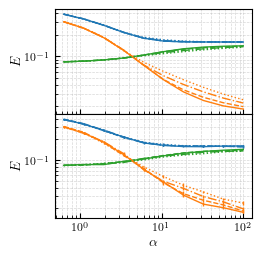

<Figure size 640x480 with 0 Axes>

In [42]:
IMG_DIRECTORY = "./Assets/effective_regularisation"
if not os.path.exists(IMG_DIRECTORY):
    os.makedirs(IMG_DIRECTORY)


def save_plot(fig, name, formats=["pdf","jpg"], date=False):
    current_date = datetime.datetime.now().strftime("%Y-%m-%d")
    for f in formats:        
        path = "{}".format(name) + "_{}".format(current_date) + "." + f
        if not date:
            path = "{}".format(name) + "." + f
        fig.savefig(            
            os.path.join(IMG_DIRECTORY, path),
            format=f,
        )


def set_size(width, fraction=1, subplots=(1, 1)):
    if width == "thesis":
        width_pt = 426.79135
    elif width == "beamer":
        width_pt = 307.28987
    else:
        width_pt = width

    fig_width_pt = width_pt * fraction
    inches_per_pt = 1 / 72.27

    golden_ratio = (5**0.5 - 1) / 2

    fig_width_in = fig_width_pt * inches_per_pt
    fig_height_in = fig_width_in * (golden_ratio) * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


width = 1.75 * 458.63788

multiplier = 1.25
width = multiplier * 234.8775

plt.style.use("latex_ready.mplstyle")

tuple_size = set_size(width, fraction=0.50)
tuple_size = ( 2.5 , 2.4 )

fig, axs = plt.subplots(
    nrows=2,
    ncols=1,
    sharex=True,
    figsize=( tuple_size[0], tuple_size[1]),
    gridspec_kw={"hspace": 0},
)

# print the figure size
print("Figure size: ", tuple_size)
# print the figure size
print("Figure size: ", fig.get_size_inches())

from matplotlib.pyplot import Line2D

# ICML adjustments
fig.subplots_adjust(left=0.2)
fig.subplots_adjust(bottom=0.12)
fig.subplots_adjust(top=0.99)
fig.subplots_adjust(right=0.99)




linestyles = ["solid", "dashed", "dashdot", "dotted"]

for idx, epsilon in enumerate(epsilons):

    


    df_filtered = df.filter(pl.col("epsilon") == epsilon)
    df_filtered = df_filtered.sort(by="alpha")        

    adversarial_error = df_filtered["adversarial_generalization_errors"]
    generalization_error = df_filtered["generalization_error"]
    boundary_error = adversarial_error - generalization_error

    adversarial_error_erm = df_filtered["adversarial_generalization_errors_erm"]
    generalization_error_erm = df_filtered["generalization_error_erm"]
    boundary_error_erm = adversarial_error_erm - generalization_error_erm

    adversarial_error_erm_std = df_filtered["adversarial_generalization_errors_std_erm"]
    generalization_error_erm_std = df_filtered["generalization_error_erm_std"]
    # boundary_error_erm_std = adversarial_error_erm_std - generalization_error_erm_std


    axs[0].plot(alphas, adversarial_error,  color="C0", linestyle=linestyles[idx])
    axs[0].plot(alphas, generalization_error, color="C1", linestyle=linestyles[idx])
    axs[0].plot(alphas, boundary_error,  color="C2", linestyle=linestyles[idx])

    # axs[0].errorbar(
    #     alphas,
    #     adversarial_error_erm,
    #     yerr=adversarial_error_erm_std,
        
    #     markersize=1,
    #     linestyle=linestyles[idx],
    #     color="C0"
    # )
    # axs[0].errorbar(
    #     alphas,
    #     generalization_error_erm,
    #     yerr=generalization_error_erm_std,
    #     markersize=1,
    #     linestyle=linestyles[idx],
    #     color="C1"
    # )
    # axs[0].errorbar(
    #     alphas,
    #     boundary_error_erm,
    #     # yerr=boundary_error_erm_std,
        
    #     markersize=1,
    #     linestyle=linestyles[idx],
    #     color="C2"
    # )

    df_filtered = df2.filter(pl.col("epsilon") == epsilon)
    df_filtered = df_filtered.sort(by="alpha")        

    adversarial_error = df_filtered["adversarial_generalization_errors"]
    generalization_error = df_filtered["generalization_error"]
    boundary_error = adversarial_error - generalization_error

    adversarial_error_erm = df_filtered["adversarial_generalization_errors_erm"]
    generalization_error_erm = df_filtered["generalization_error_erm"]
    boundary_error_erm = adversarial_error_erm - generalization_error_erm

    adversarial_error_erm_std = df_filtered["adversarial_generalization_errors_std_erm"]
    generalization_error_erm_std = df_filtered["generalization_error_erm_std"]
    # boundary_error_erm_std = adversarial_error_erm_std - generalization_error_erm_std


    # axs[1].plot(alphas, adversarial_error,  color="C0", linestyle=linestyles[idx])
    # axs[1].plot(alphas, generalization_error, color="C1", linestyle=linestyles[idx])
    # axs[1].plot(alphas, boundary_error,  color="C2", linestyle=linestyles[idx])

    axs[1].errorbar(
        alphas,
        adversarial_error_erm,
        yerr=adversarial_error_erm_std,
        
        markersize=1,
        linestyle=linestyles[idx],
        color="C0"
    )
    axs[1].errorbar(
        alphas,
        generalization_error_erm,
        yerr=generalization_error_erm_std,
        markersize=1,
        linestyle=linestyles[idx],
        color="C1"
    )
    axs[1].errorbar(
        alphas,
        boundary_error_erm,
        # yerr=boundary_error_erm_std,
        
        markersize=1,
        linestyle=linestyles[idx],
        color="C2"
    )


axs[0].set_xscale("log")
axs[0].set_yscale("log")
axs[0].set_ylabel(r"$E$", labelpad=2.0)
# axs[0].set_xlabel(r"$\alpha$", labelpad=2.0)
axs[0].grid(which="both", axis="both", alpha=0.5)
axs[0].tick_params(axis='both', which='major', direction='in')
axs[0].tick_params(axis='both', which='minor', direction='in')
# axs[0].legend(title="State Evolution", loc="lower left")

axs[1].set_xscale("log")
axs[1].set_yscale("log")
axs[1].set_ylabel(r"$E$", labelpad=2.0)
axs[1].set_xlabel(r"$\alpha$", labelpad=2.0)
axs[1].grid(which="both", axis="both", alpha=0.5)
axs[1].tick_params(axis='both', which='major', direction='in')
axs[1].tick_params(axis='both', which='minor', direction='in')
# axs[1].legend(title="$\\boldsymbol{b}$", loc="lower left")



error_legend = []

error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{adv}}$",color="C0"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{gen}}$",color="C1"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{bound}}$",color="C2"))
error_legend.append(Line2D([],[], color="white"))

epsilon_legend = []

for idx, epsilon in enumerate(epsilons):
    epsilon_legend.append(Line2D([0],[0],color="black", linestyle=linestyles[idx], label=r"$\varepsilon_t={}$".format(epsilons[idx]))) 

custom_legend = []

for idx in range(len(error_legend)):
    custom_legend.append(error_legend[idx])
    custom_legend.append(epsilon_legend[idx])

# fig.legend(handles=custom_legend, loc="upper center", ncol=4, handlelength=1.5)

save = True
if save:
    save_plot(
        fig,
        "effective_regularisation",
    )

plt.show()

plt.tight_layout()

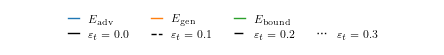

In [39]:
# save the legend separately, put the custom legend into a figure
figlegend = plt.figure(figsize=( 4.25, 0.15*tuple_size[1]))
plt.style.use("latex_ready.mplstyle")
legend_ax = figlegend.add_axes([0, 0, 1, 1])
legend_ax.axis('off')  # Turn off the axes for the legend figure

figlegend.legend(
    handles=custom_legend,
    handlelength=1,
    loc="center",
    ncol=4,
)

figlegend.savefig(
    os.path.join(IMG_DIRECTORY, "legend.pdf"),
    format="pdf",
    # bbox_inches="tight",
)


plt.show()

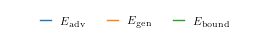

In [40]:
custom_legend = []

custom_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{adv}}$",color="C0"))
custom_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{gen}}$",color="C1"))
custom_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{bound}}$",color="C2"))
# custom_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{CP}}$",color="C0", marker='o'))





# save the legend separately, put the custom legend into a figure
figlegend = plt.figure(figsize=( tuple_size[0], 0.1 * tuple_size[0]))
plt.style.use("latex_ready.mplstyle")
legend_ax = figlegend.add_axes([0, 0, 1, 1])
legend_ax.axis('off')  # Turn off the axes for the legend figure

figlegend.legend(
    handles=custom_legend,
    handlelength=1,
    loc="center",
    ncol=5,
)

figlegend.savefig(
    os.path.join(IMG_DIRECTORY, "effective_regularisation_legend_error.pdf"),
    format="pdf",
    # bbox_inches="tight",
)


plt.show()